In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading dataset
import pandas as pd

file_path = '/content/drive/My Drive/ML project/Project_Phase1.csv'
data = pd.read_csv(file_path)

In [ ]:
data.columns

Index(['syn_error_rate', 'connection_time',
       'destination_same_source_port_rate',
       'destination_different_server_rate', 'connection_status',
       'connection_count', 'destination_server_different_host_rate',
       'suspicious_activity', 'protocol', 'server_different_host_rate',
       'destination_server_syn_error_rate', 'destination_host_server_count',
       'destination_same_server_rate', 'fragment_errors', 'compromised_count',
       'source_bytes', 'service_type', 'destination_syn_error_rate',
       'same_server_rate', 'reset_error_rate', 'server_request_count',
       'destination_server_reset_error_rate', 'server_reset_error_rate',
       'server_syn_error_rate', 'destination_bytes', 'guest_login',
       'authentication_status', 'destination_host_count',
       'destination_reset_error_rate', 'different_server_rate', 'class'],
      dtype='object')

In [ ]:
#handle missing values
data.isnull().sum()

syn_error_rate                            0
connection_time                           0
destination_same_source_port_rate         0
destination_different_server_rate         0
connection_status                         0
connection_count                          0
destination_server_different_host_rate    0
suspicious_activity                       0
protocol                                  0
server_different_host_rate                0
destination_server_syn_error_rate         0
destination_host_server_count             0
destination_same_server_rate              0
fragment_errors                           0
compromised_count                         0
source_bytes                              0
service_type                              0
destination_syn_error_rate                0
same_server_rate                          0
reset_error_rate                          0
server_request_count                      0
destination_server_reset_error_rate       0
server_reset_error_rate                   0
server_syn_error_rate                     0
destination_bytes                         0
guest_login                               0
authentication_status                     0
destination_host_count                    0
destination_reset_error_rate              0
different_server_rate                     0
class                                     0
dtype: int64

In [ ]:
num_cols = data.select_dtypes(include=['number']).columns
len_of_num_cols = len(num_cols)
print("Number of numerical columns:", len_of_num_cols)

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
len_of_categorical_cols = len(categorical_cols)
print("Number of categorical columns:", len_of_categorical_cols)

Number of numerical columns: 27
Number of categorical columns: 4


In [ ]:
data[categorical_cols].apply(lambda col: col.head(30))

connection_status protocol service_type    class
0                 SF      tcp         http  anomaly
1                 S0      tcp         link  anomaly
2                 S0      tcp          bgp  anomaly
3                 S0      tcp          ctf  anomaly
4                 S0      tcp     iso_tsap  anomaly
5                 SF     icmp        ecr_i  anomaly
6                 S0      tcp         http  anomaly
7                 S0      tcp      private  anomaly
8                 SF     icmp        eco_i  anomaly
9                REJ      tcp         ldap  anomaly
10                S0      tcp        imap4  anomaly
11               REJ      tcp        other  anomaly
12                SF      tcp          ftp  anomaly
13                SF     icmp        eco_i  anomaly
14                S0      tcp      private  anomaly
15              RSTO      tcp          ftp  anomaly
16                S0      tcp      private  anomaly
17                S0      tcp      printer  anomaly
18                SF     icmp        ecr_i  anomaly
19                S0      tcp      private  anomaly
20               REJ      tcp     http_443  anomaly
21                SF      udp      private  anomaly
22                SF     icmp        ecr_i  anomaly
23                S0      tcp       kshell  anomaly
24                S0      tcp         echo  anomaly
25                S0      tcp      courier  anomaly
26                S0      tcp          mtp  anomaly
27                SF     icmp        ecr_i  anomaly
28                S0      tcp       klogin  anomaly
29                S0      tcp      private  anomaly

In [ ]:
allowed_protocols = {'tcp', 'icmp', 'udp'}

def validate_protocol(value):
    if isinstance(value, list):
        return len(value) == 1 and value[0] in allowed_protocols
    else:
        return value in allowed_protocols

valid_rows = data['protocol'].apply(validate_protocol)

if valid_rows.all():
    print("All rows in 'protocol' contain exactly one valid protocol type.")
else:
    print("Some rows in 'protocol' do not contain exactly one valid protocol type.")
    print(data[~valid_rows])

All rows in 'protocol' contain exactly one valid protocol type.


In [ ]:
data.dtypes

syn_error_rate                            float64
connection_time                             int64
destination_same_source_port_rate         float64
destination_different_server_rate         float64
connection_status                          object
connection_count                            int64
destination_server_different_host_rate    float64
suspicious_activity                         int64
protocol                                   object
server_different_host_rate                float64
destination_server_syn_error_rate         float64
destination_host_server_count               int64
destination_same_server_rate              float64
fragment_errors                             int64
compromised_count                           int64
source_bytes                                int64
service_type                               object
destination_syn_error_rate                float64
same_server_rate                          float64
reset_error_rate                          float64
server_request_count                        int64
destination_server_reset_error_rate       float64
server_reset_error_rate                   float64
server_syn_error_rate                     float64
destination_bytes                           int64
guest_login                                 int64
authentication_status                       int64
destination_host_count                      int64
destination_reset_error_rate              float64
different_server_rate                     float64
class                                      object
dtype: object

In [ ]:
data.columns

Index(['syn_error_rate', 'connection_time',
       'destination_same_source_port_rate',
       'destination_different_server_rate', 'connection_status',
       'connection_count', 'destination_server_different_host_rate',
       'suspicious_activity', 'protocol', 'server_different_host_rate',
       'destination_server_syn_error_rate', 'destination_host_server_count',
       'destination_same_server_rate', 'fragment_errors', 'compromised_count',
       'source_bytes', 'service_type', 'destination_syn_error_rate',
       'same_server_rate', 'reset_error_rate', 'server_request_count',
       'destination_server_reset_error_rate', 'server_reset_error_rate',
       'server_syn_error_rate', 'destination_bytes', 'guest_login',
       'authentication_status', 'destination_host_count',
       'destination_reset_error_rate', 'different_server_rate', 'class'],
      dtype='object')

In [ ]:
# use iqr for outlier handling

#detect outlier columns

def detect_outliers(df, num_cols):
    outlier_cols = []
    print("Outlier Detection Summary:\n" + "-"*60)

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"{col}:")
        print(f"   Q1           = {Q1}")
        print(f"   Q3           = {Q3}")
        print(f"   IQR          = {IQR}")
        print(f"   Lower Bound  = {lower_bound}")
        print(f"   Upper Bound  = {upper_bound}\n")

        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_cols.append(col)

    print("-"*60)
    print(f"Number of Columns containing outliers: {len(outlier_cols)}")
    print("Columns containing outliers:", outlier_cols)

    return outlier_cols

outlier_columns = detect_outliers(data, num_cols)
copy_of_outlier_columns = outlier_columns.copy()

Outlier Detection Summary:
------------------------------------------------------------
syn_error_rate:
   Q1           = 0.0
   Q3           = 0.0
   IQR          = 0.0
   Lower Bound  = 0.0
   Upper Bound  = 0.0

connection_time:
   Q1           = 0.0
   Q3           = 0.0
   IQR          = 0.0
   Lower Bound  = 0.0
   Upper Bound  = 0.0

destination_same_source_port_rate:
   Q1           = 0.0
   Q3           = 0.08
   IQR          = 0.08
   Lower Bound  = -0.12
   Upper Bound  = 0.2

destination_different_server_rate:
   Q1           = 0.0
   Q3           = 0.02
   IQR          = 0.02
   Lower Bound  = -0.03
   Upper Bound  = 0.05

connection_count:
   Q1           = 1.0
   Q3           = 15.0
   IQR          = 14.0
   Lower Bound  = -20.0
   Upper Bound  = 36.0

destination_server_different_host_rate:
   Q1           = 0.0
   Q3           = 0.03
   IQR          = 0.03
   Lower Bound  = -0.045
   Upper Bound  = 0.075

suspicious_activity:
   Q1           = 0.0
   Q3           = 0.0

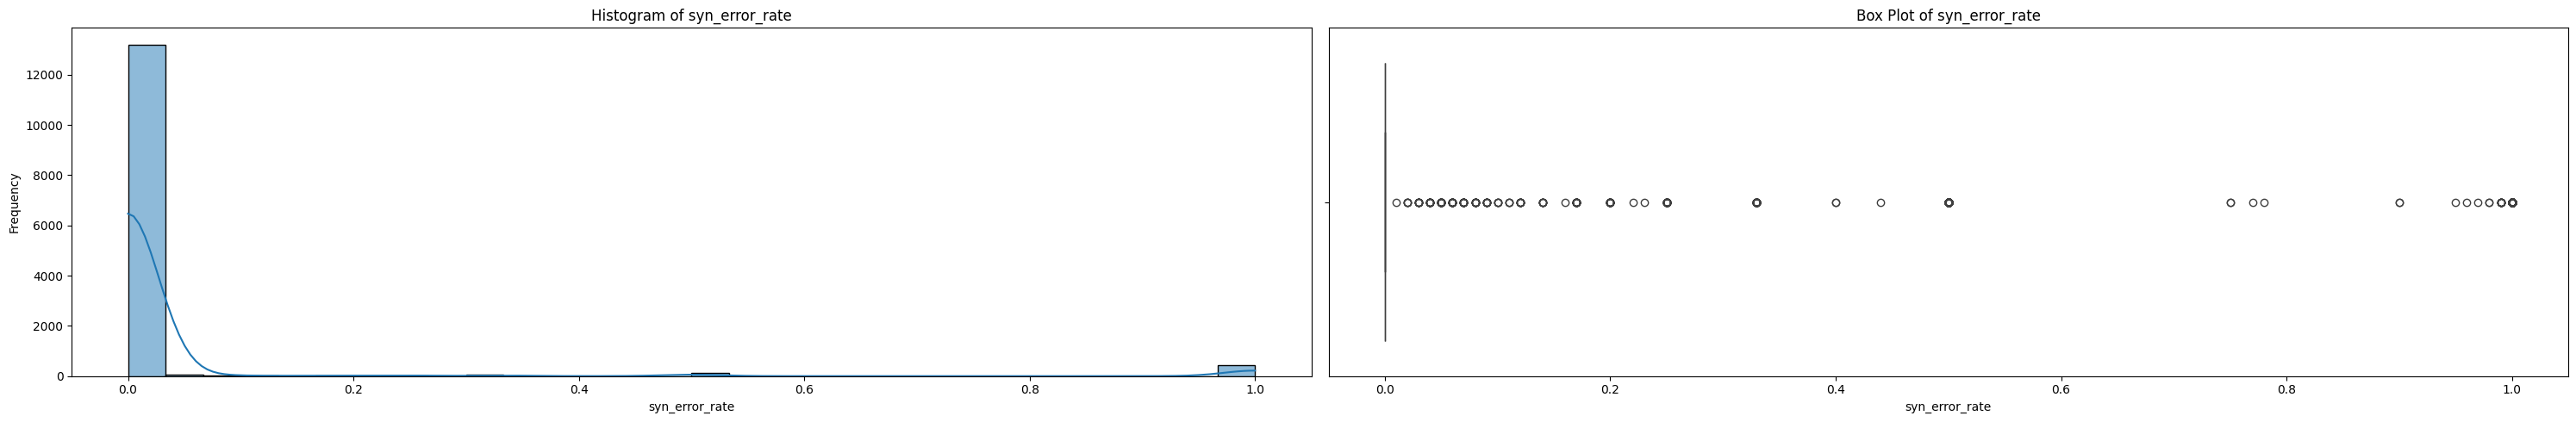

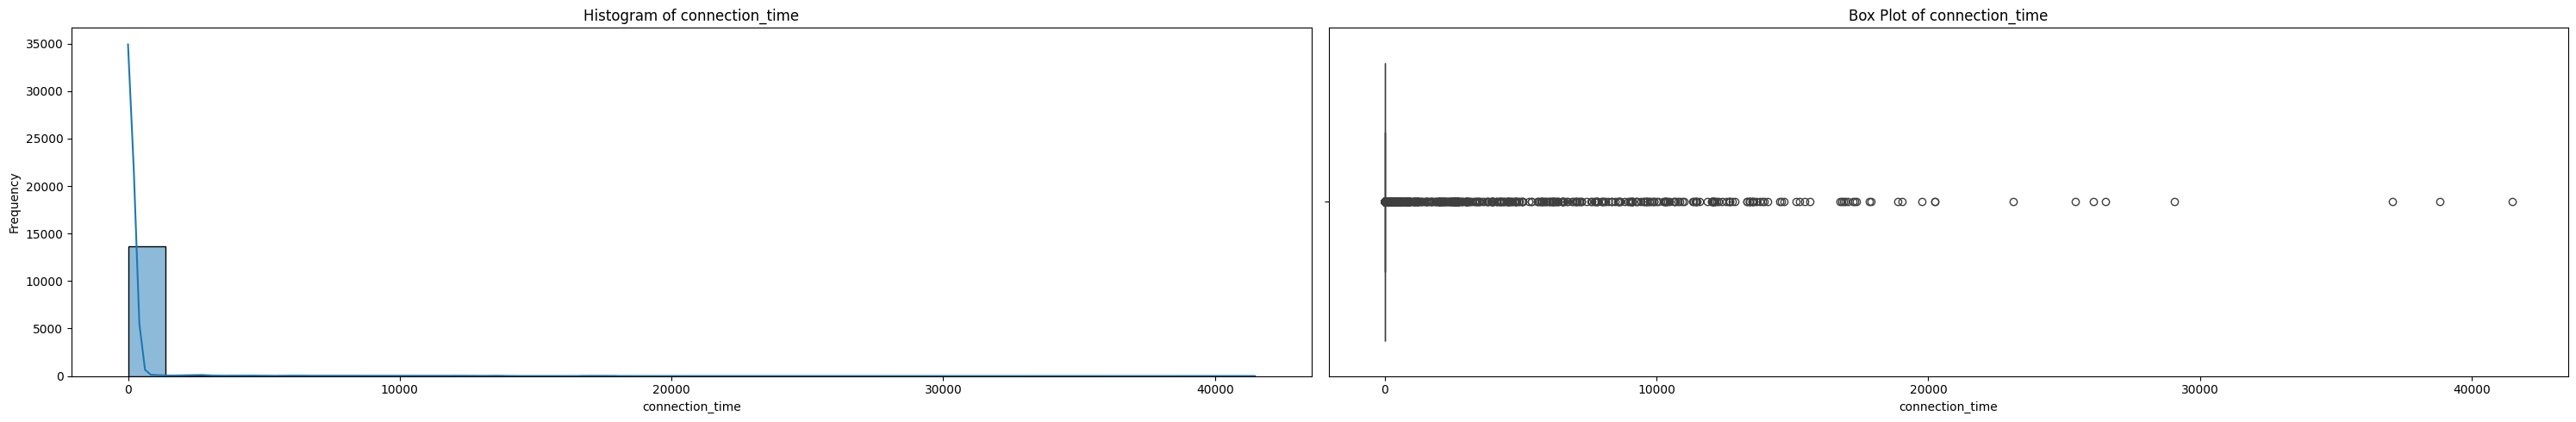

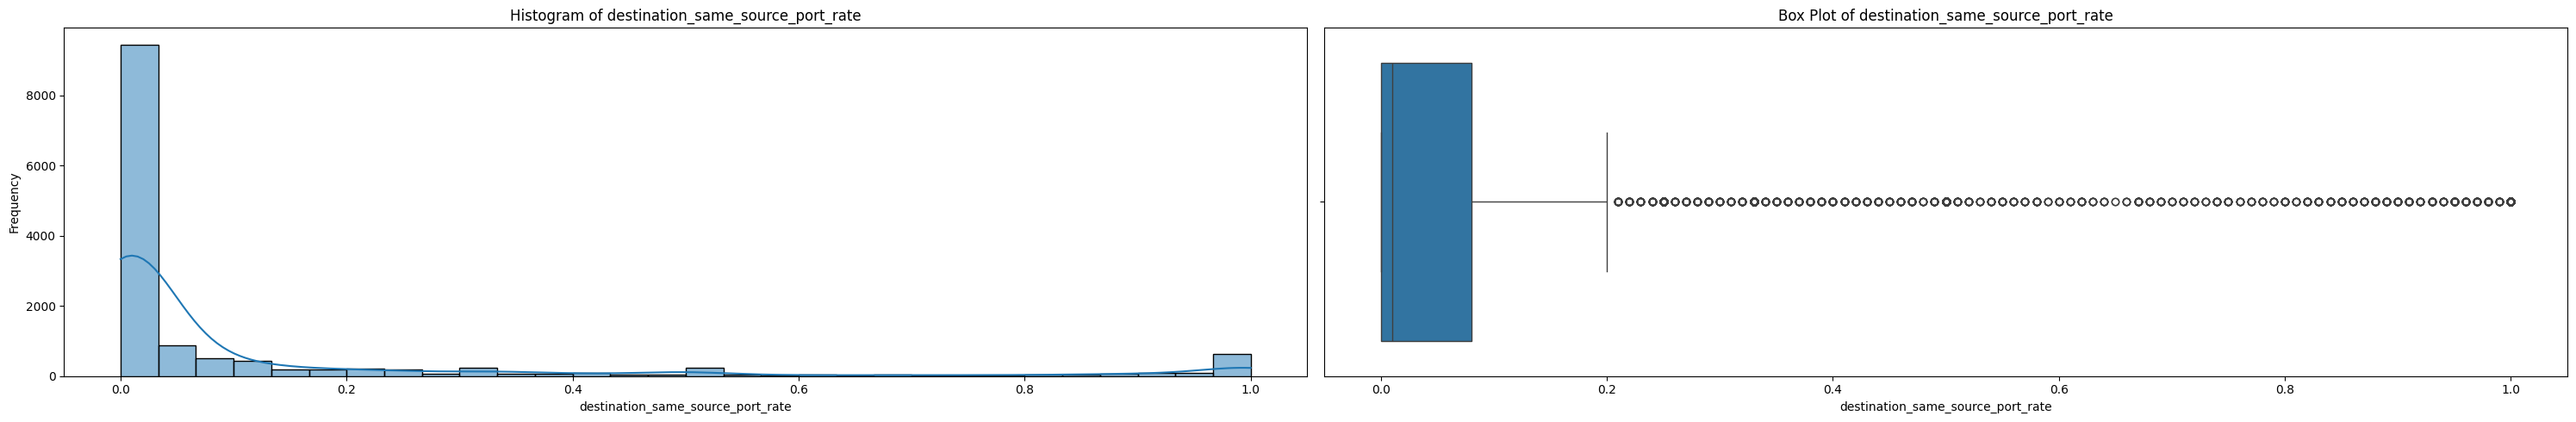

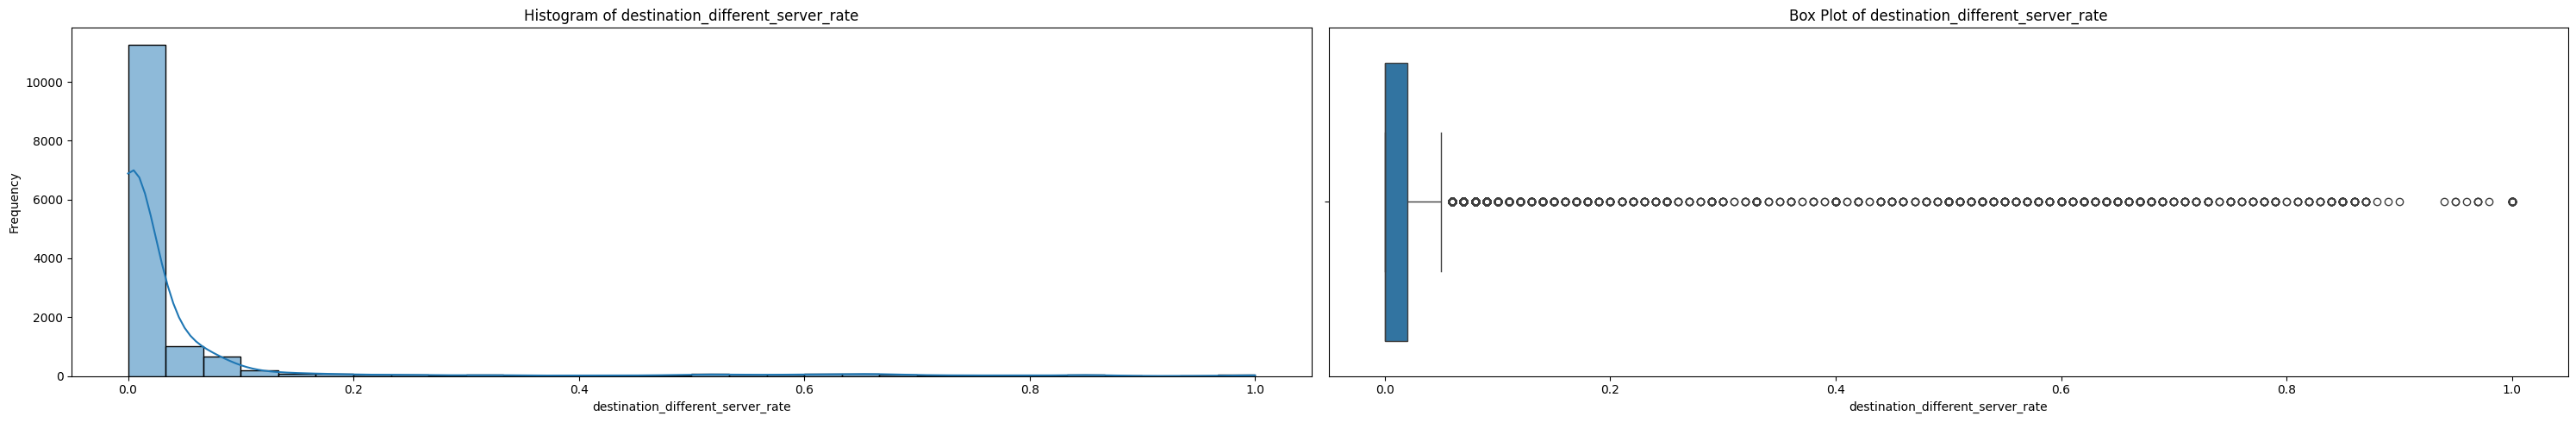

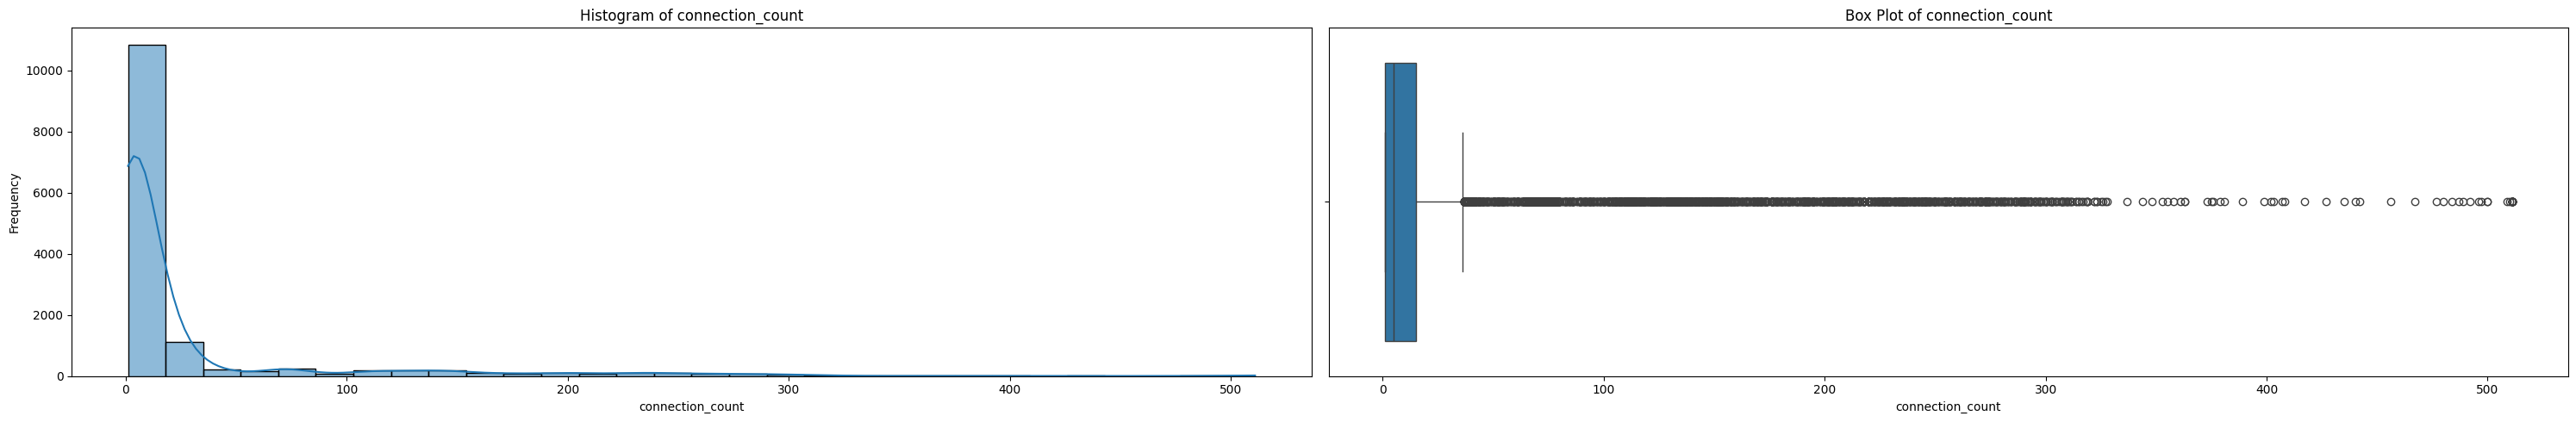

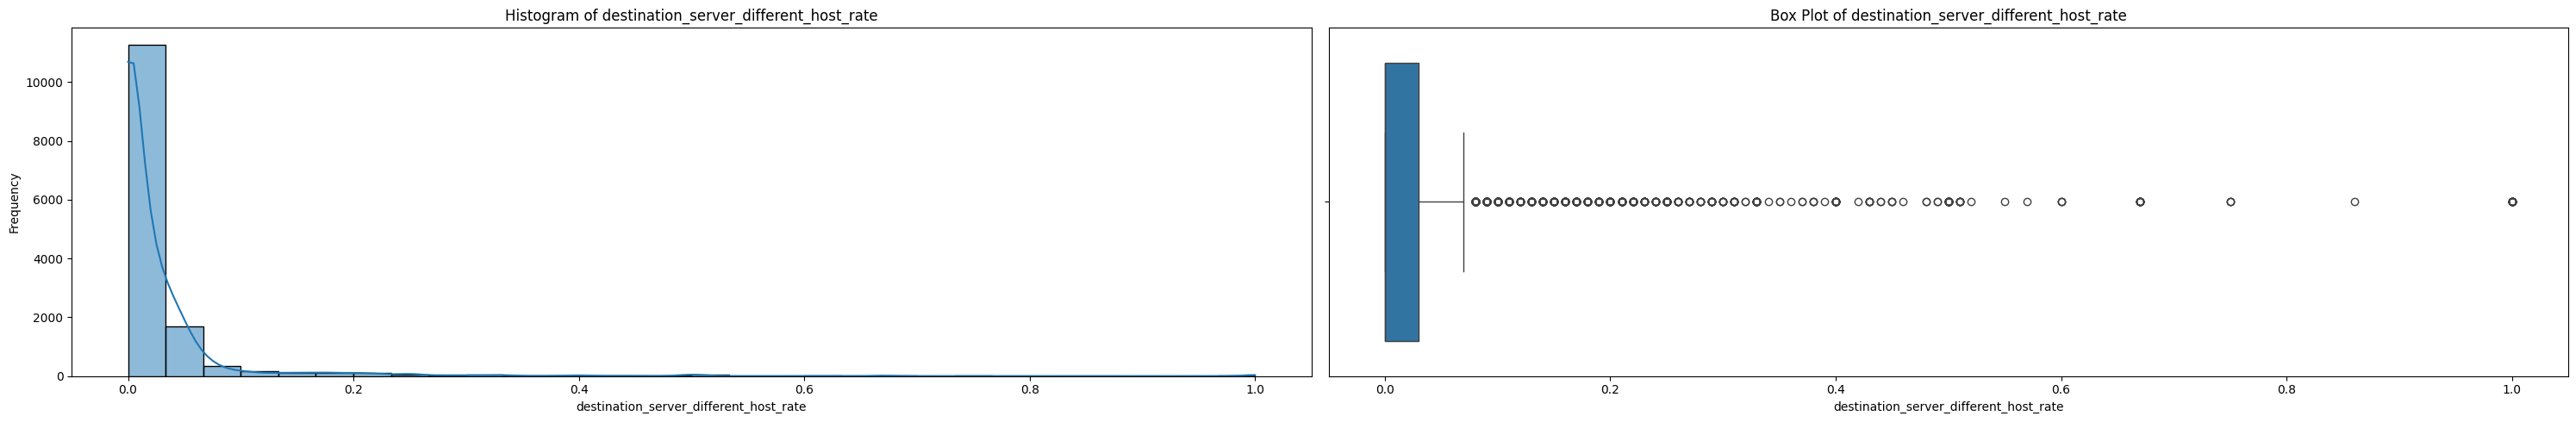

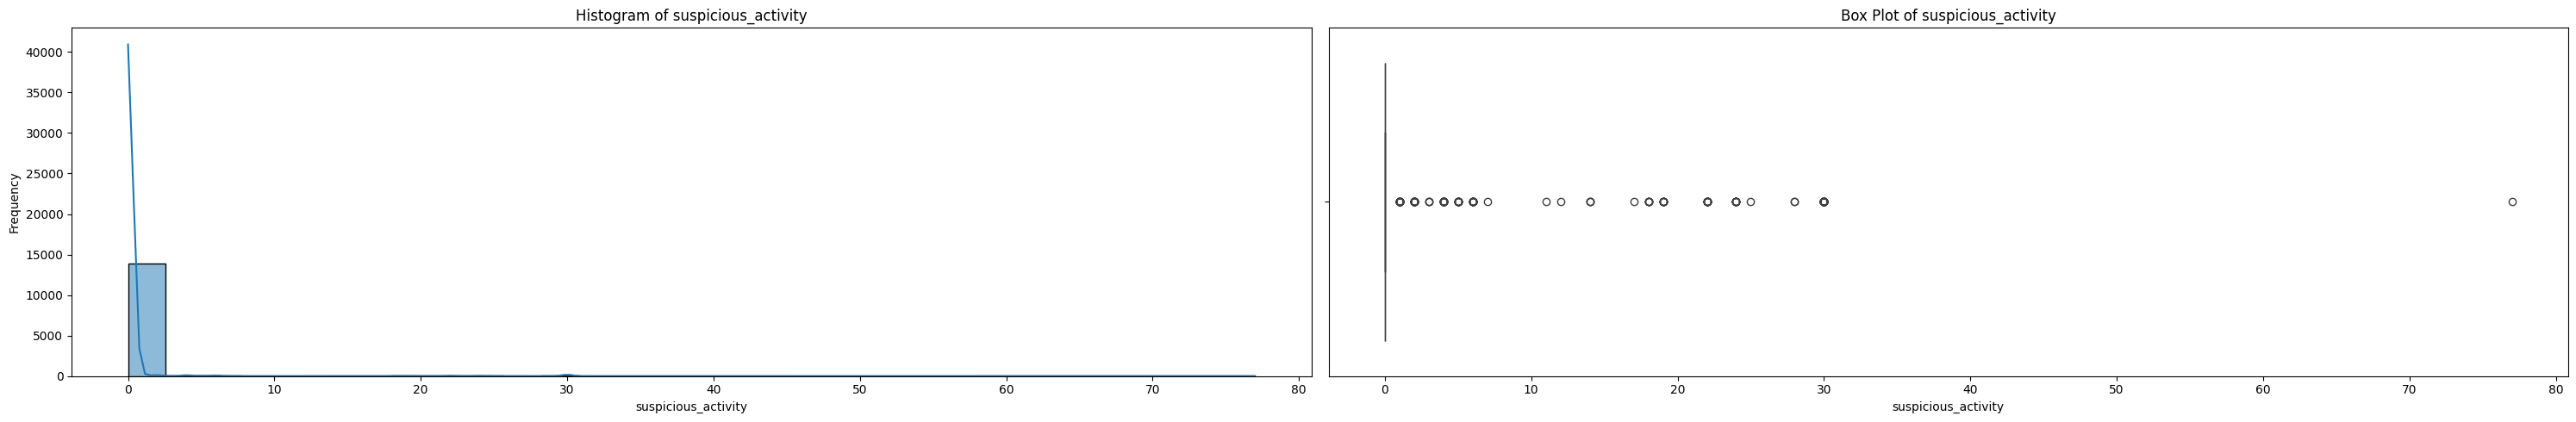

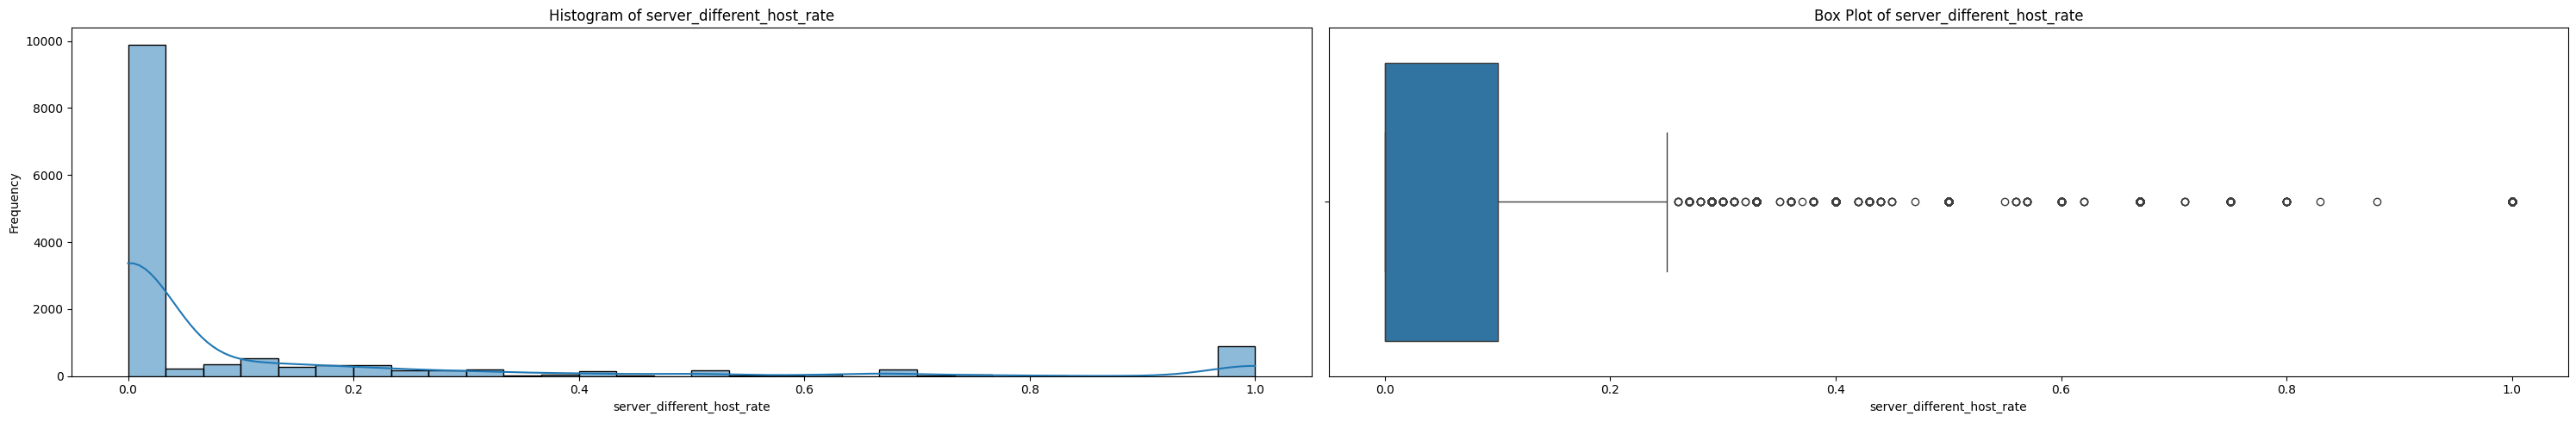

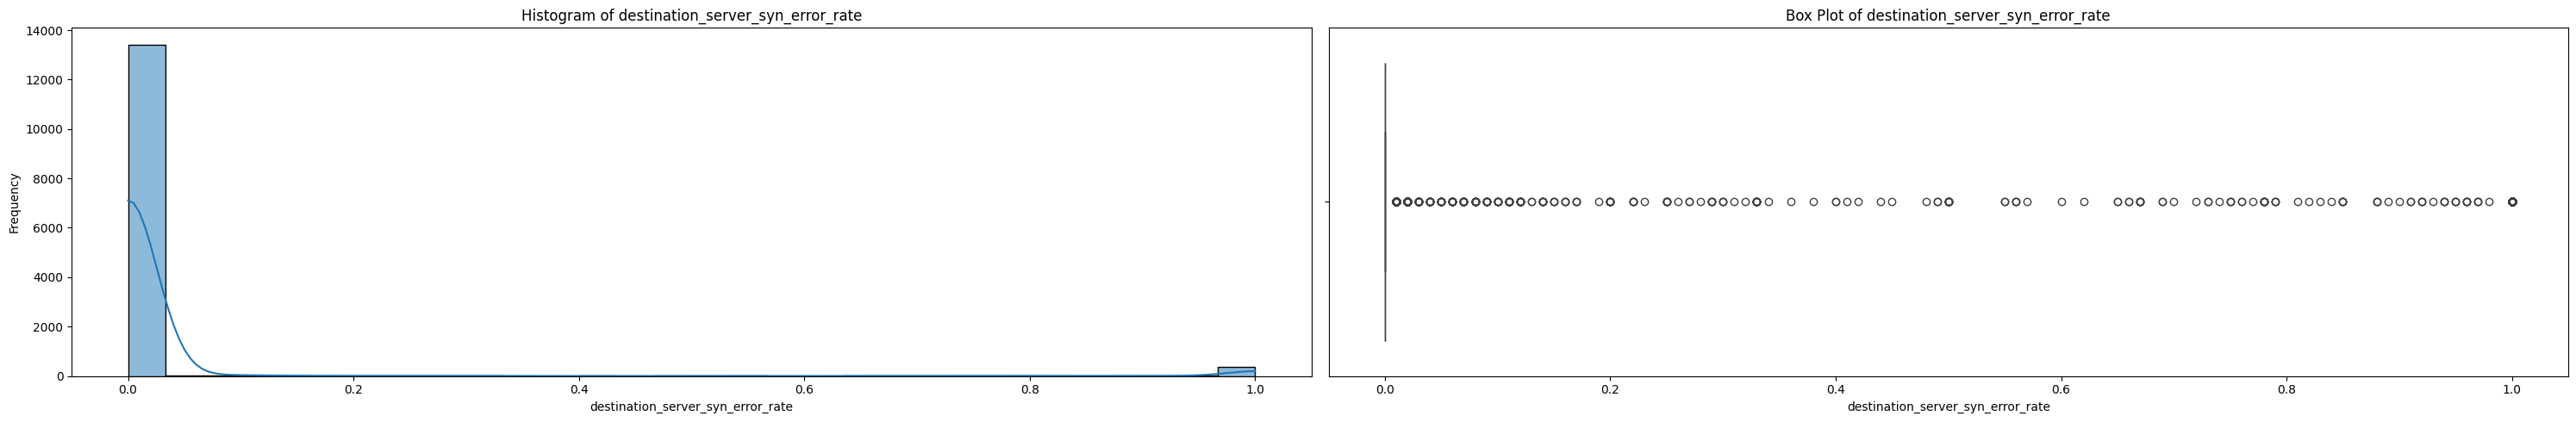

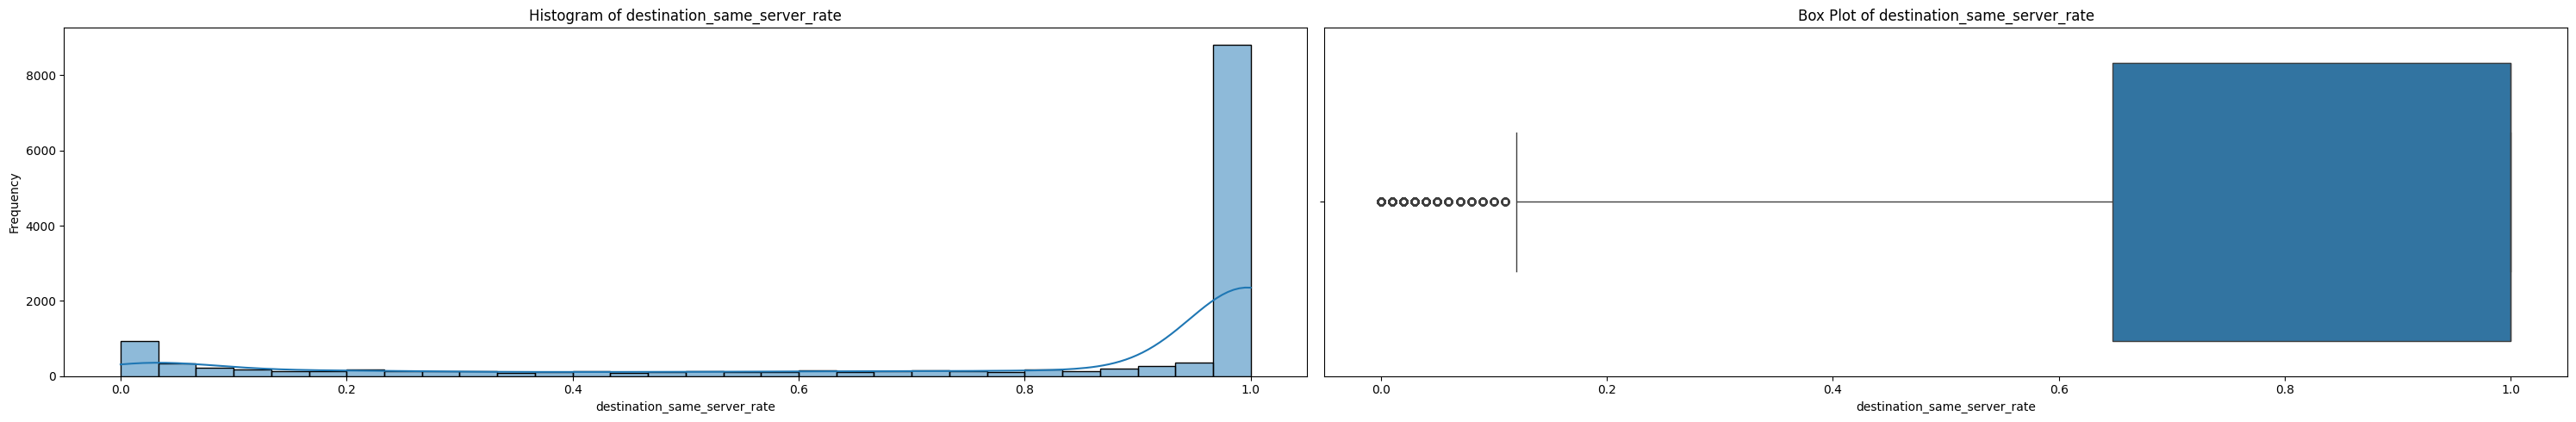

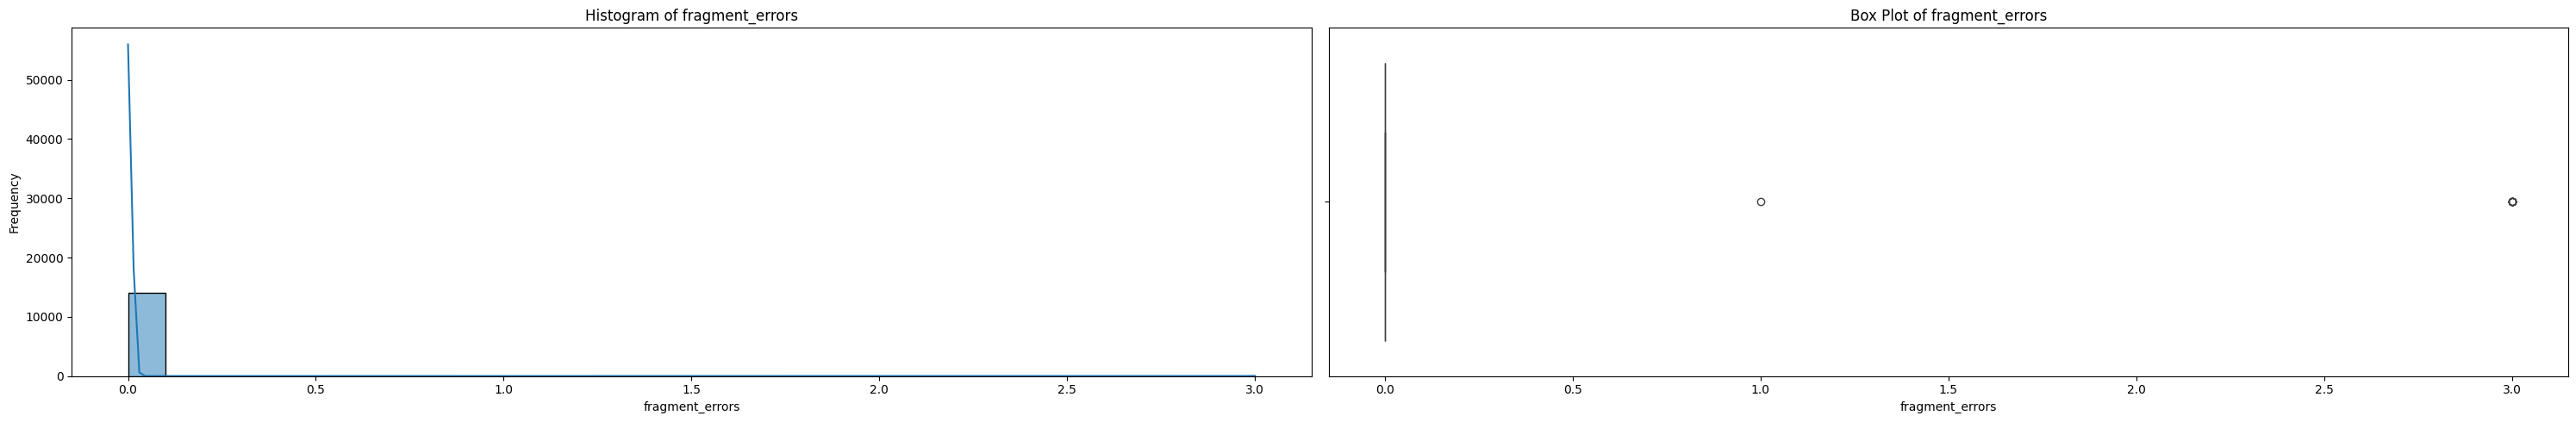

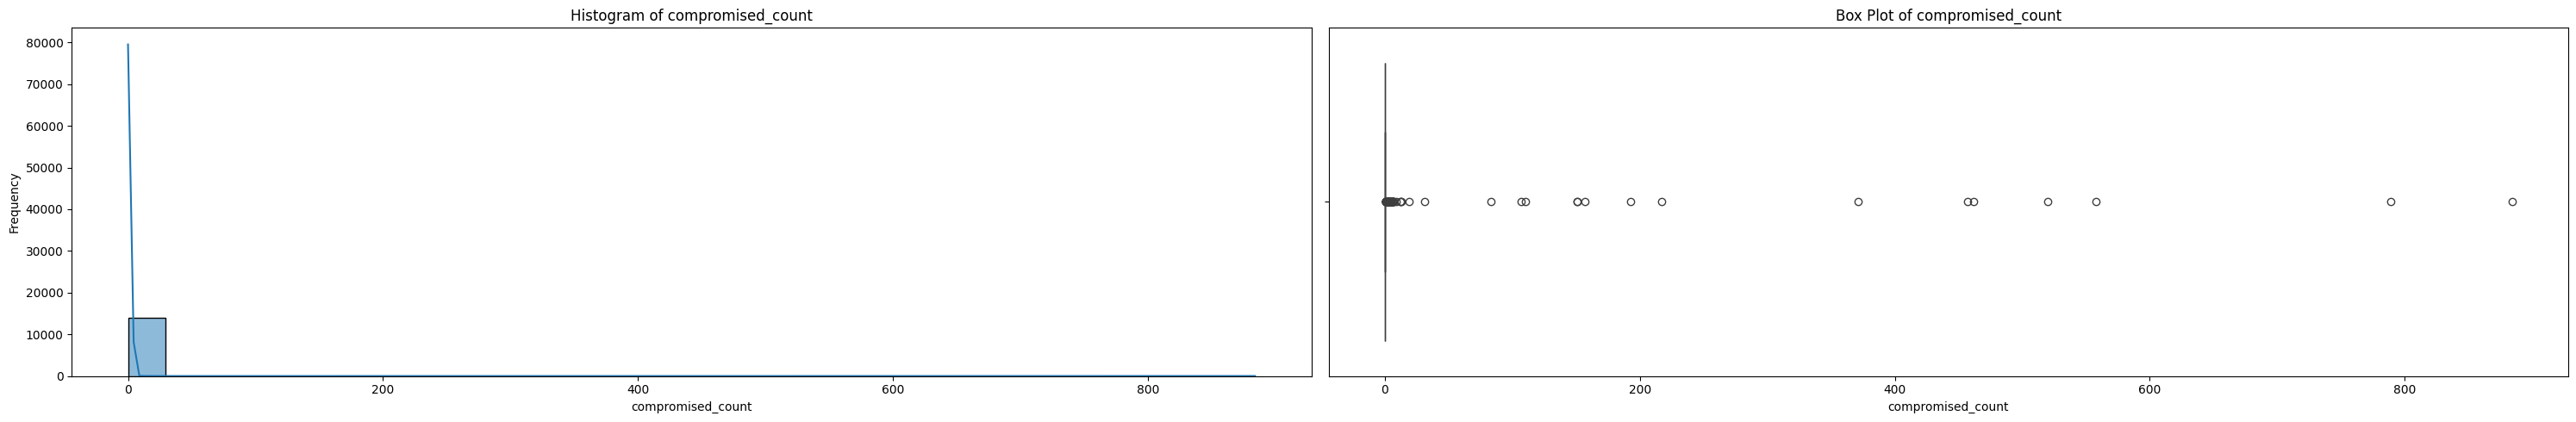

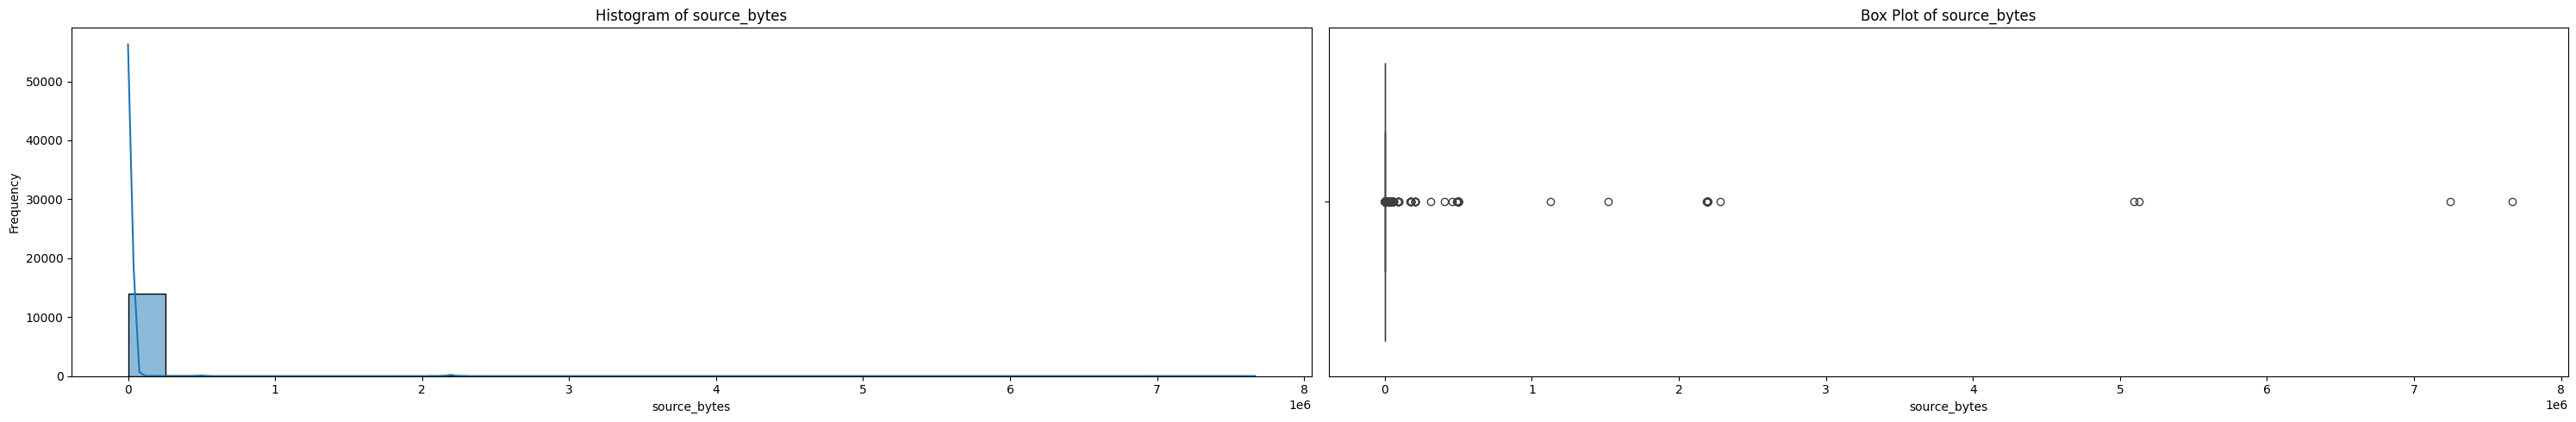

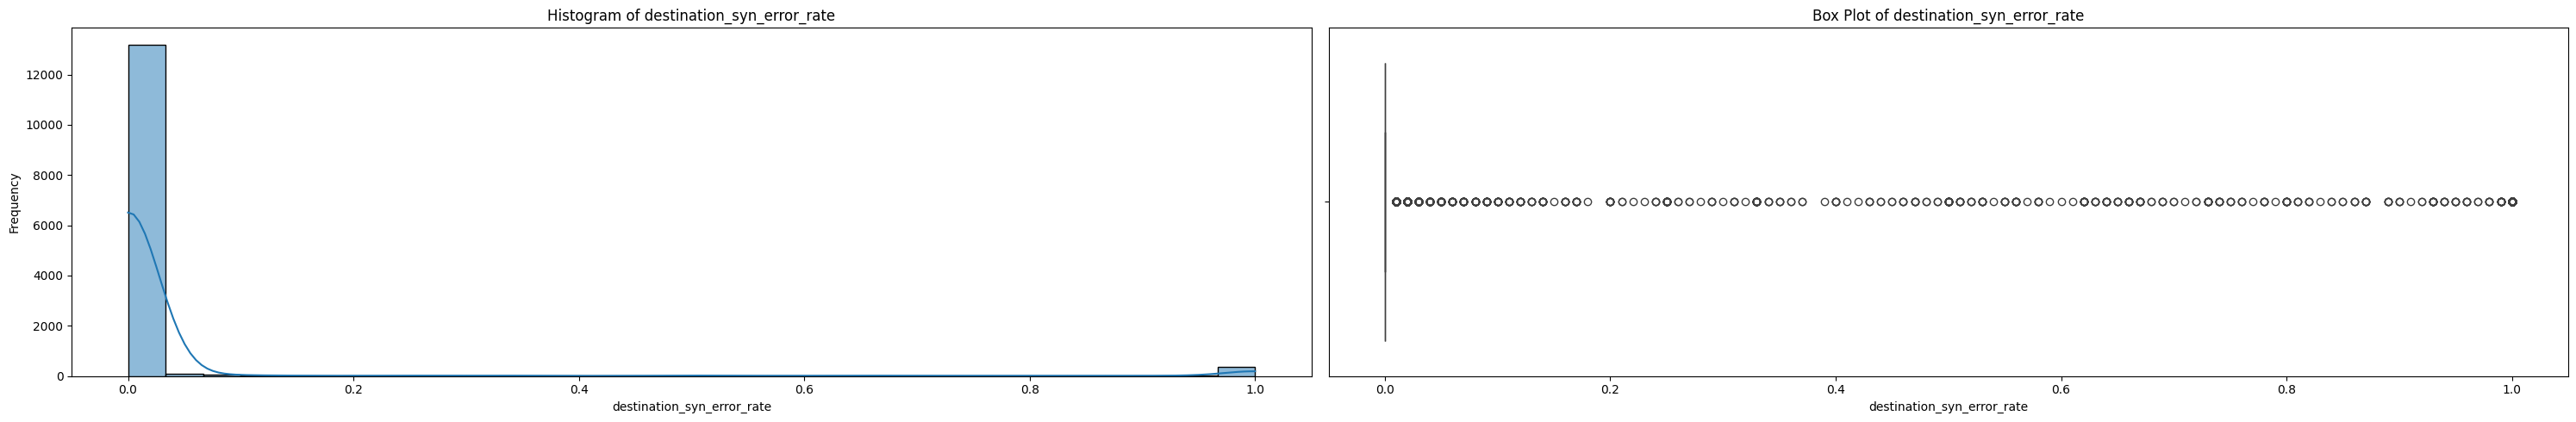

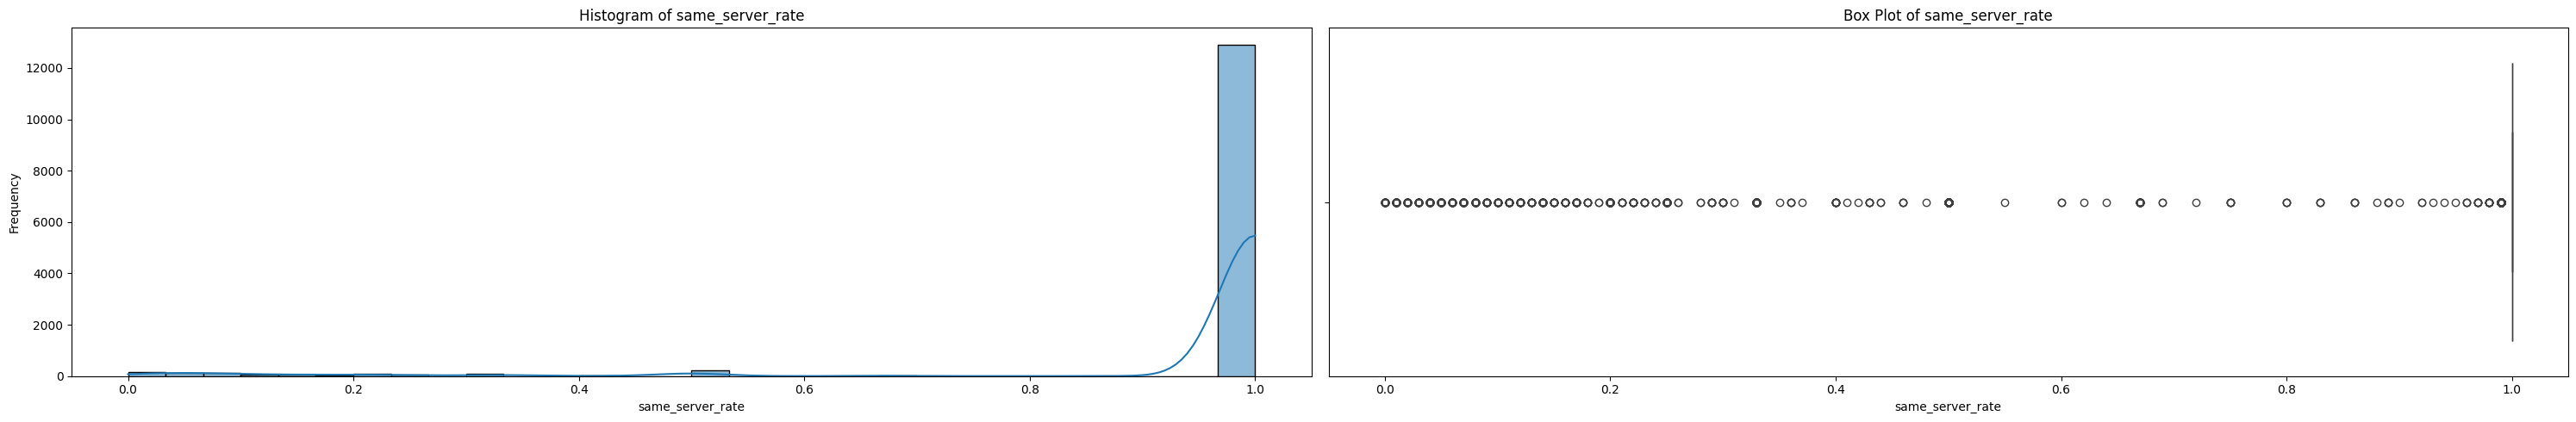

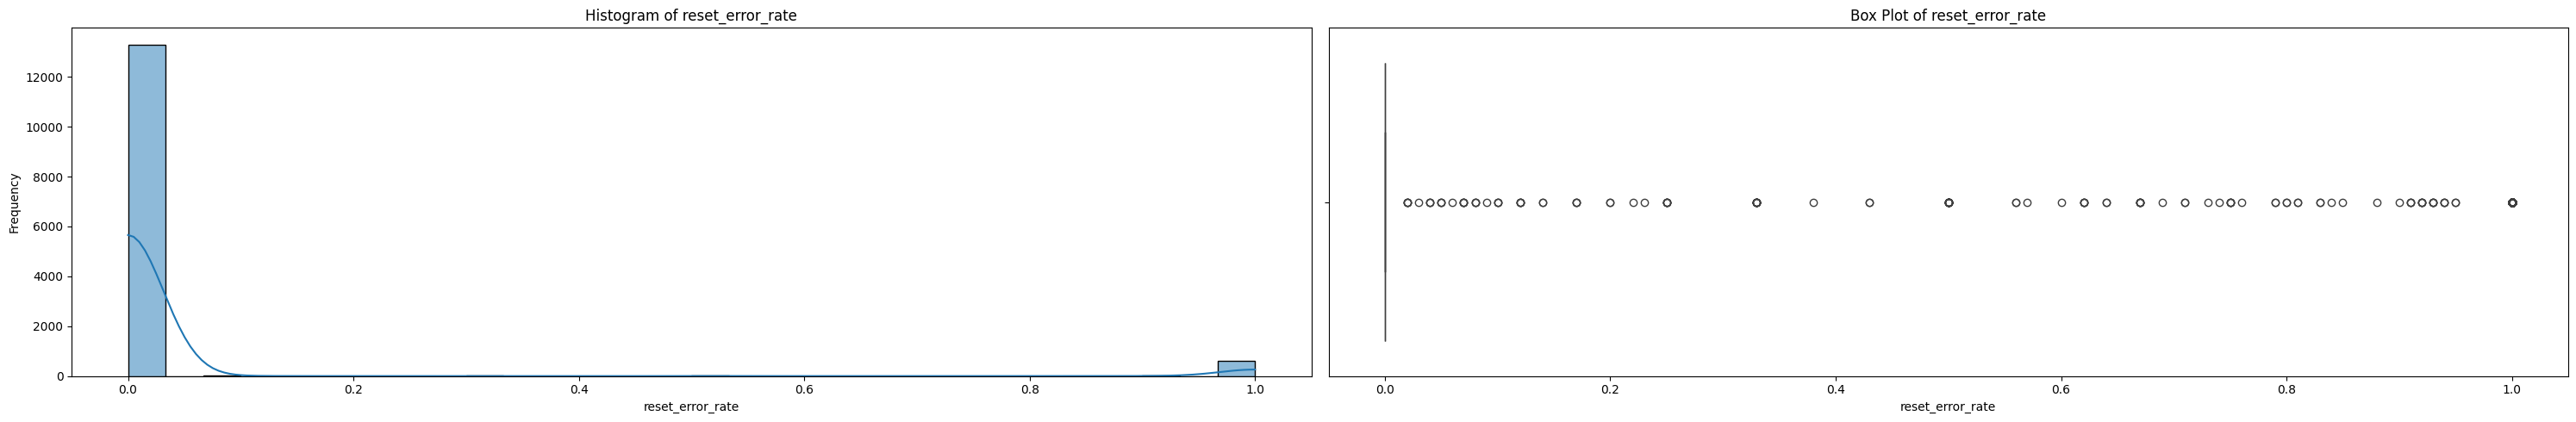

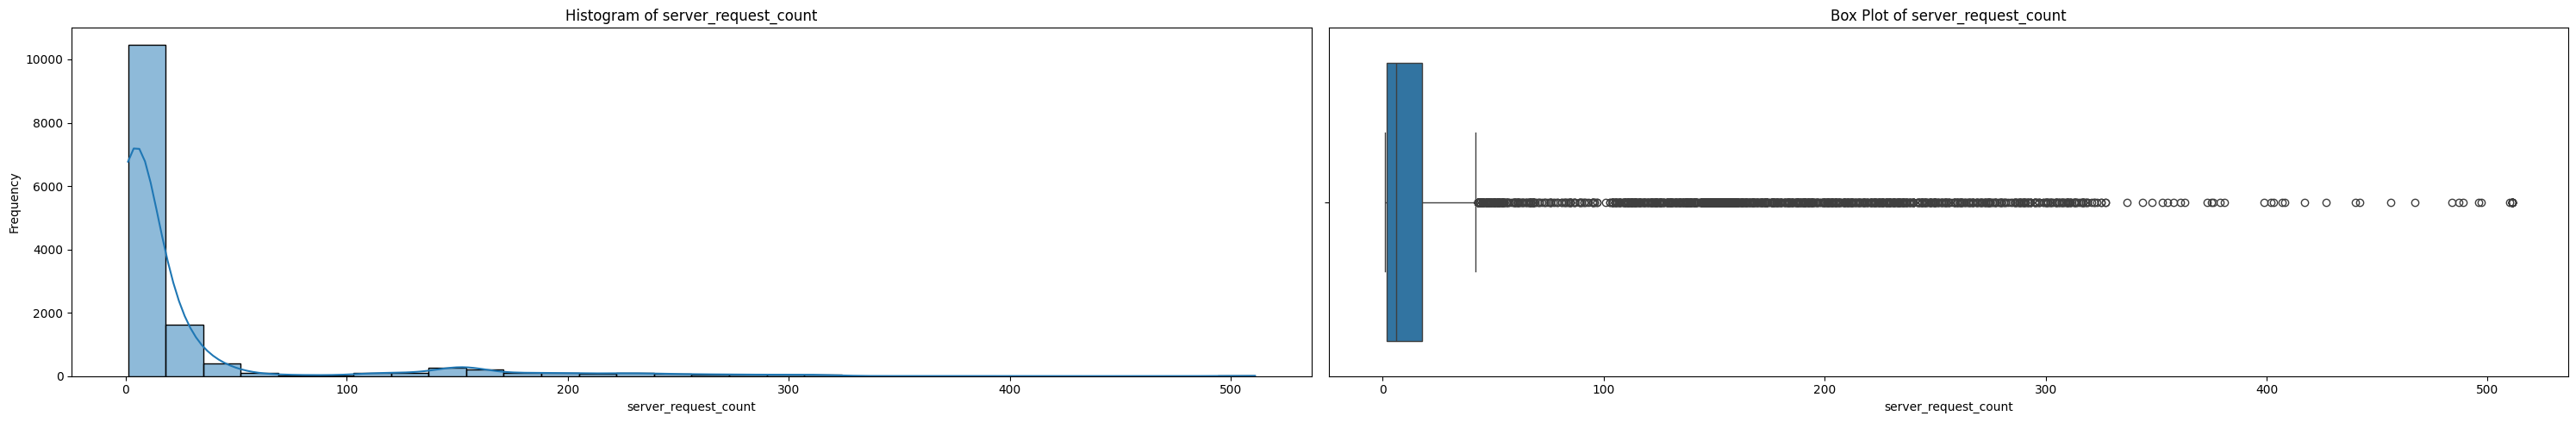

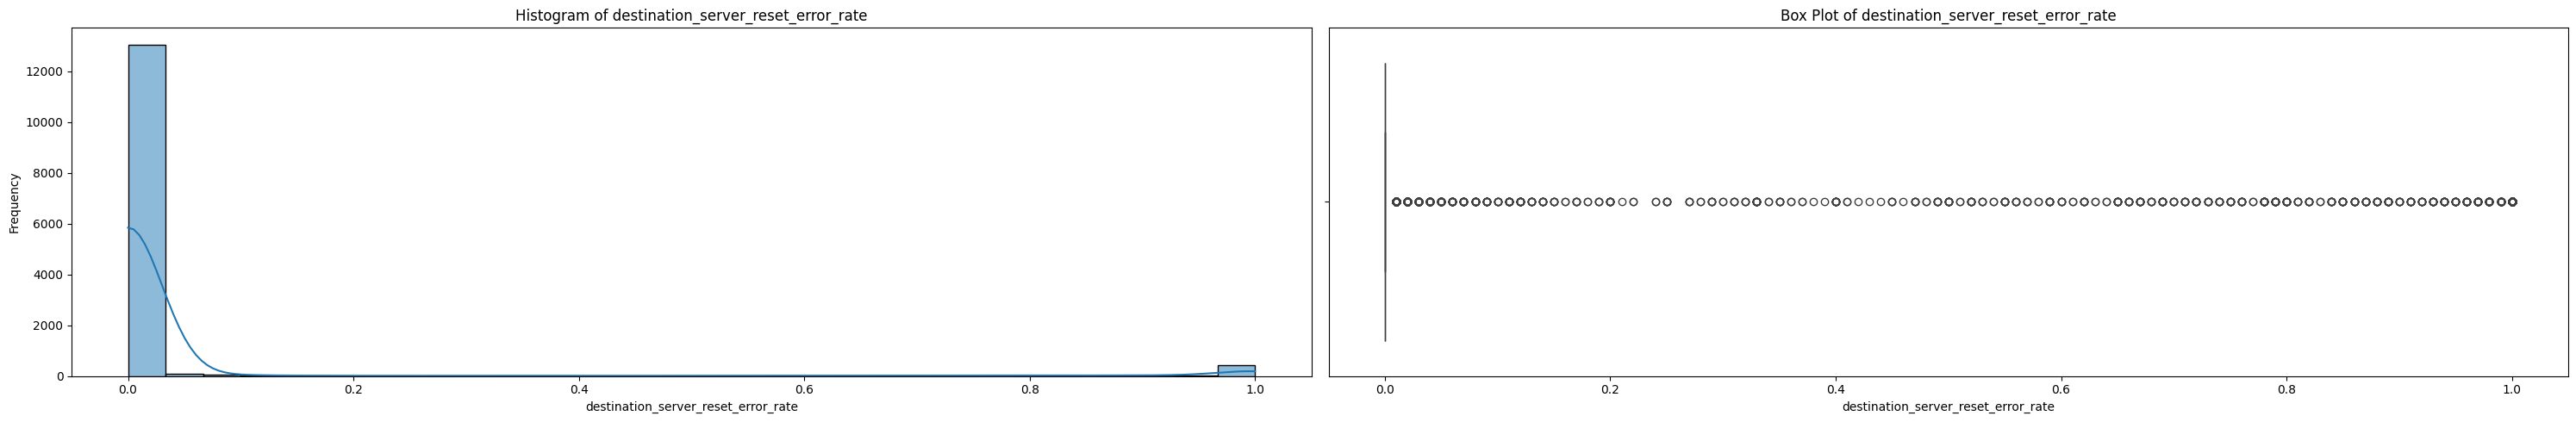

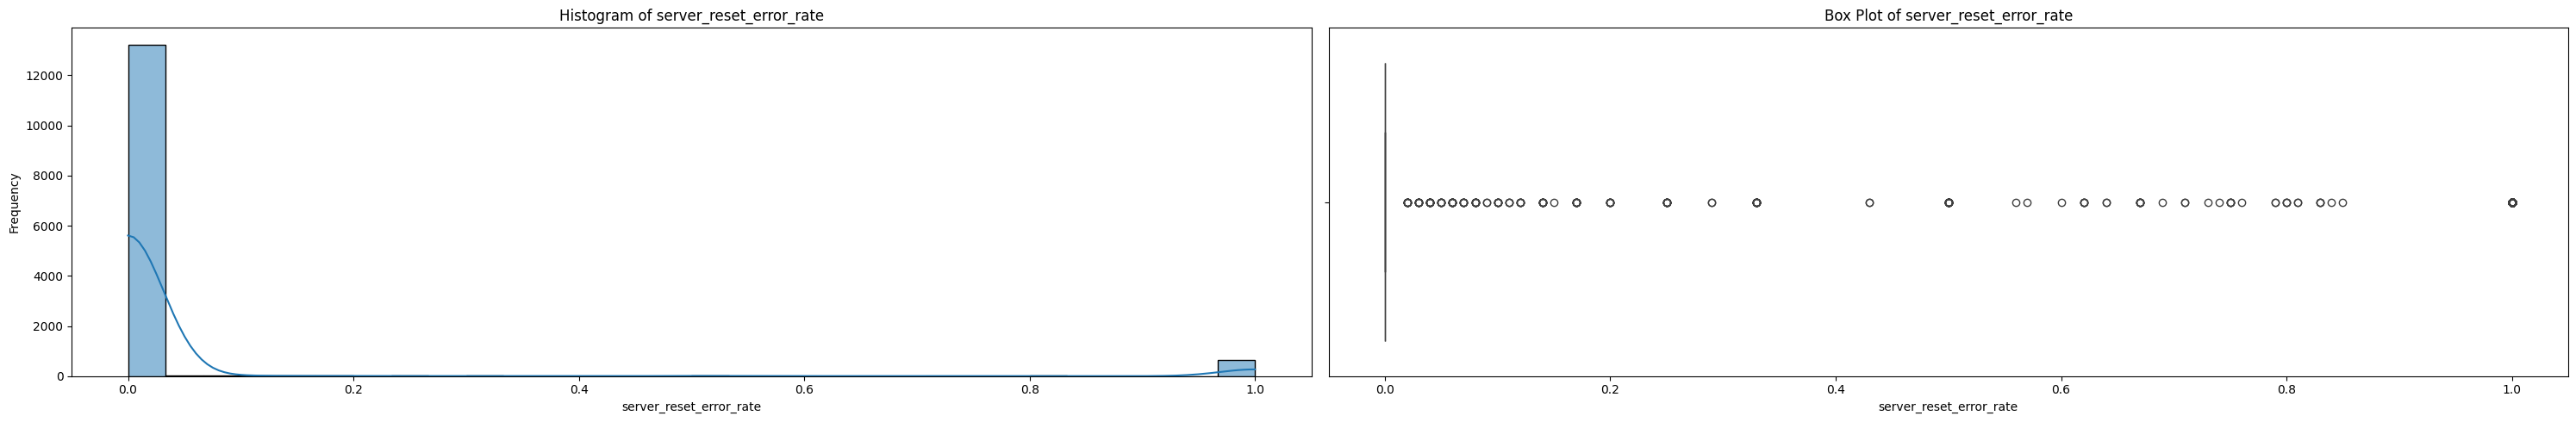

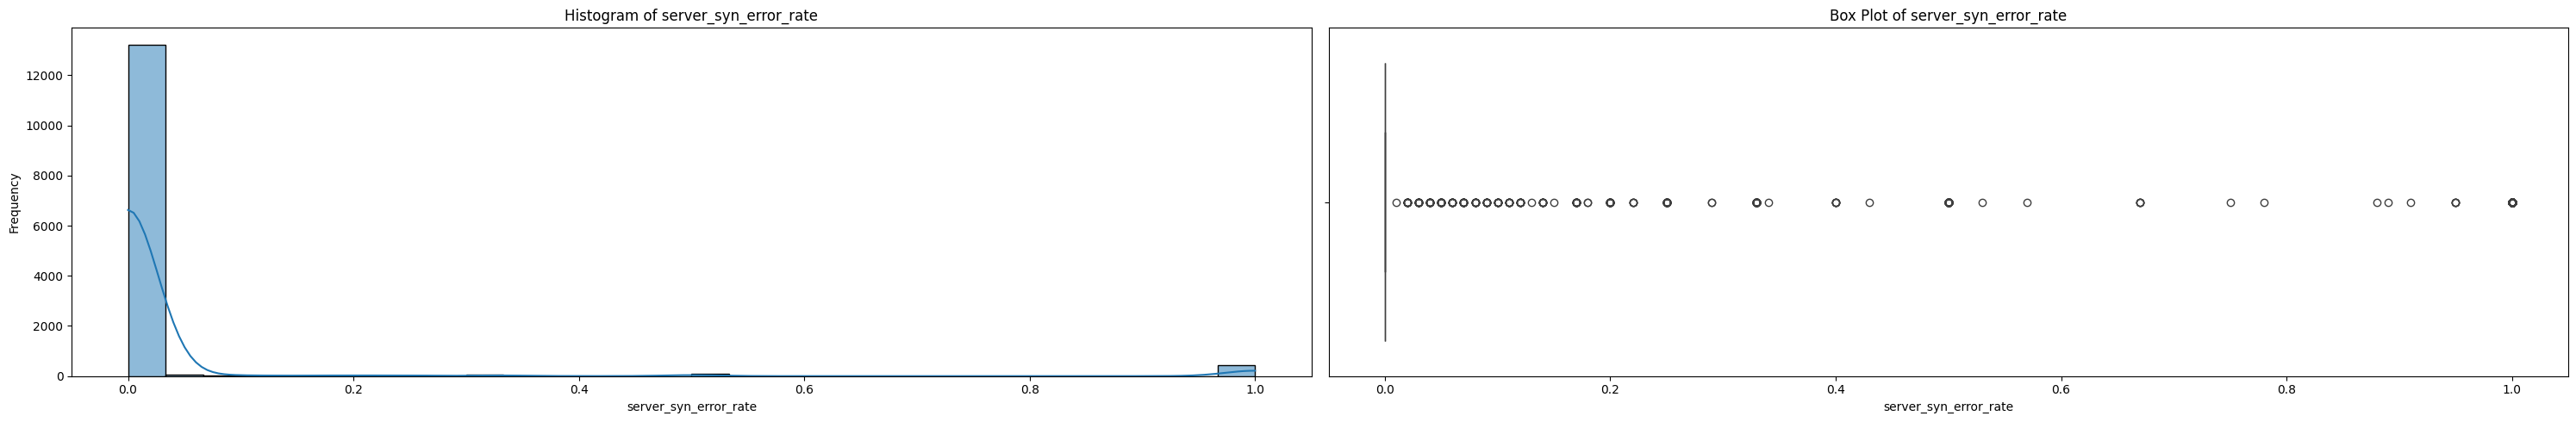

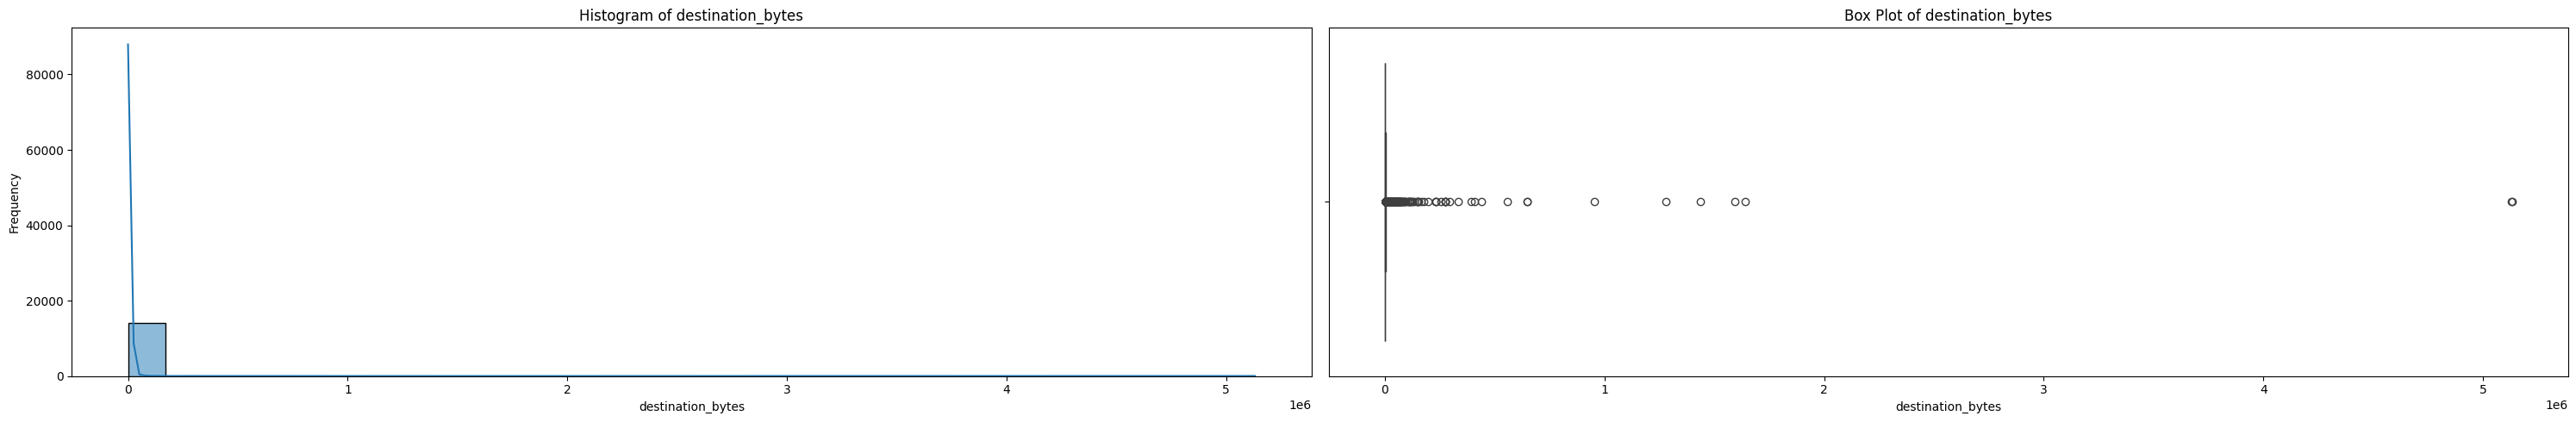

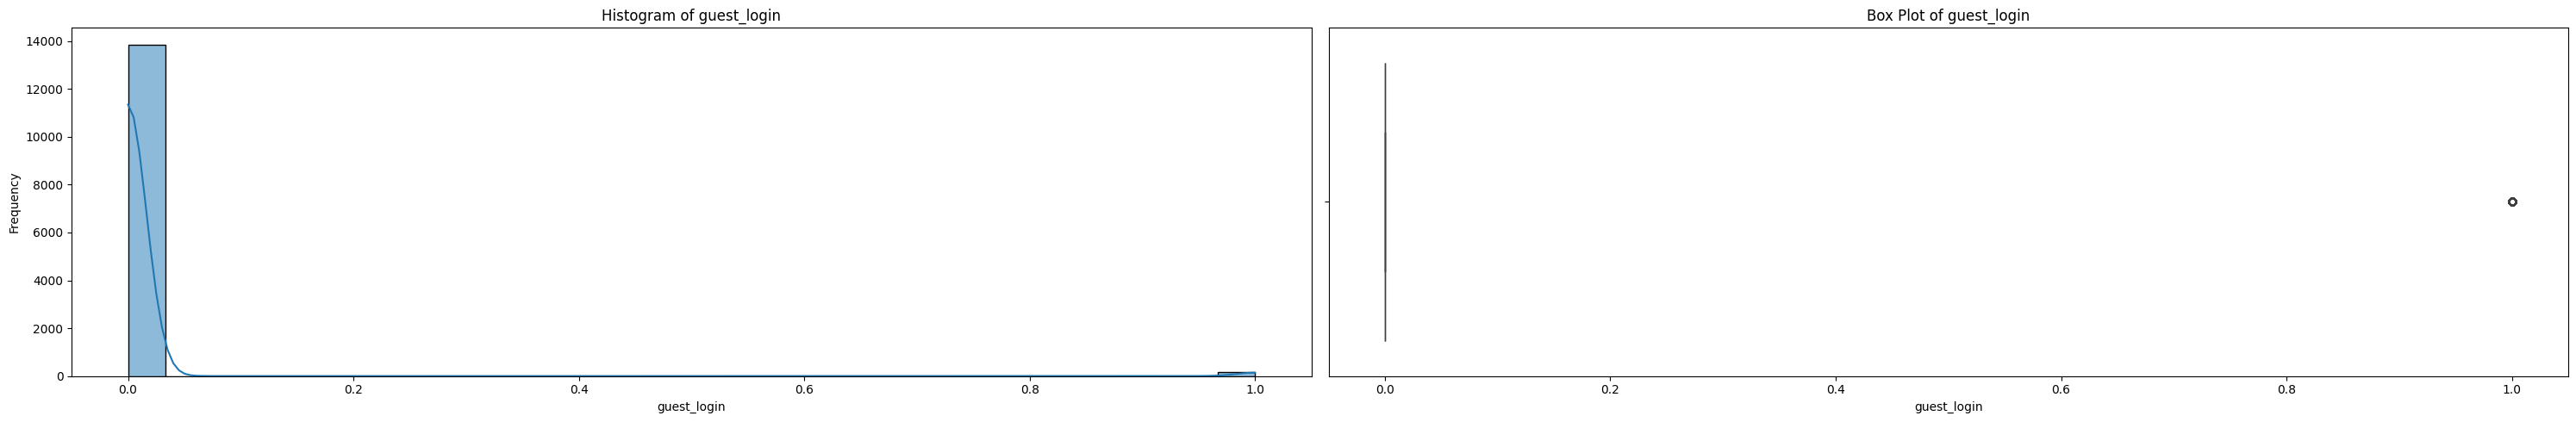

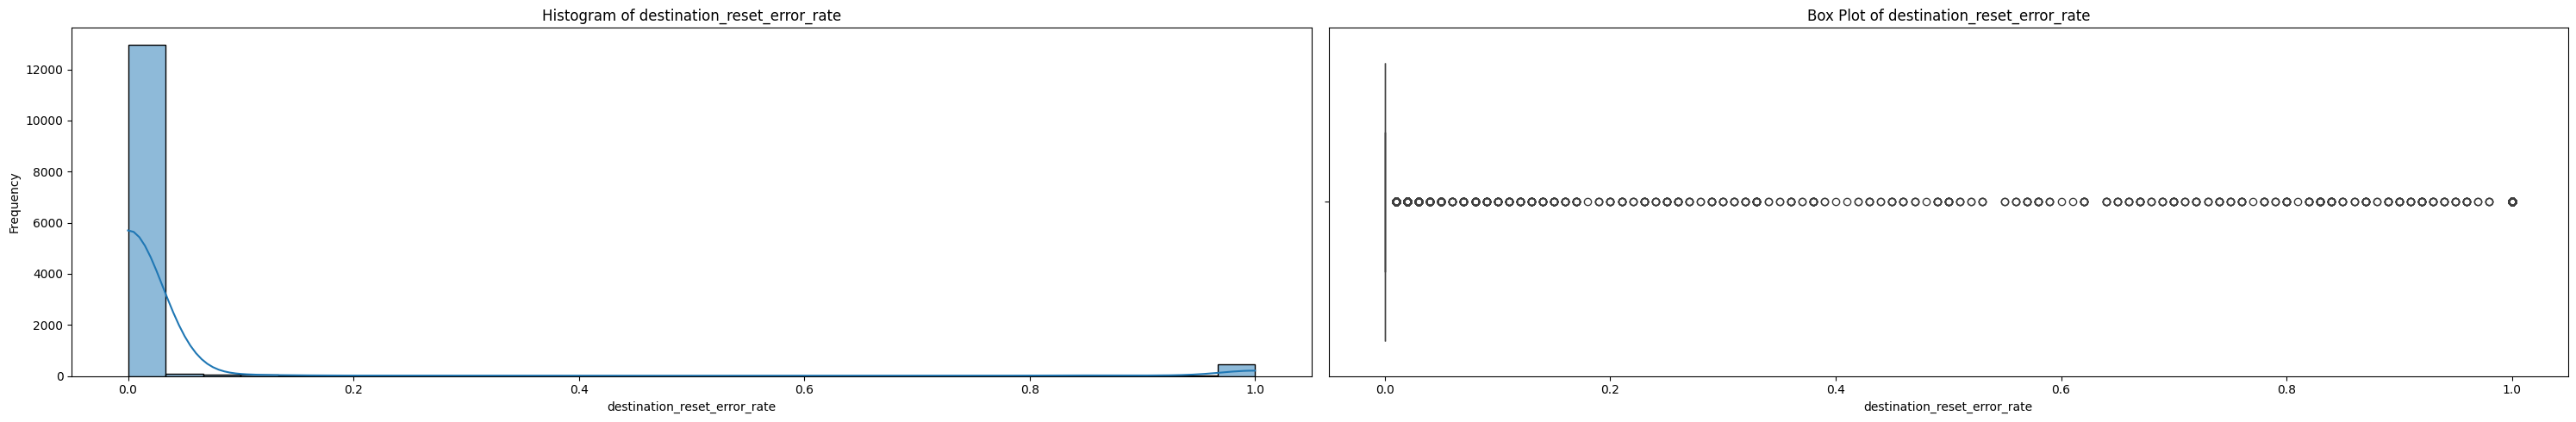

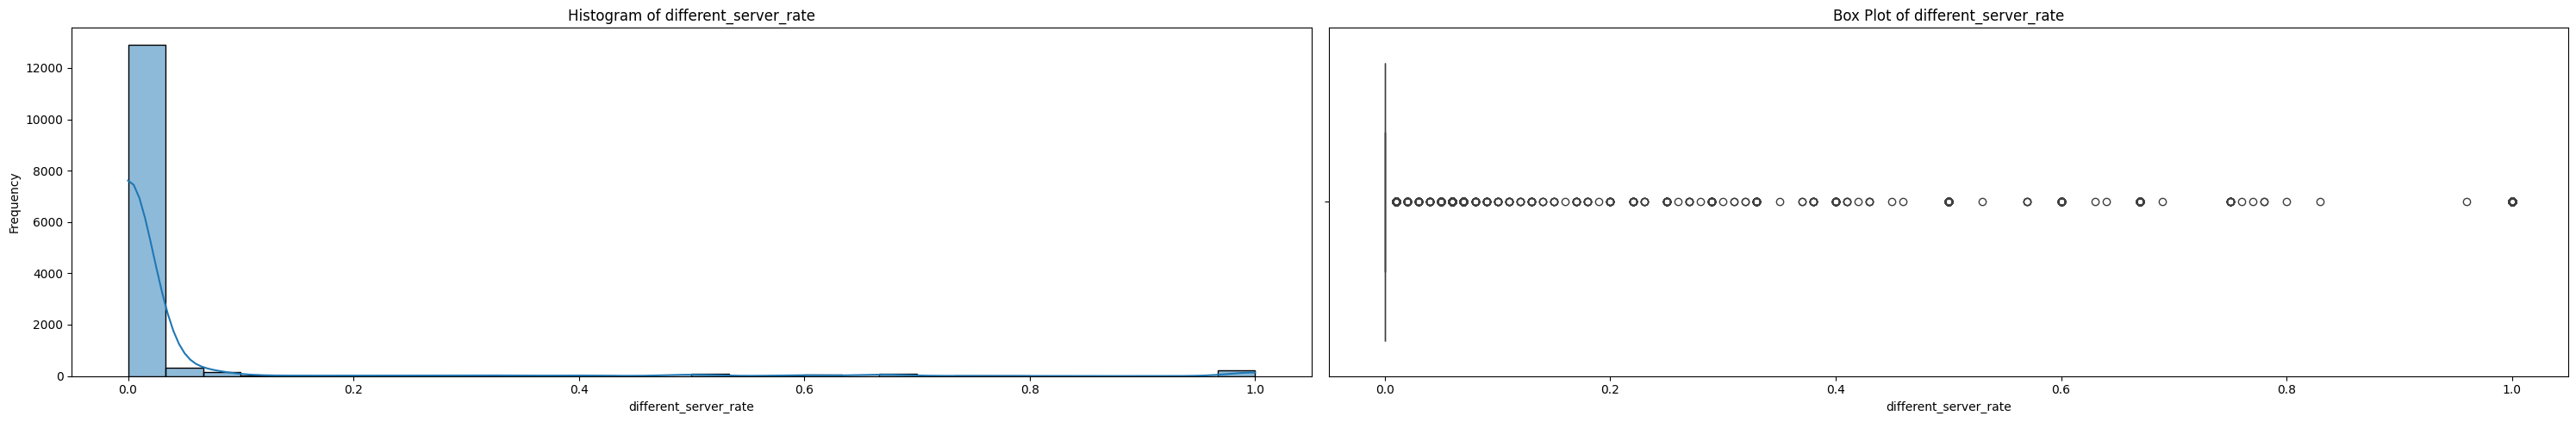

In [ ]:
# visualize outlier columns before handling outliers (Histograms and Box Plots)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(30, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')

        plt.tight_layout()
        plt.show()

plot_distributions(data, outlier_columns)

In [ ]:
#handle outliers using winsorization algorithm

def handle_outliers(data, outlier_columns, iqr_multiplier=1.5):
    for col in outlier_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

    return data

data = handle_outliers(data, outlier_columns)

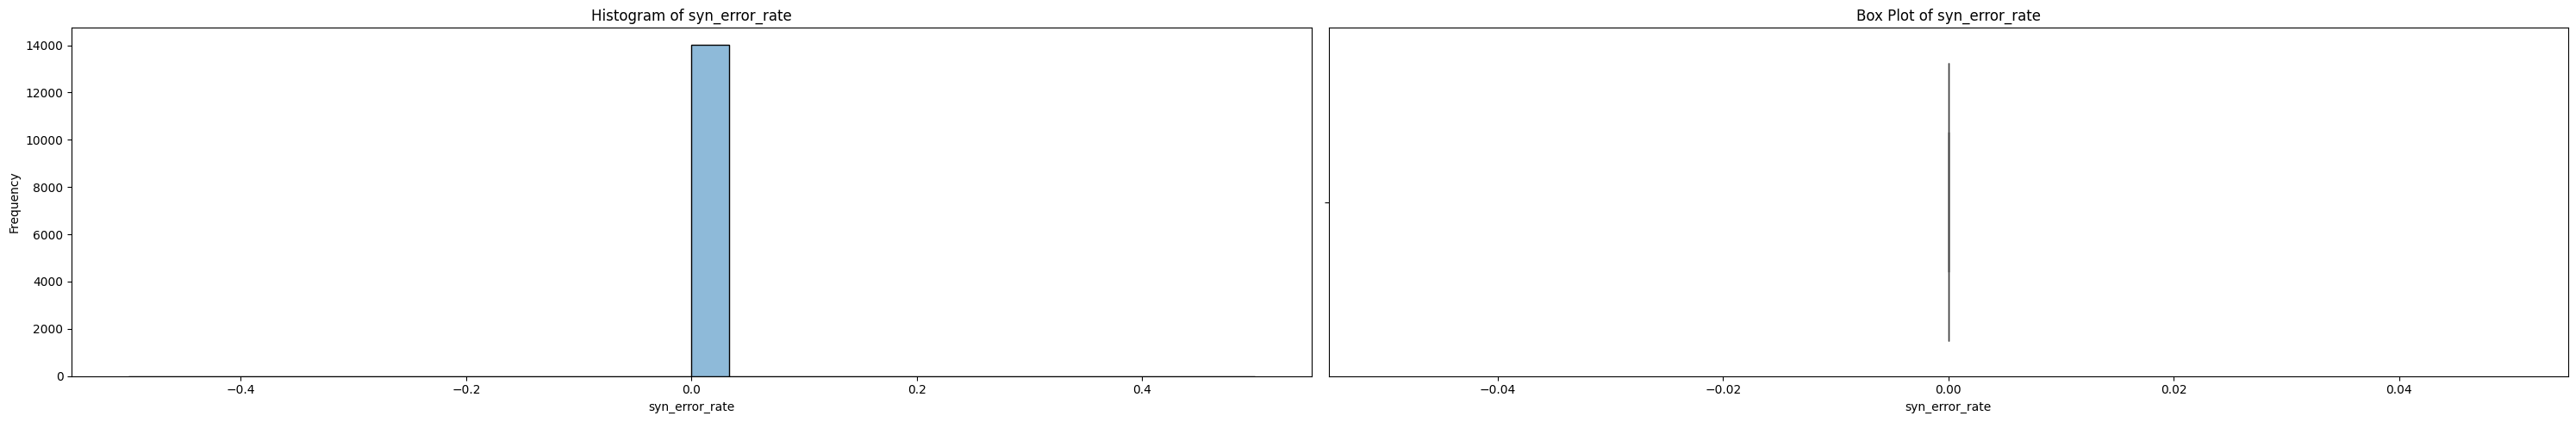

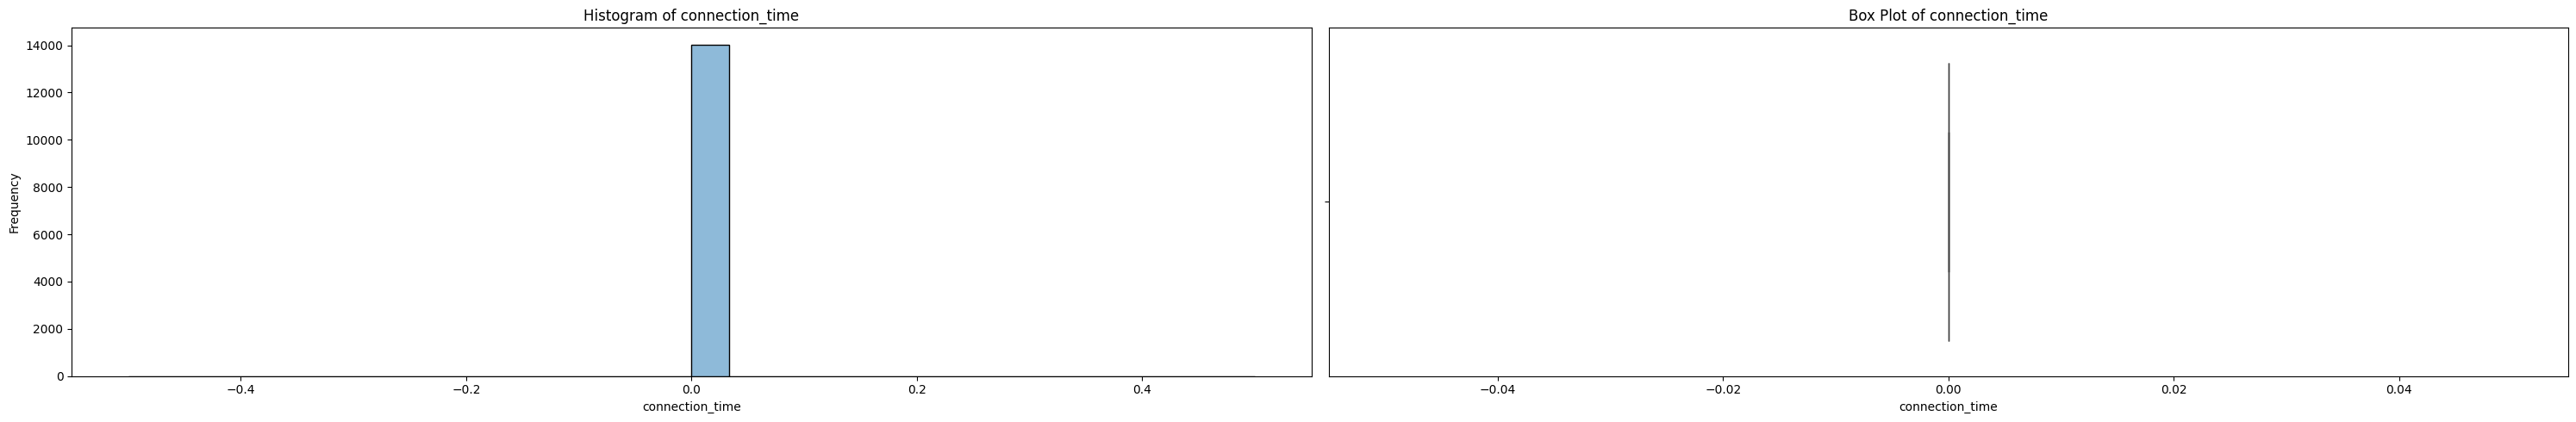

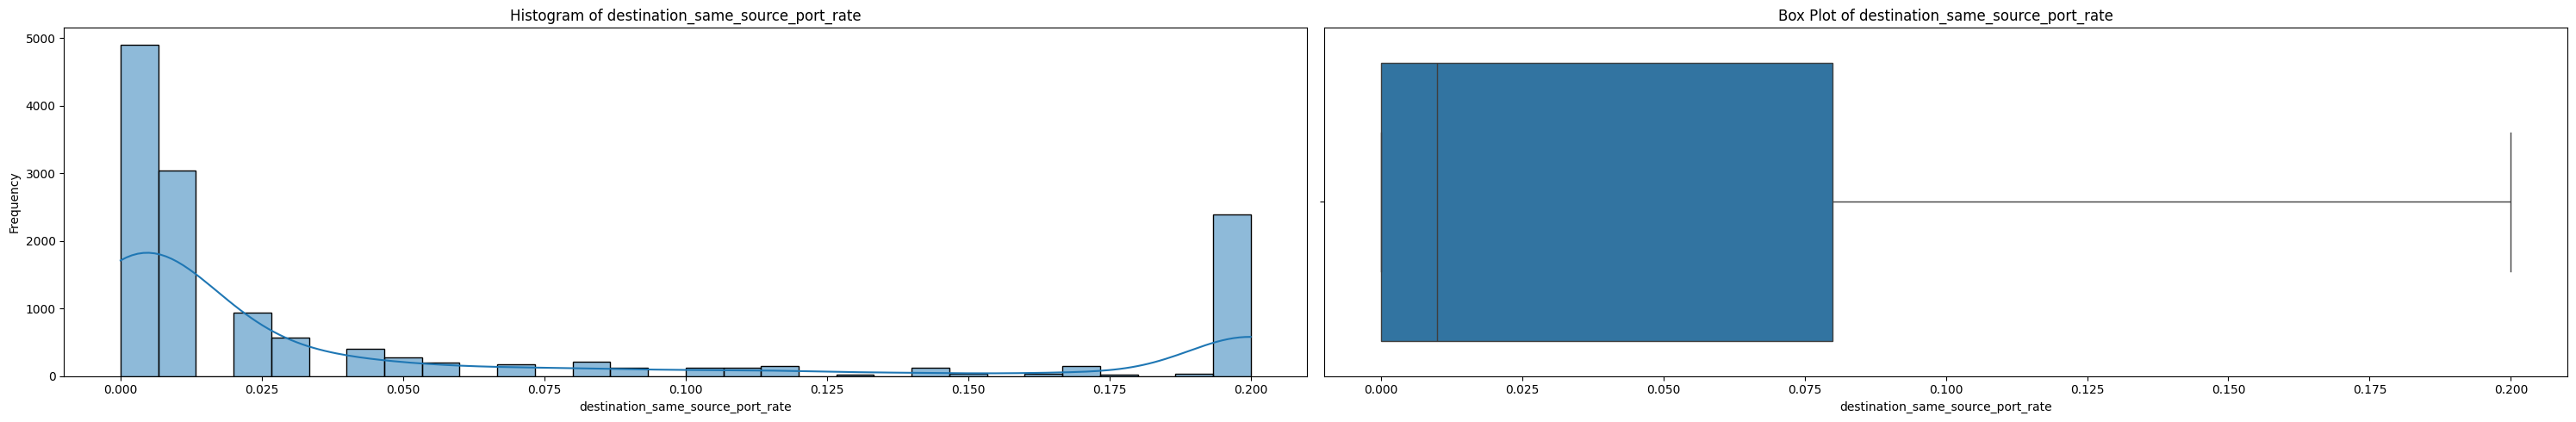

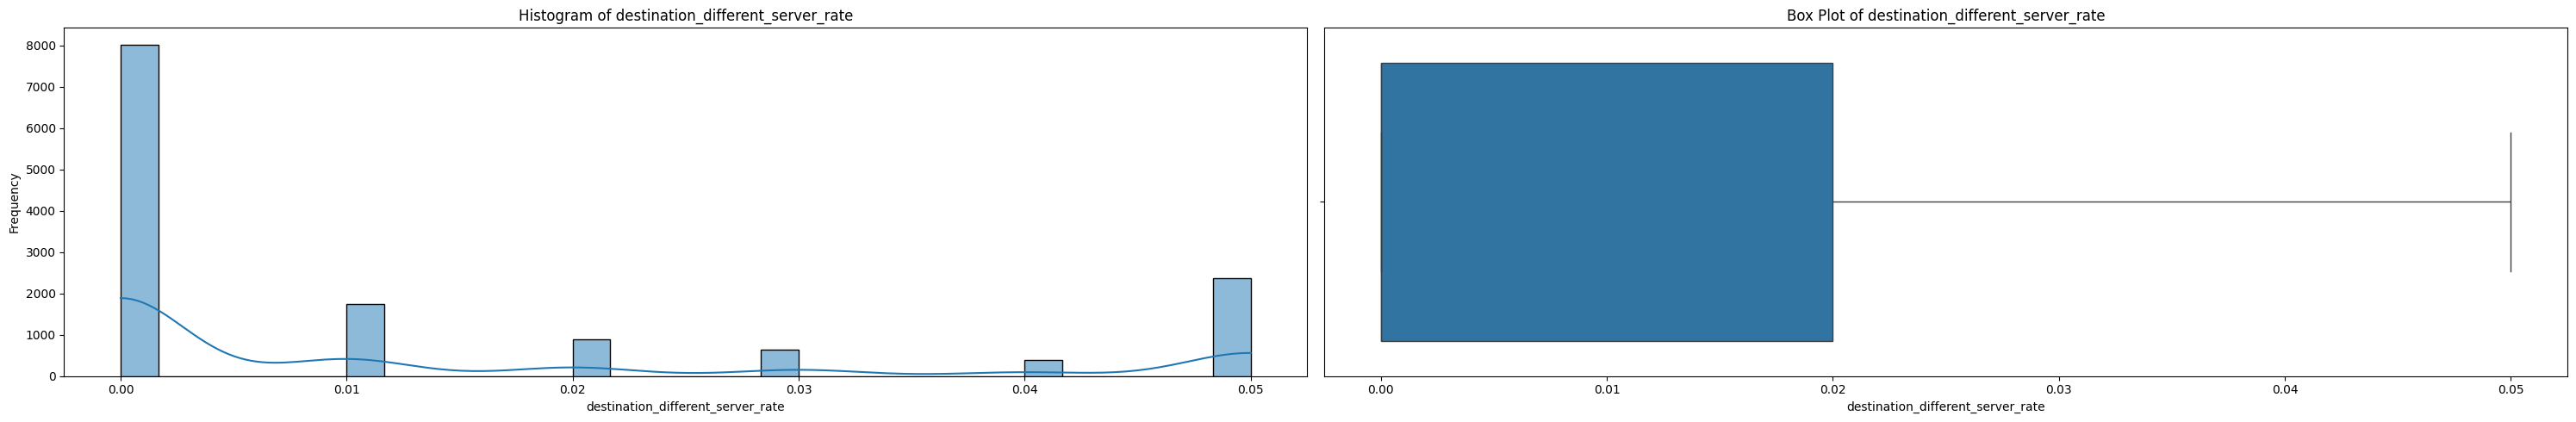

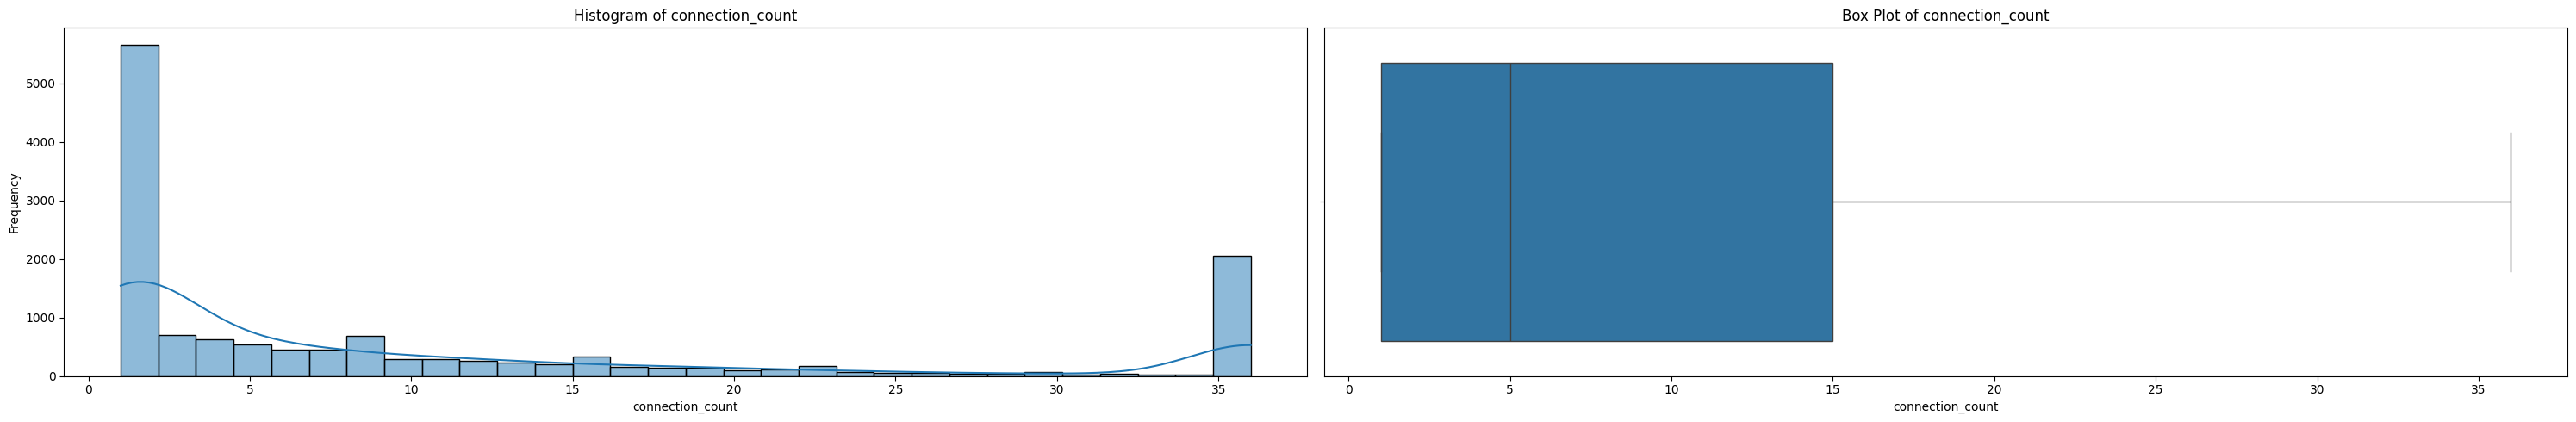

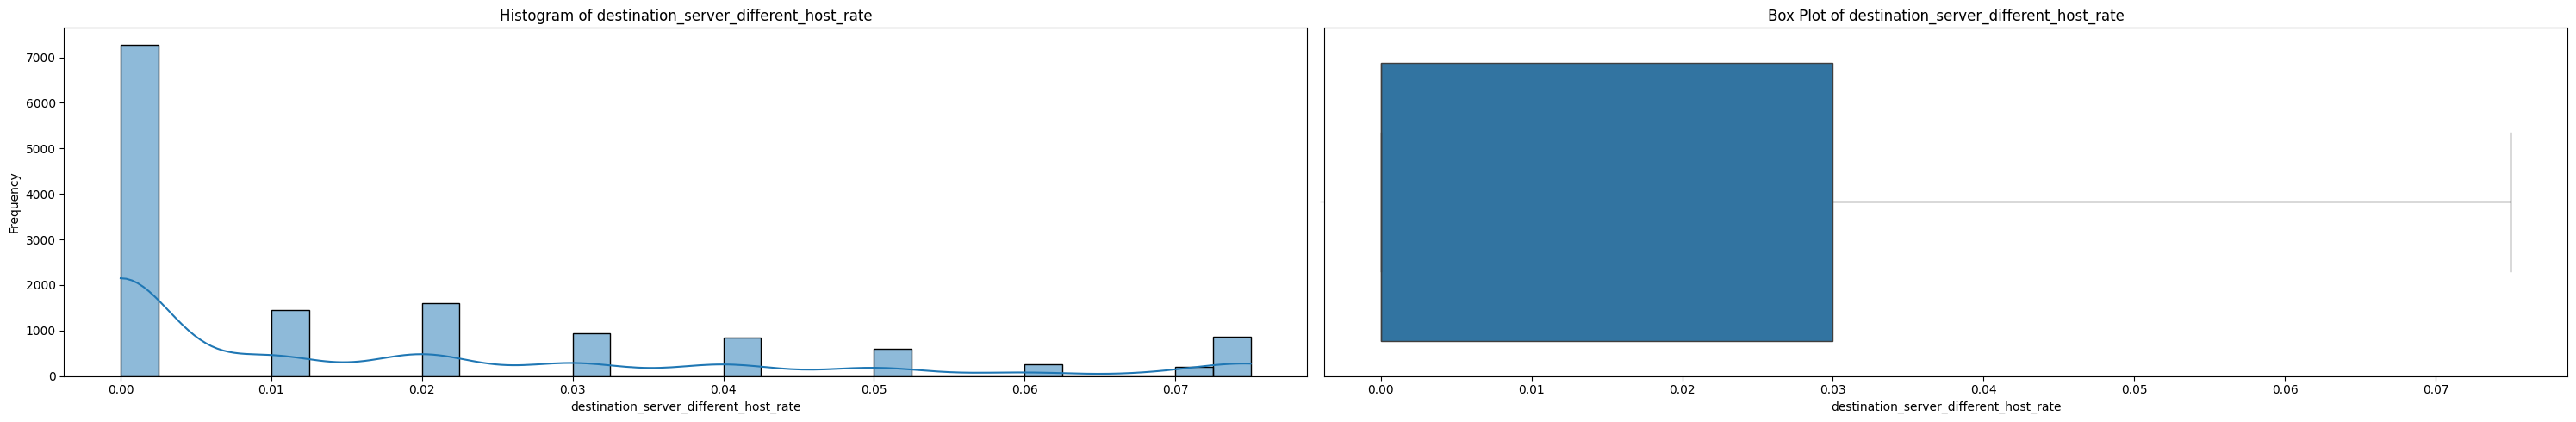

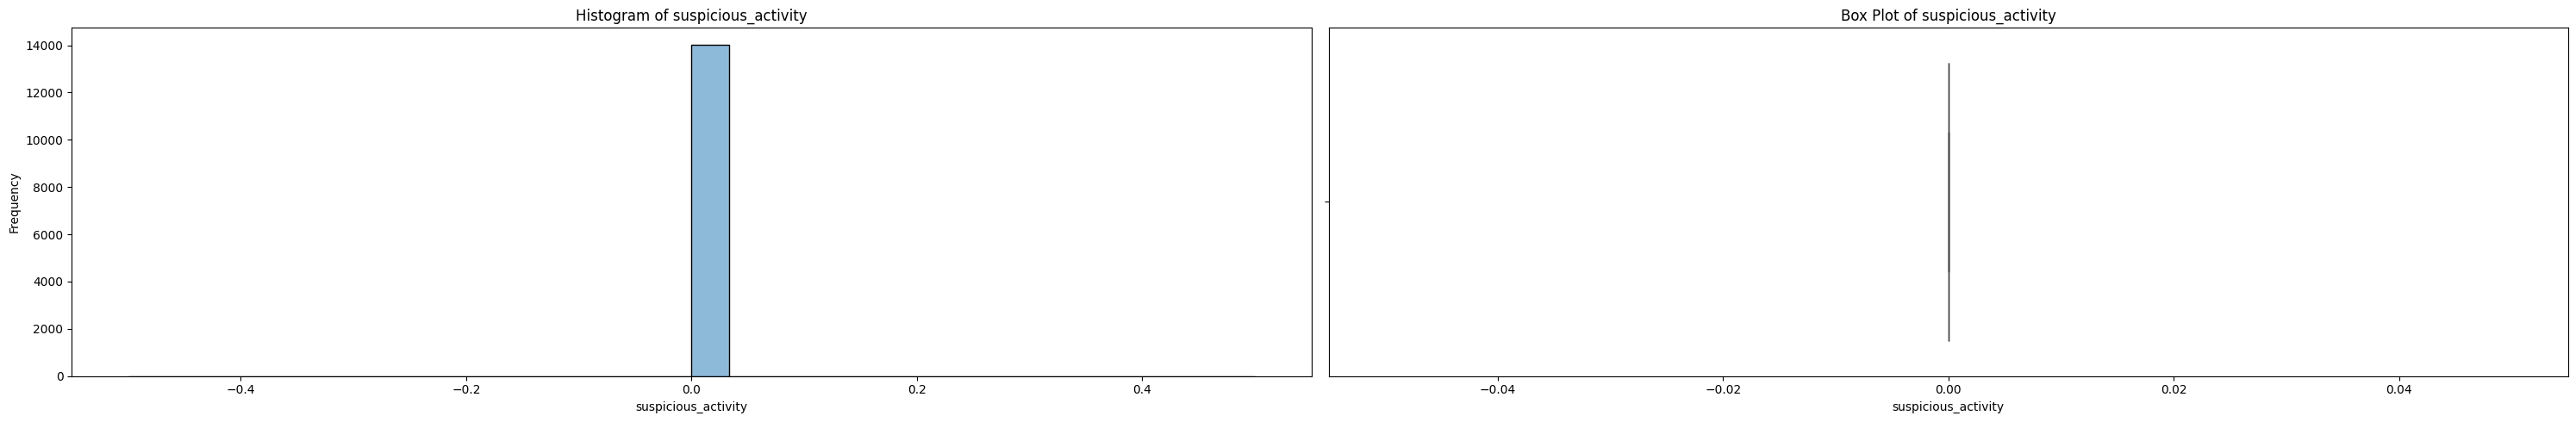

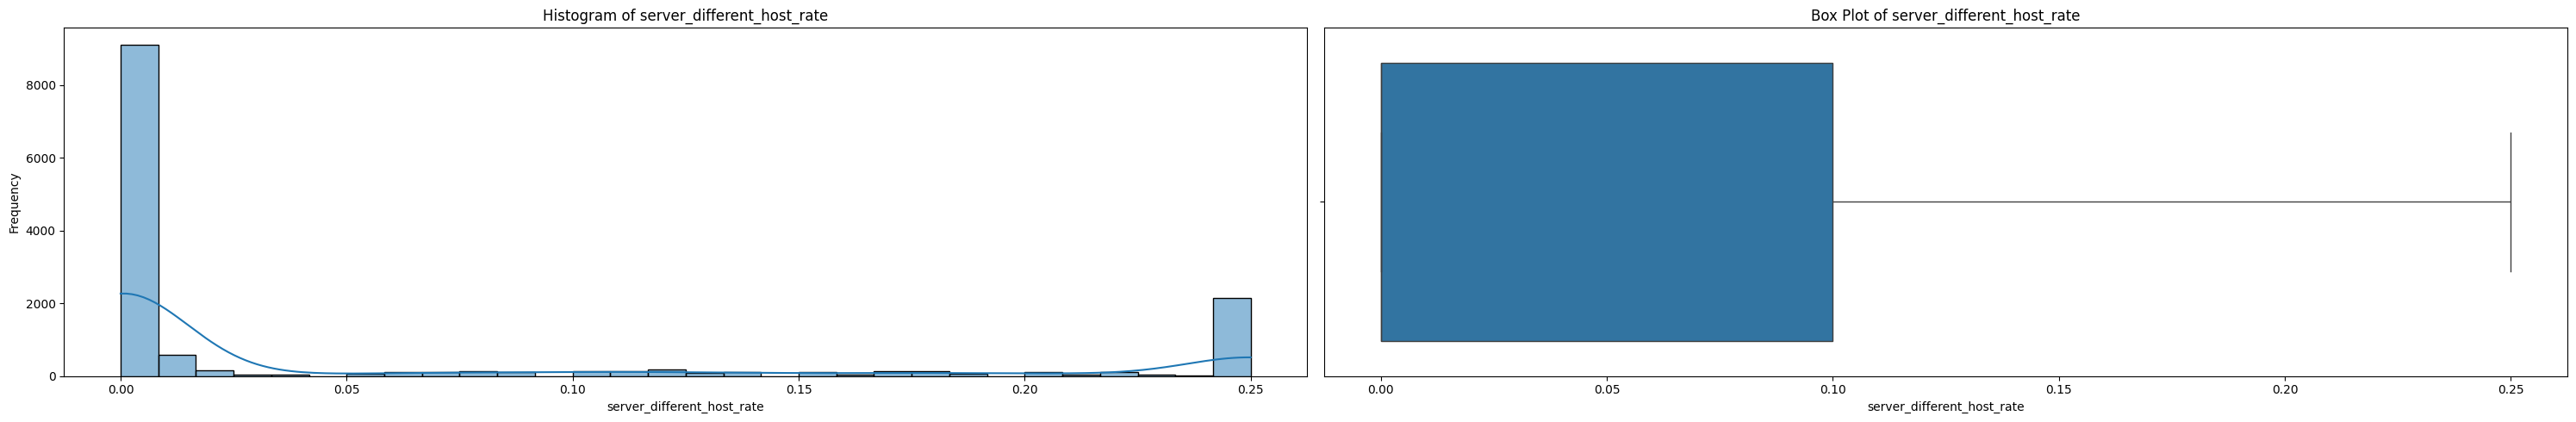

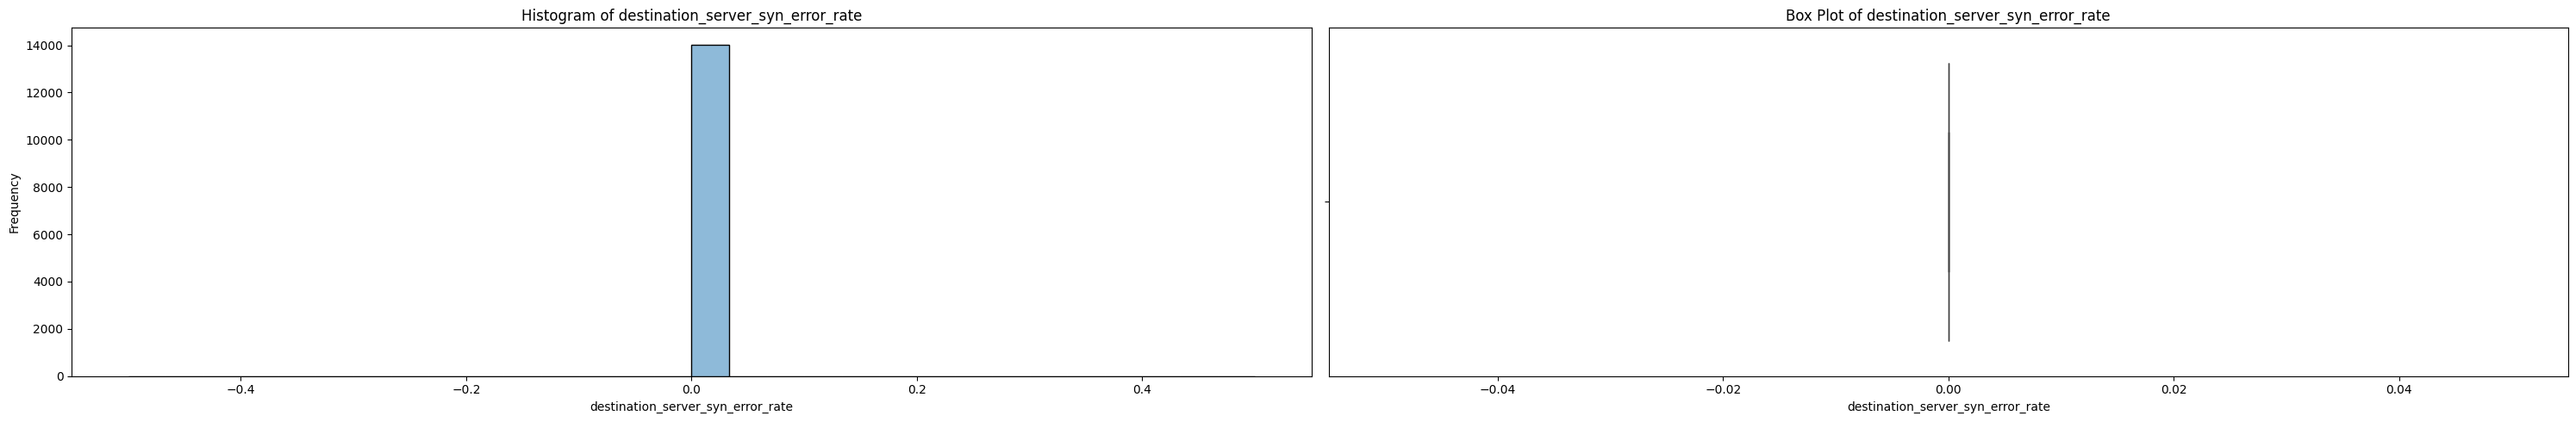

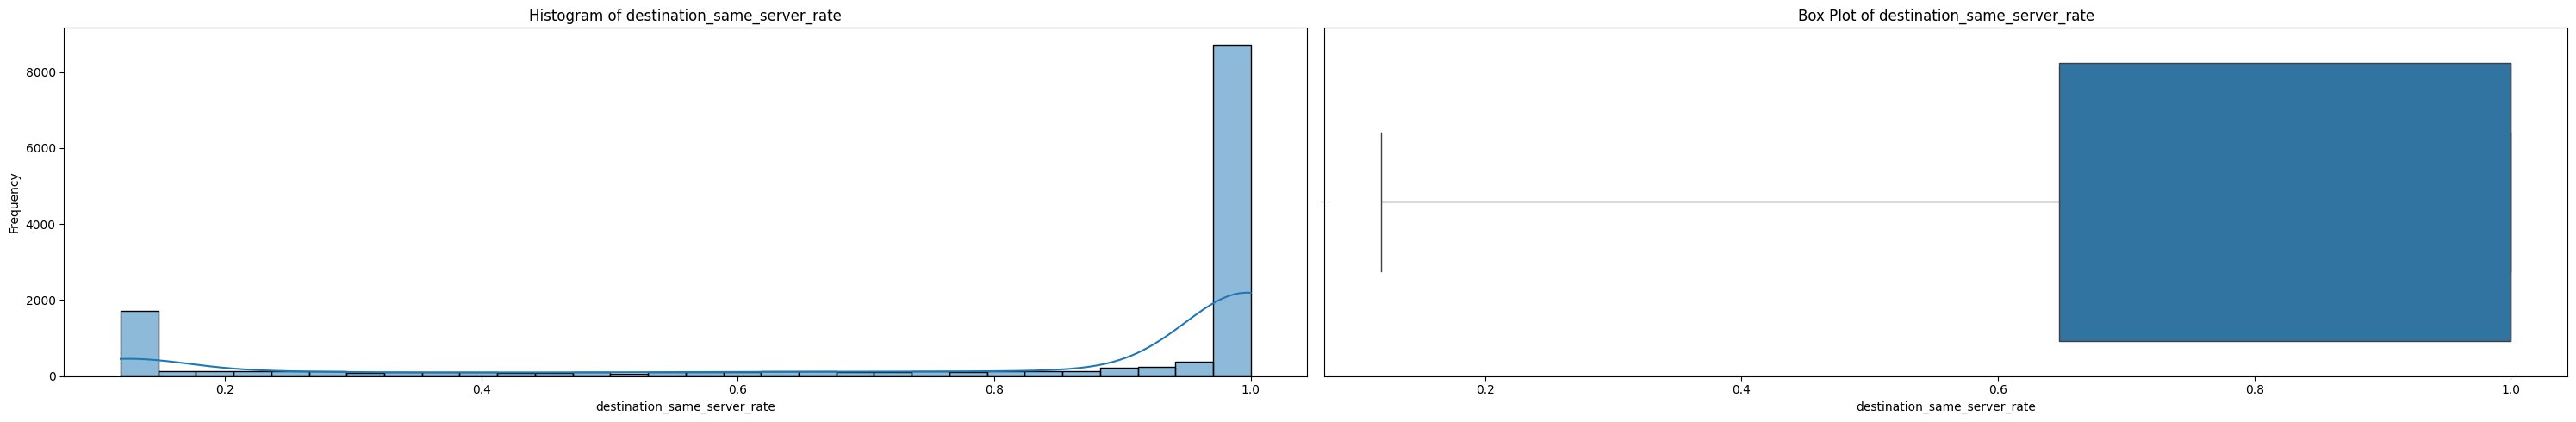

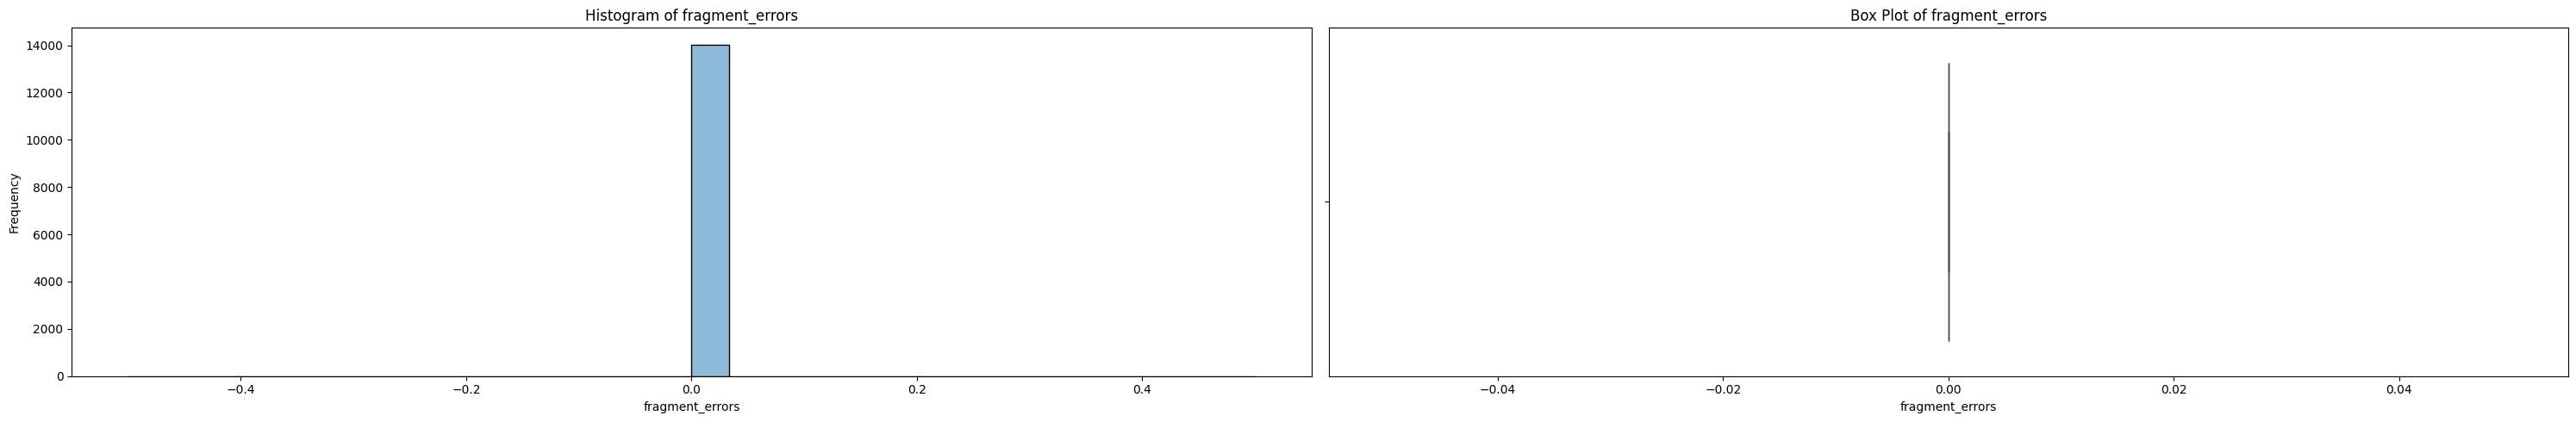

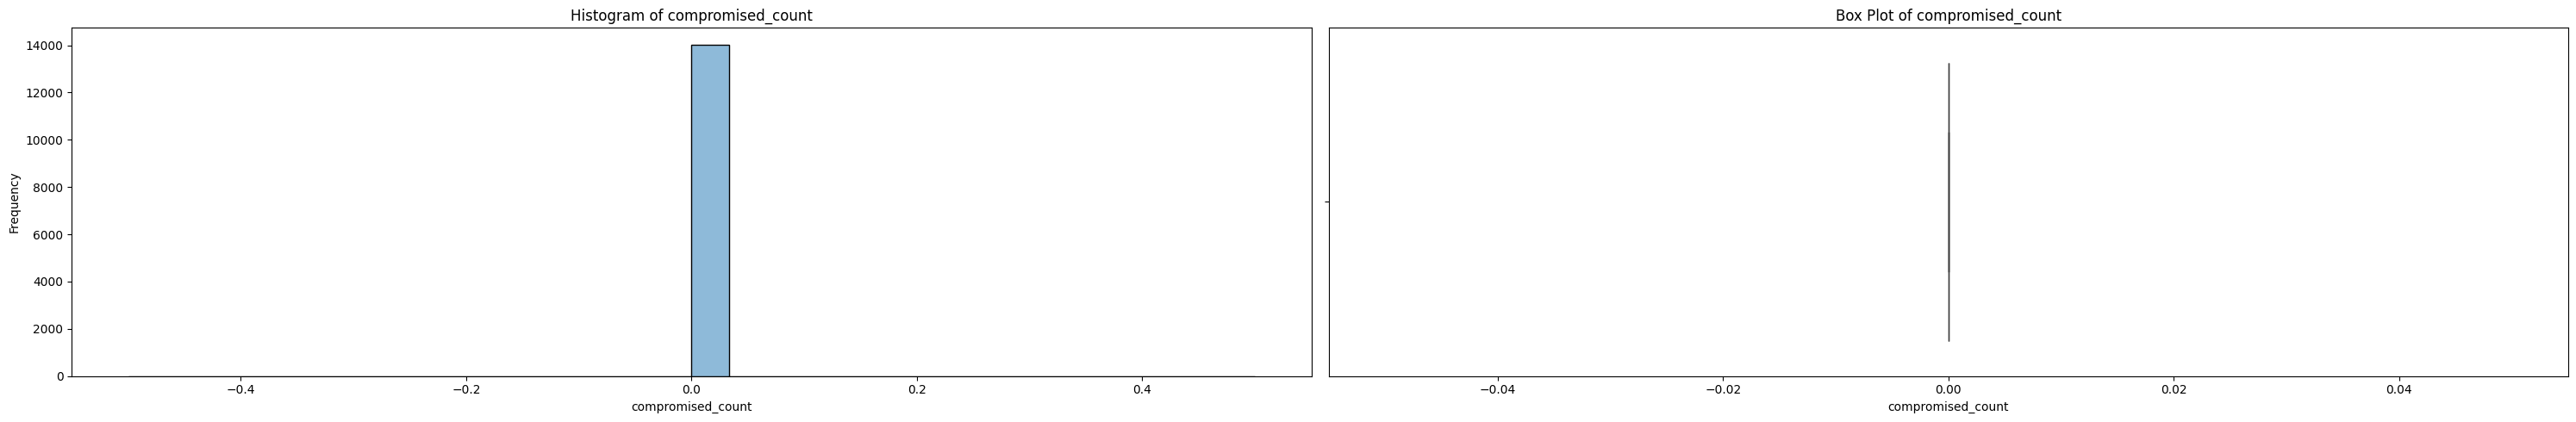

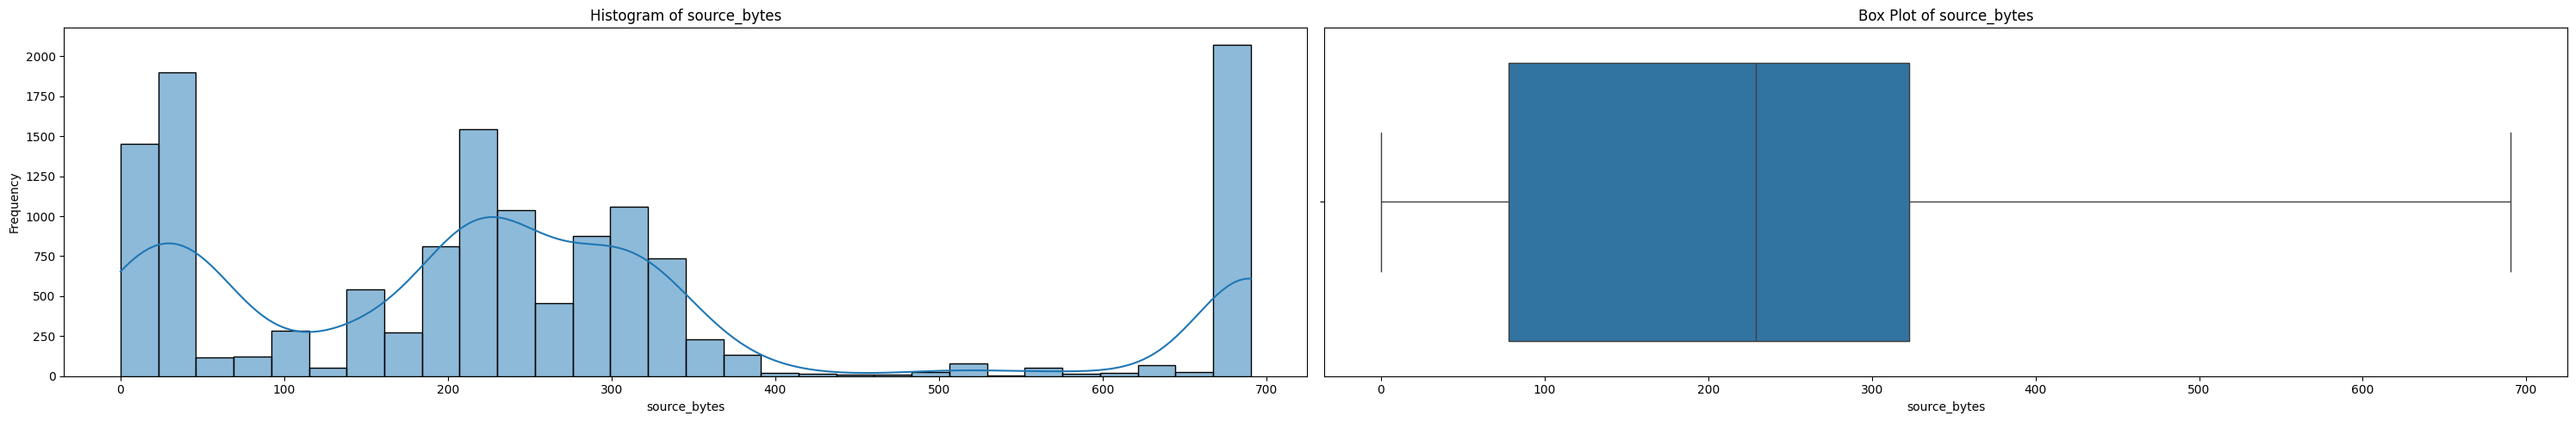

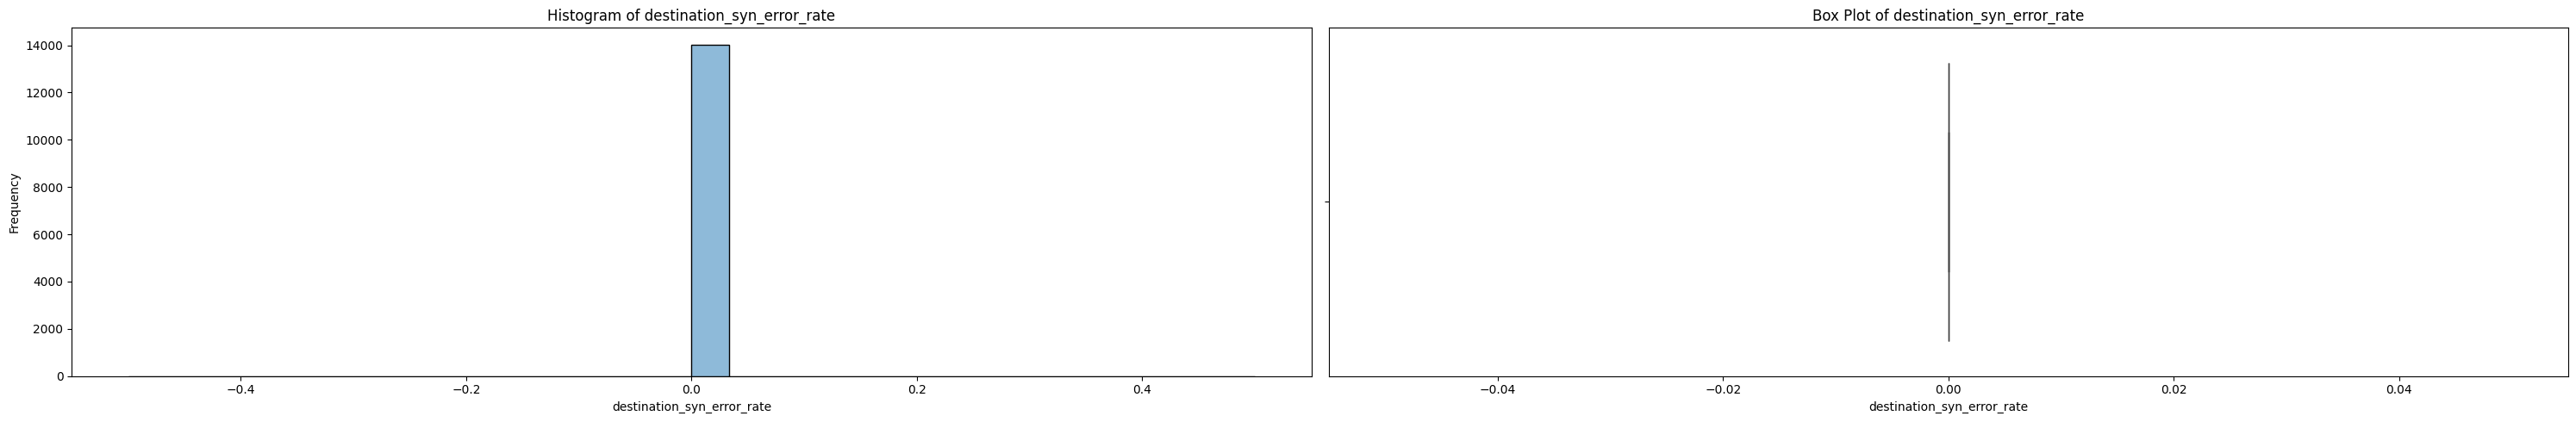

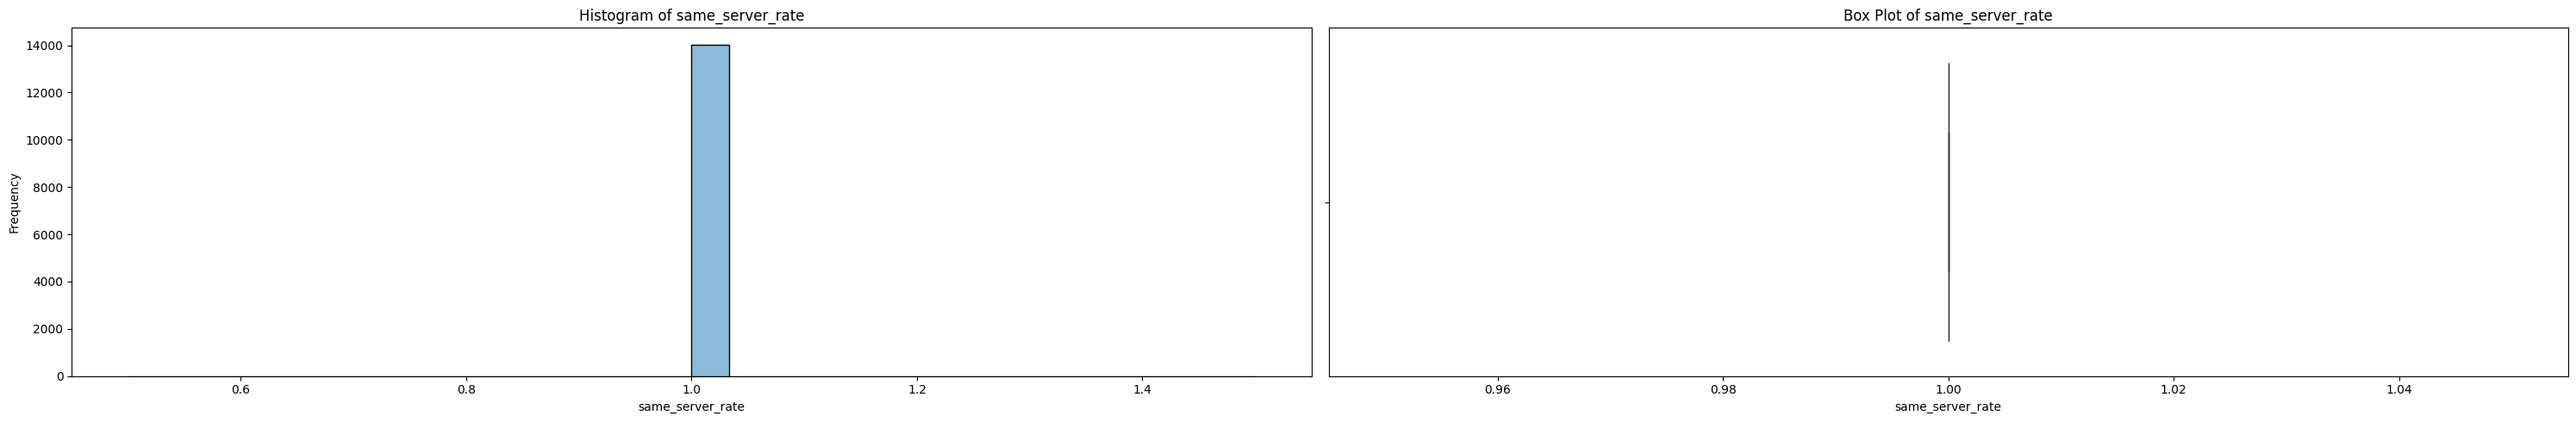

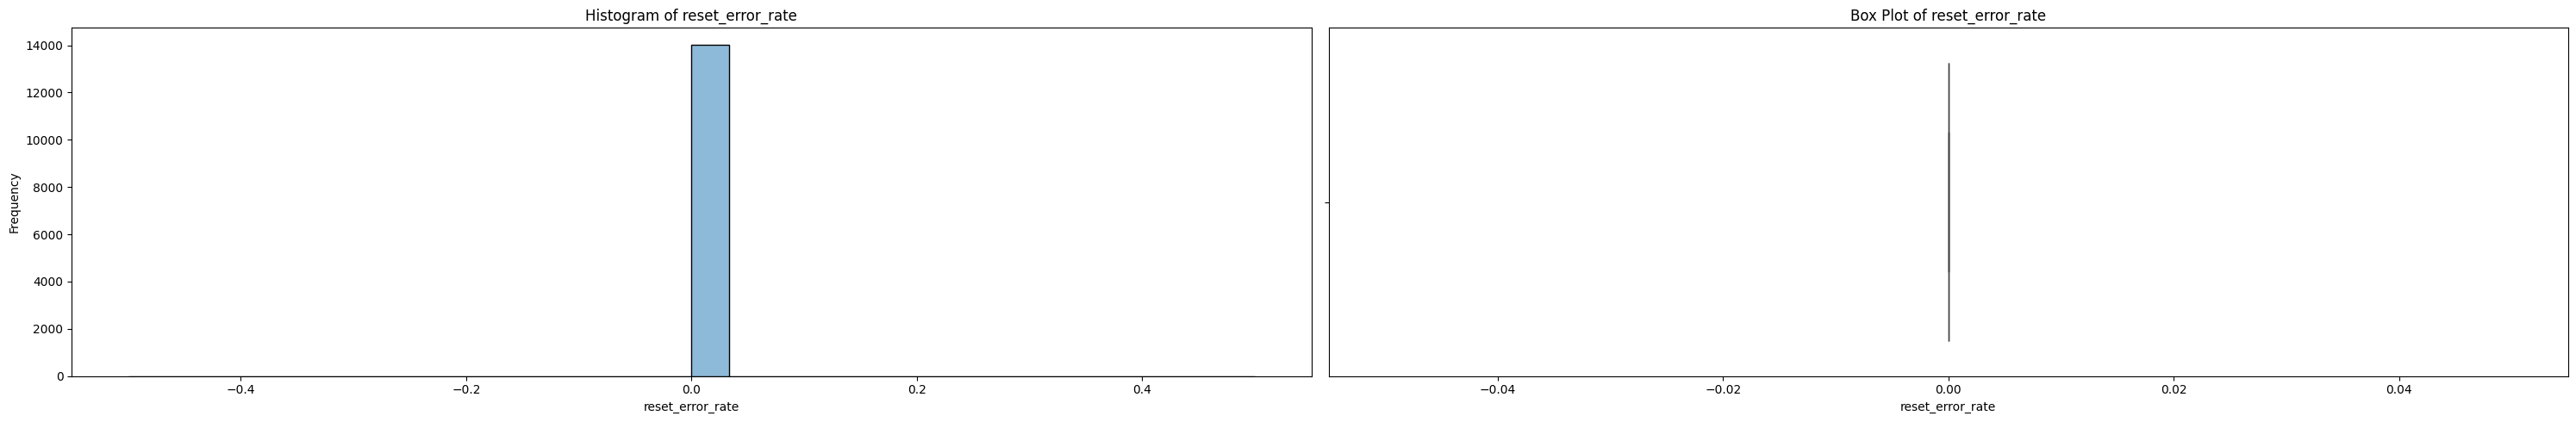

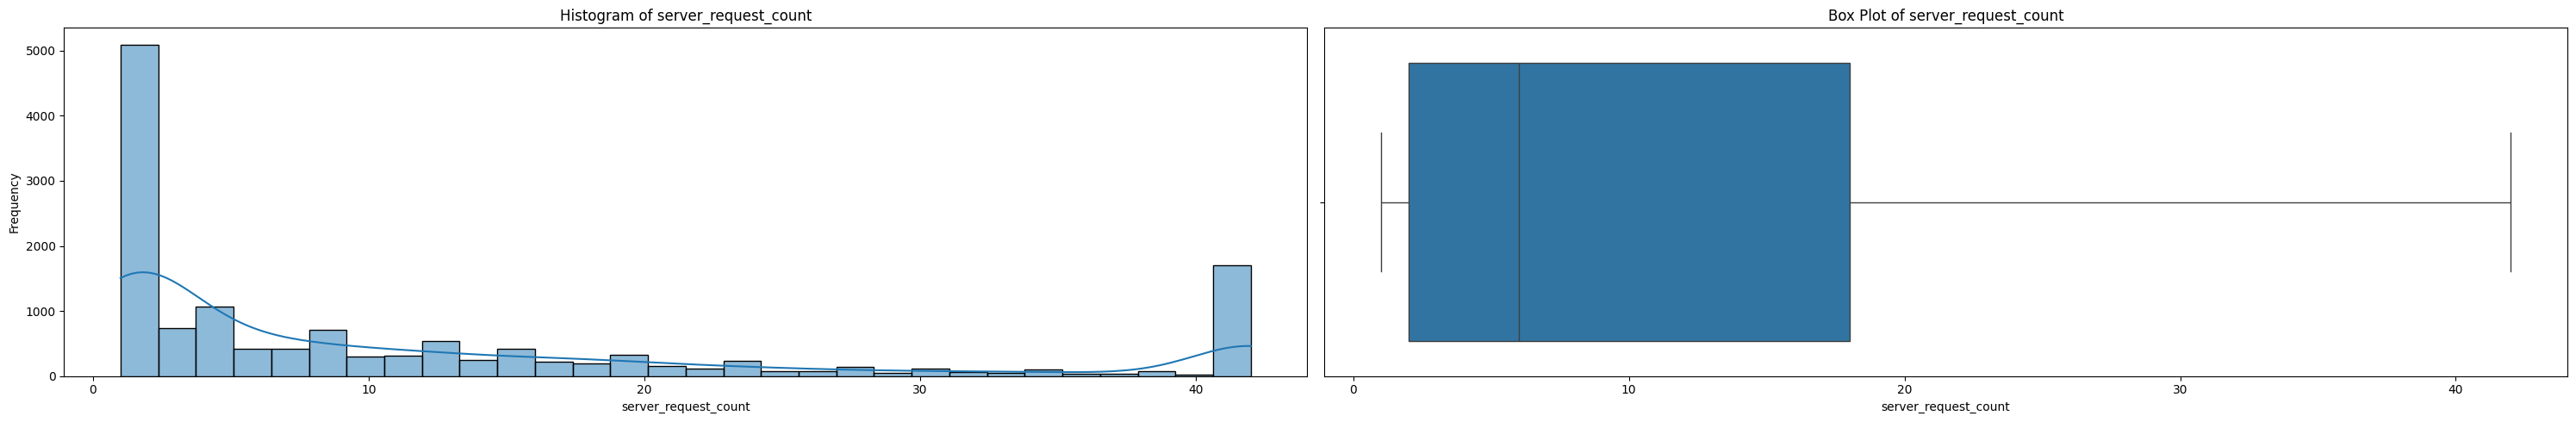

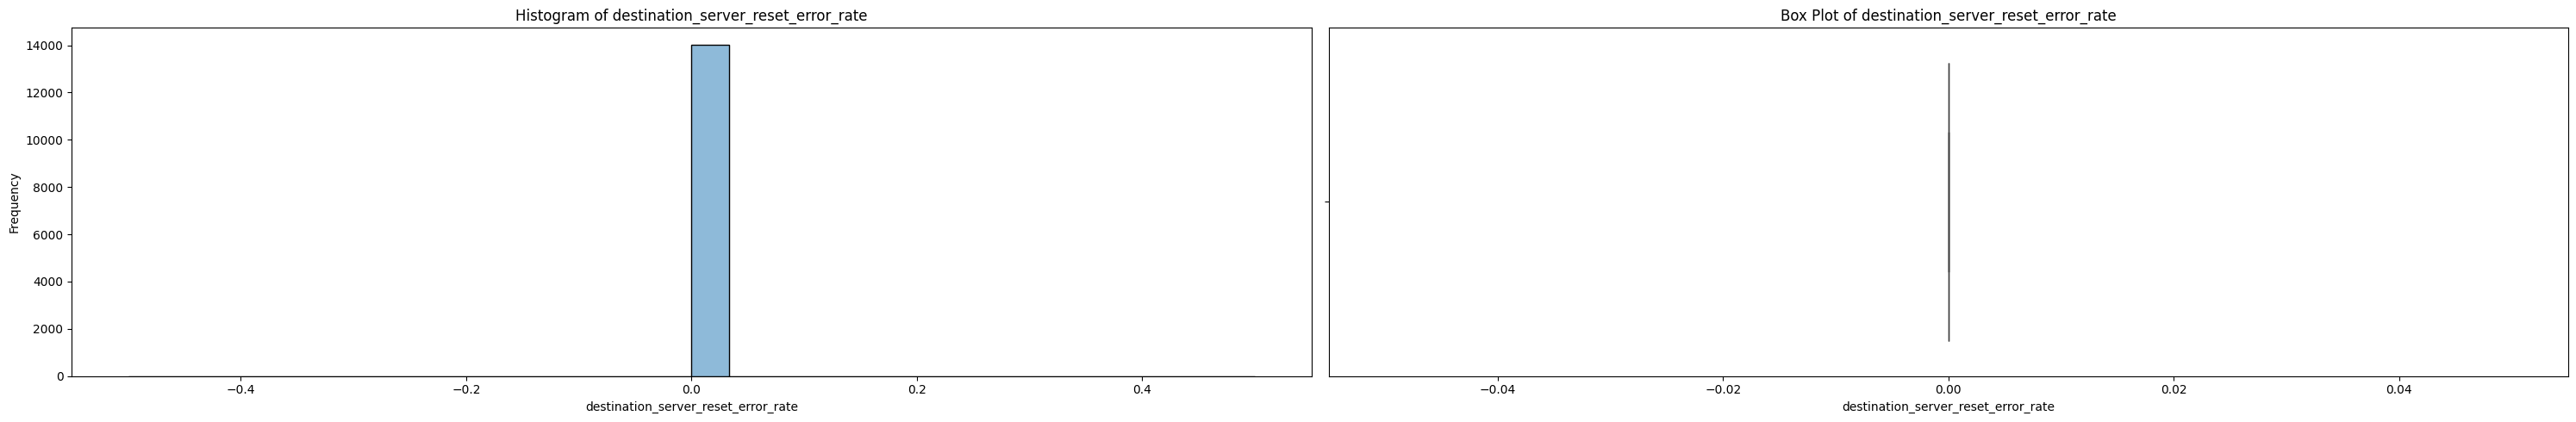

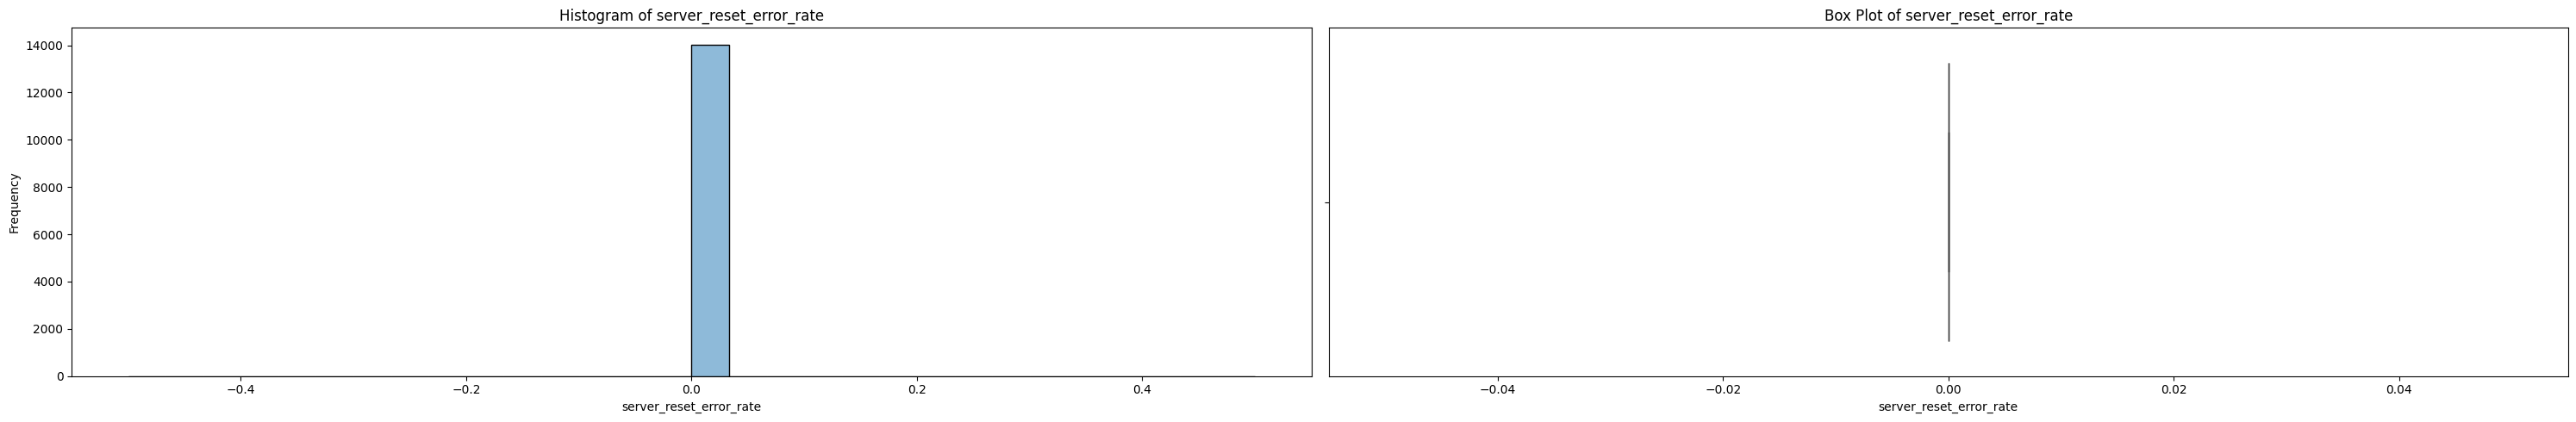

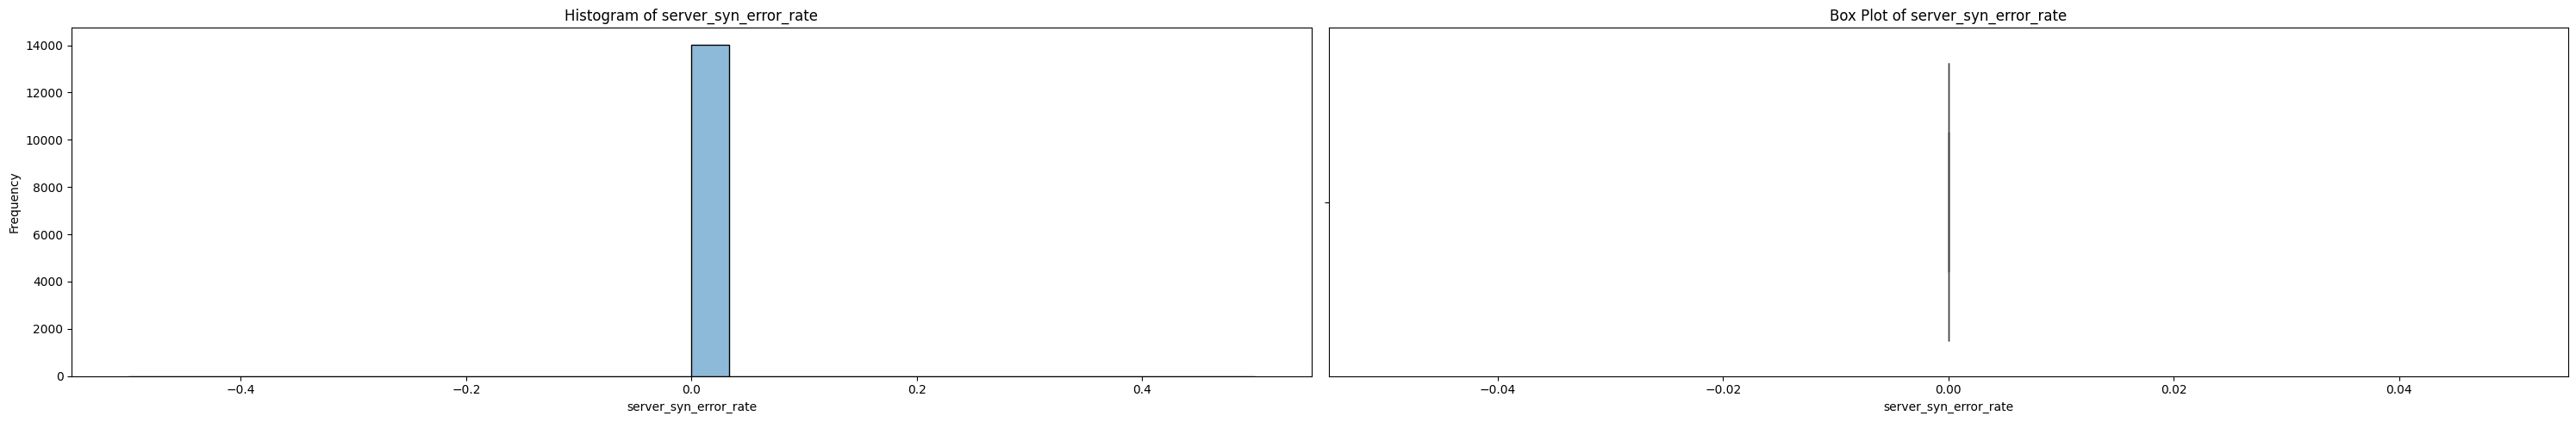

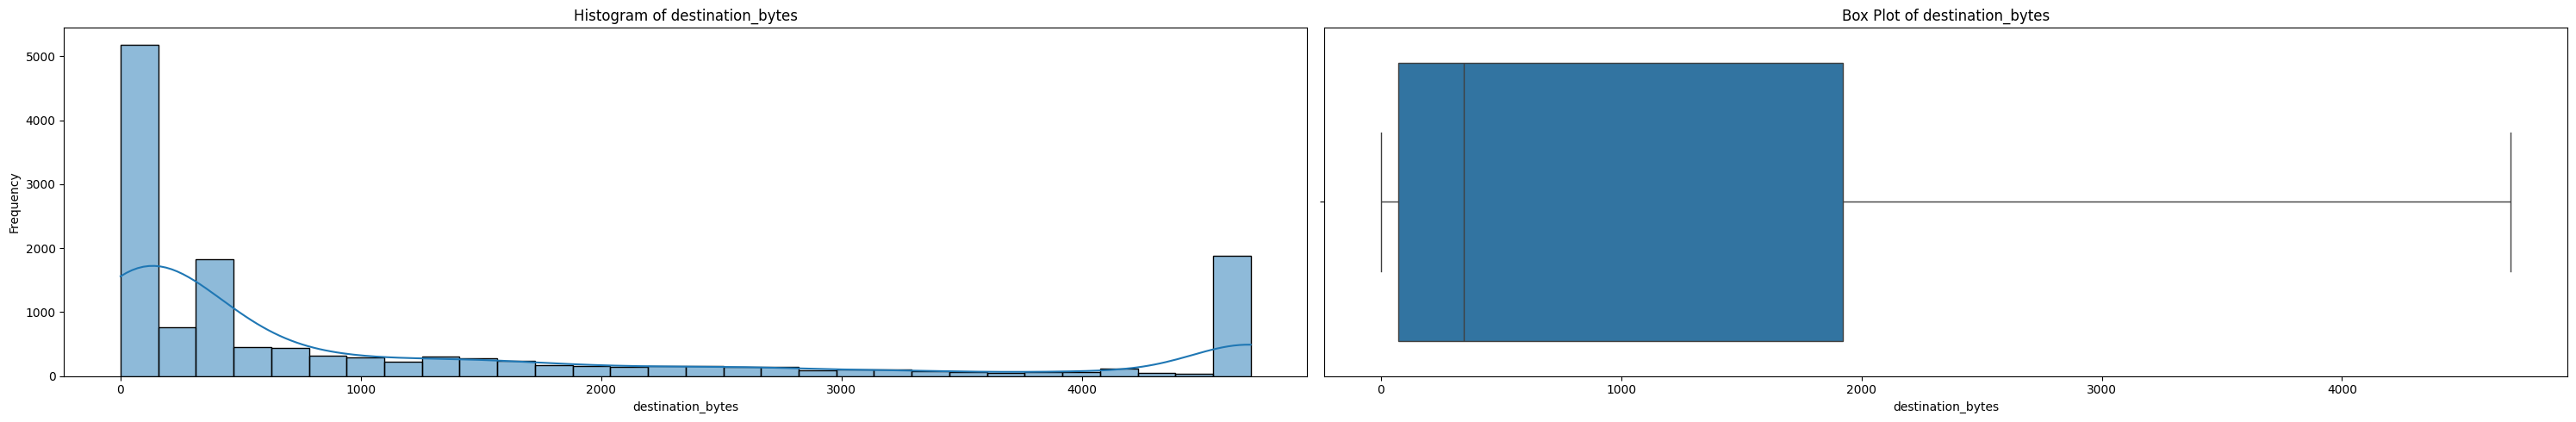

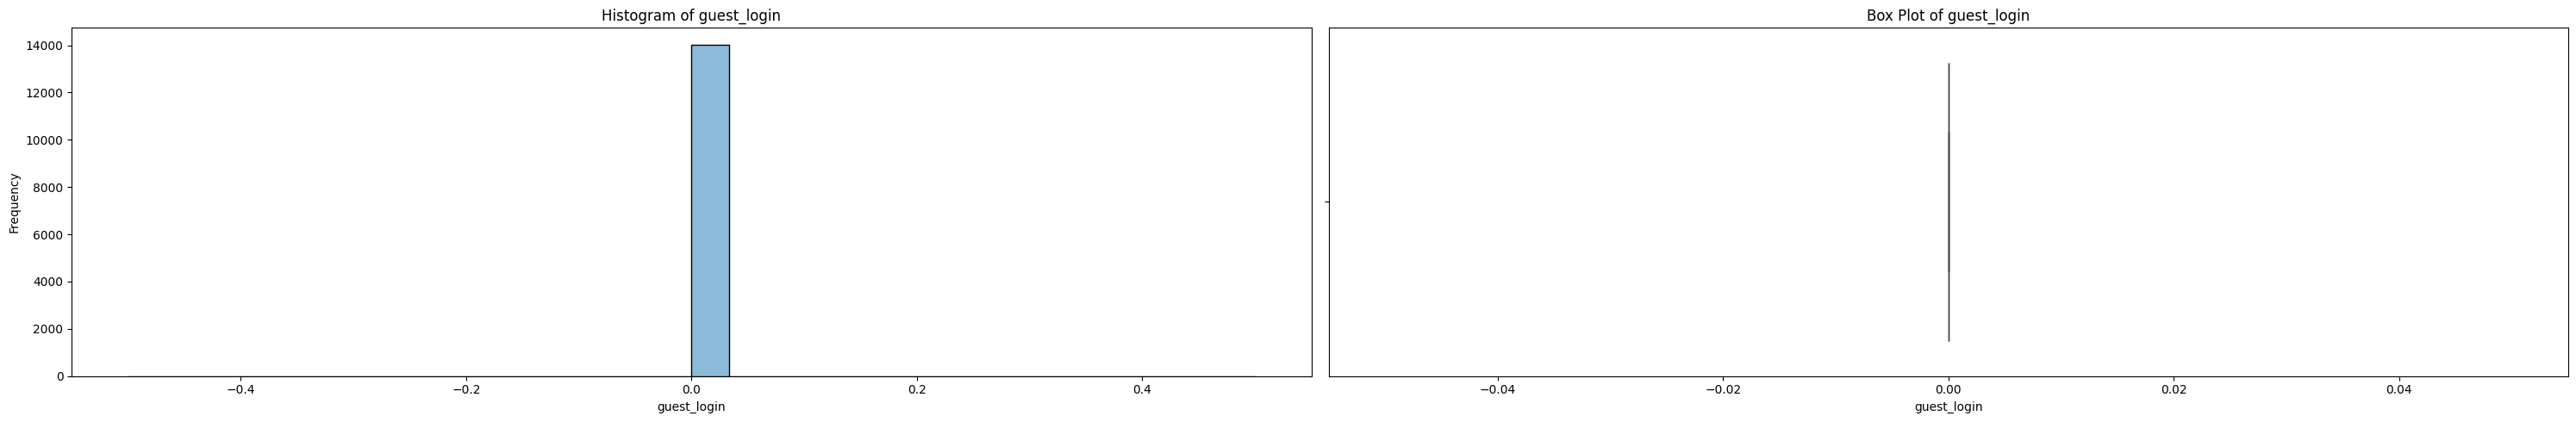

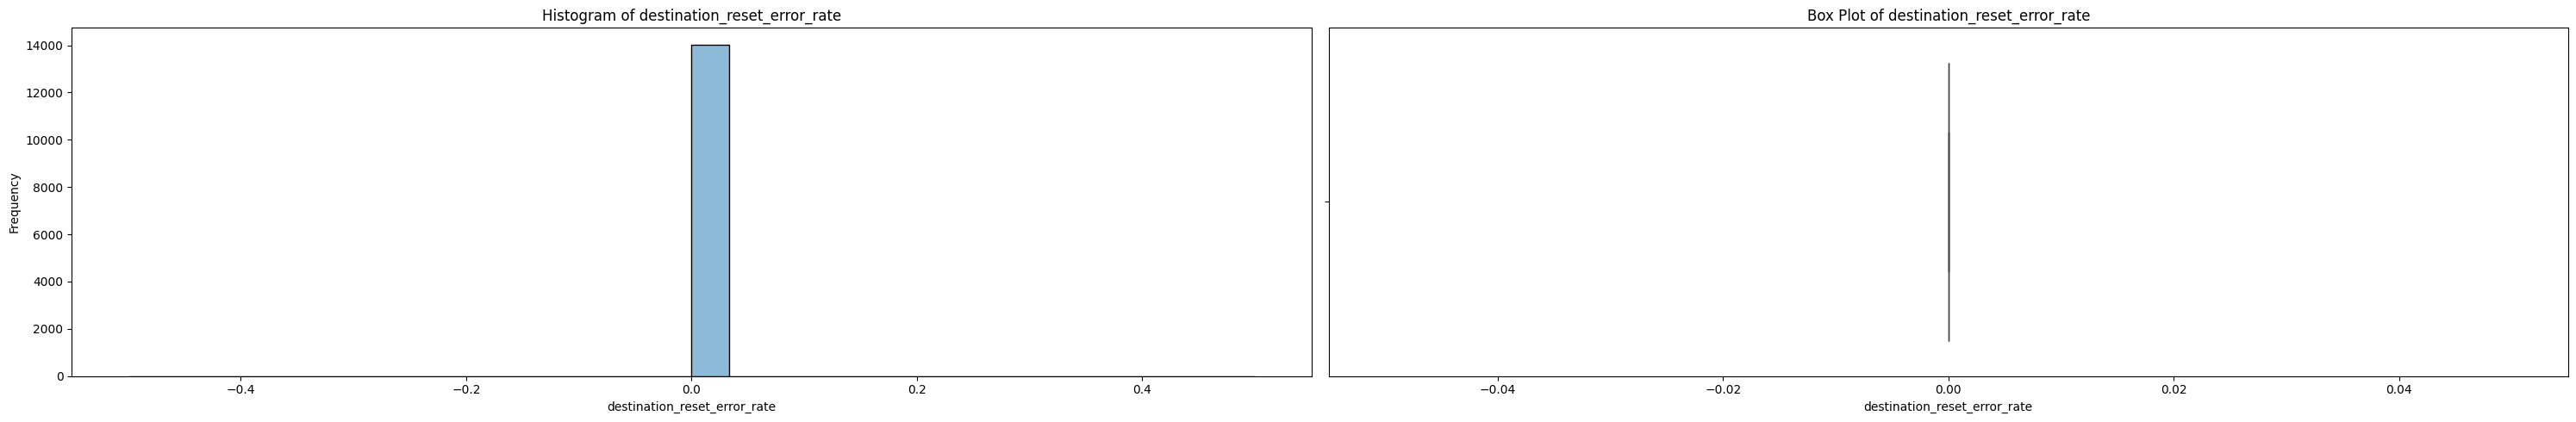

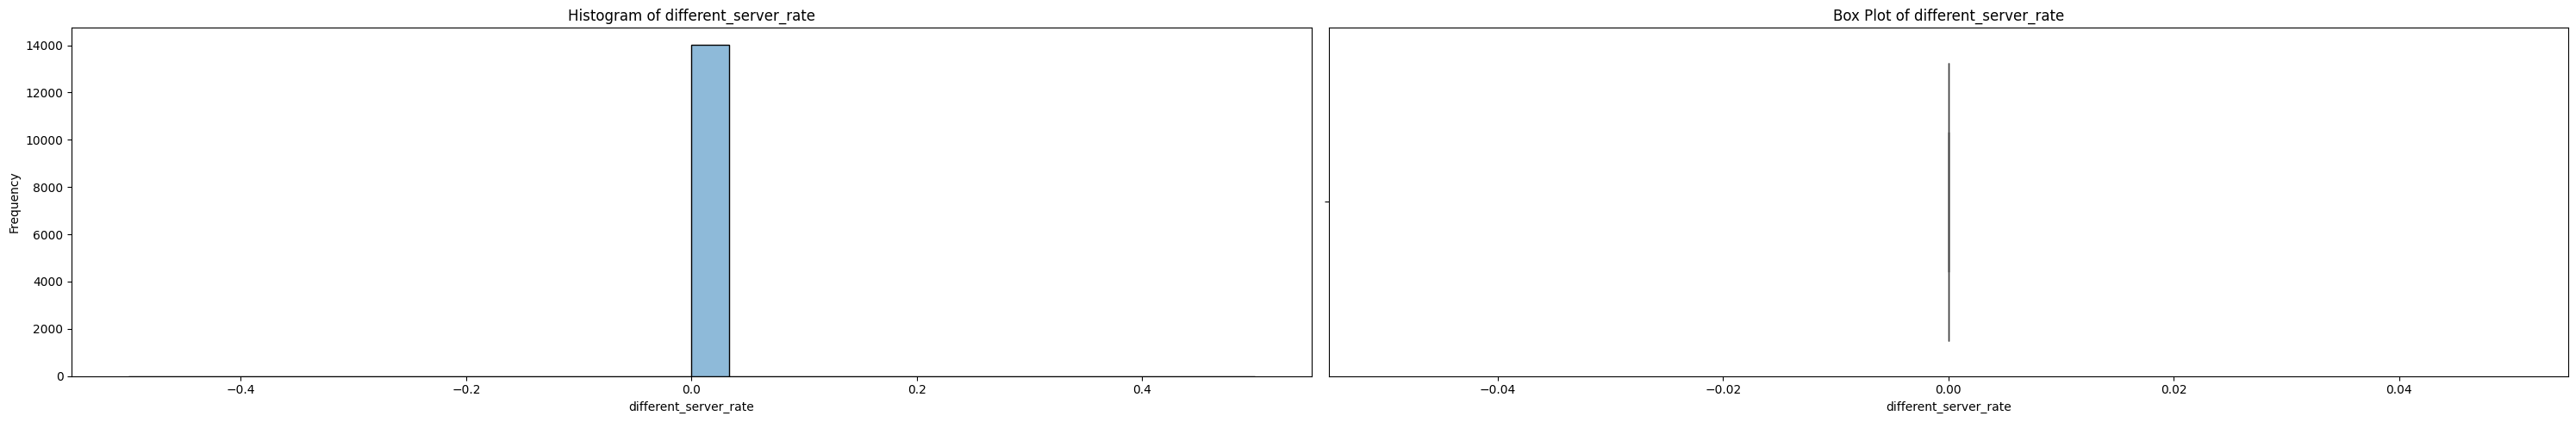

In [ ]:
#Visualize outlier columns after handling outliers (Histograms and Box Plots)

def plot_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(30, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')

        plt.tight_layout()
        plt.show()

plot_distributions(data, copy_of_outlier_columns)

In [ ]:
#Fix inconsistencies

original_data = data.copy()

rate_columns = [
    'syn_error_rate', 'destination_same_source_port_rate',
    'destination_different_server_rate', 'destination_server_different_host_rate',
    'server_different_host_rate', 'destination_server_syn_error_rate',
    'destination_same_server_rate', 'destination_syn_error_rate',
    'same_server_rate', 'reset_error_rate', 'destination_server_reset_error_rate',
    'server_reset_error_rate', 'server_syn_error_rate', 'destination_reset_error_rate',
    'different_server_rate'
]

count_columns = [
    'connection_count', 'destination_host_server_count', 'fragment_errors',
    'compromised_count', 'server_request_count', 'destination_host_count', 'source_bytes', 'destination_bytes',
    'connection_time'
]

binary_columns = ['suspicious_activity', 'guest_login', 'authentication_status']

categorical_columns = ['connection_status', 'protocol', 'service_type', 'class']

for col in rate_columns:
    data[col] = data[col].clip(lower=0, upper=1)

for col in count_columns:
  data = data[data[col] >= 0]

for col in binary_columns:
  data = data[data[col].isin([0, 1])]

for col in categorical_columns:
  data[col] = data[col].str.lower().str.strip()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   syn_error_rate                          14036 non-null  float64
 1   connection_time                         14036 non-null  int64  
 2   destination_same_source_port_rate       14036 non-null  float64
 3   destination_different_server_rate       14036 non-null  float64
 4   connection_status                       14036 non-null  object 
 5   connection_count                        14036 non-null  int64  
 6   destination_server_different_host_rate  14036 non-null  float64
 7   suspicious_activity                     14036 non-null  int64  
 8   protocol                                14036 non-null  object 
 9   server_different_host_rate              14036 non-null  float64
 10  destination_server_syn_error_rate       14036 non-null  fl

In [ ]:
data.shape

(14036, 31)

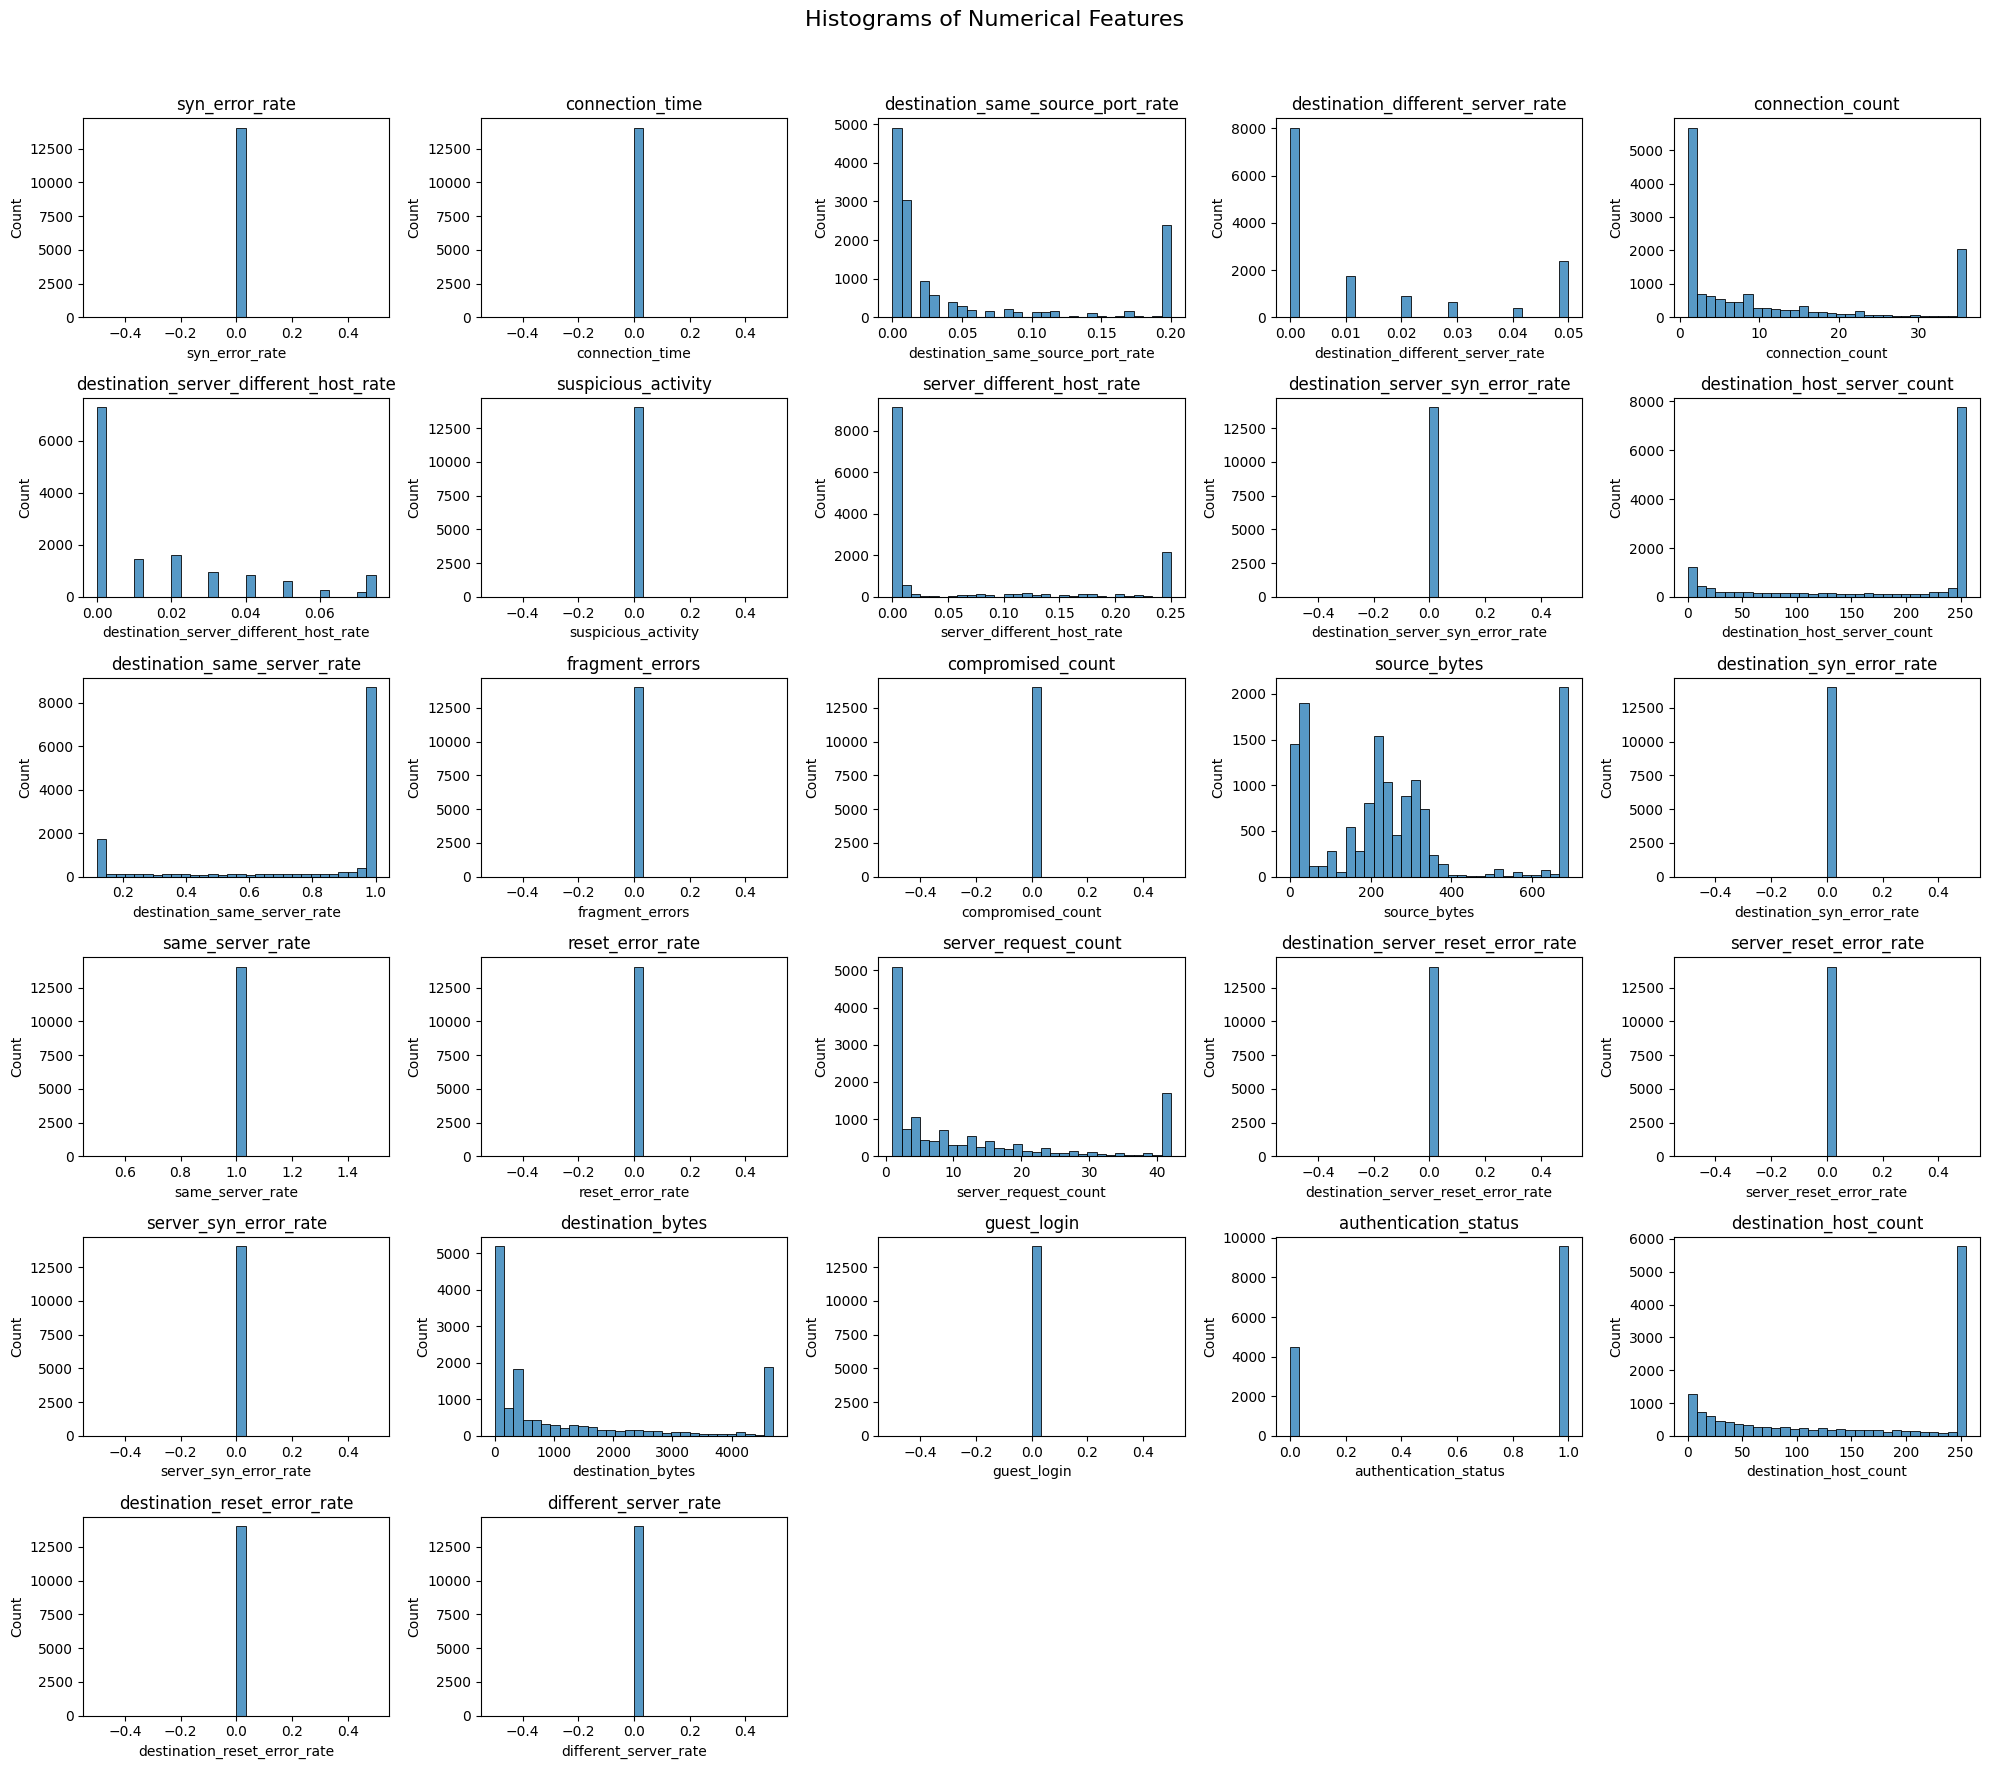

In [ ]:
#Histograms

import math

num_cols_list = list(num_cols)
cols = 5
rows = math.ceil(len_of_num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols_list):
    sns.histplot(data[col], ax=axes[i], bins=30, kde=False)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

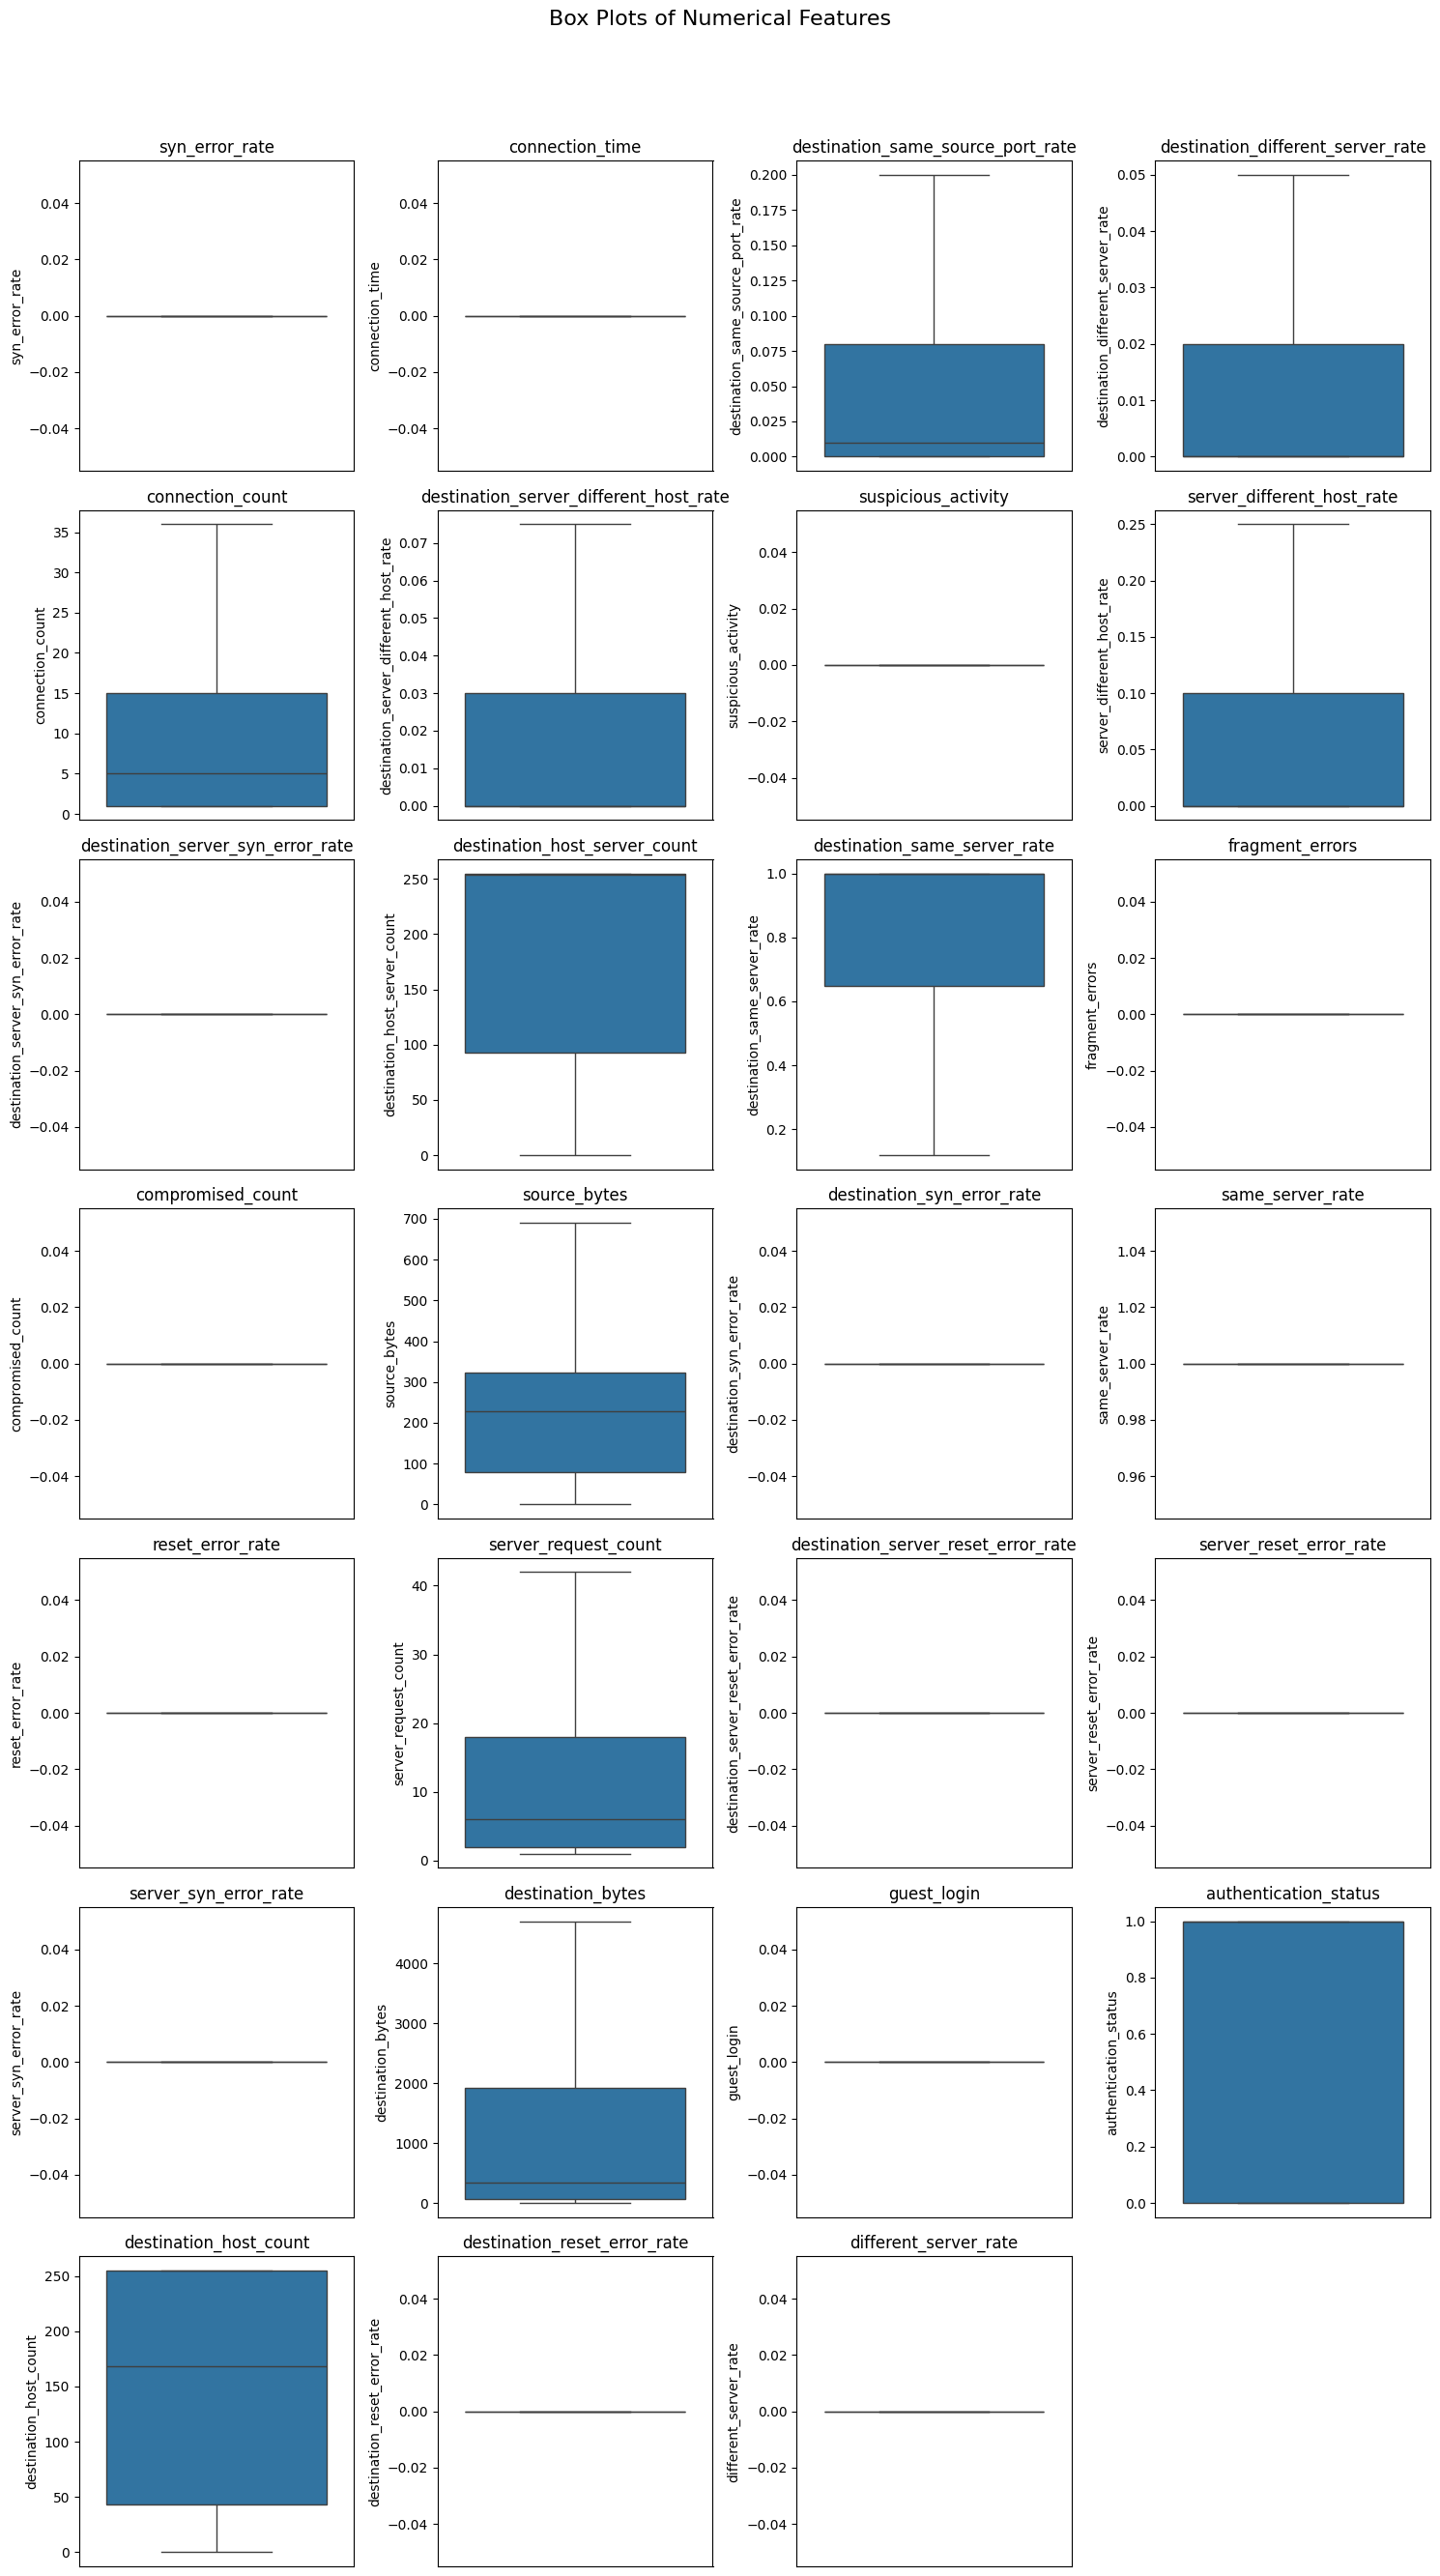

In [ ]:
#Box plots

cols = 4
rows = math.ceil(len(num_cols) / cols)
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.xticks([])
plt.suptitle("Box Plots of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

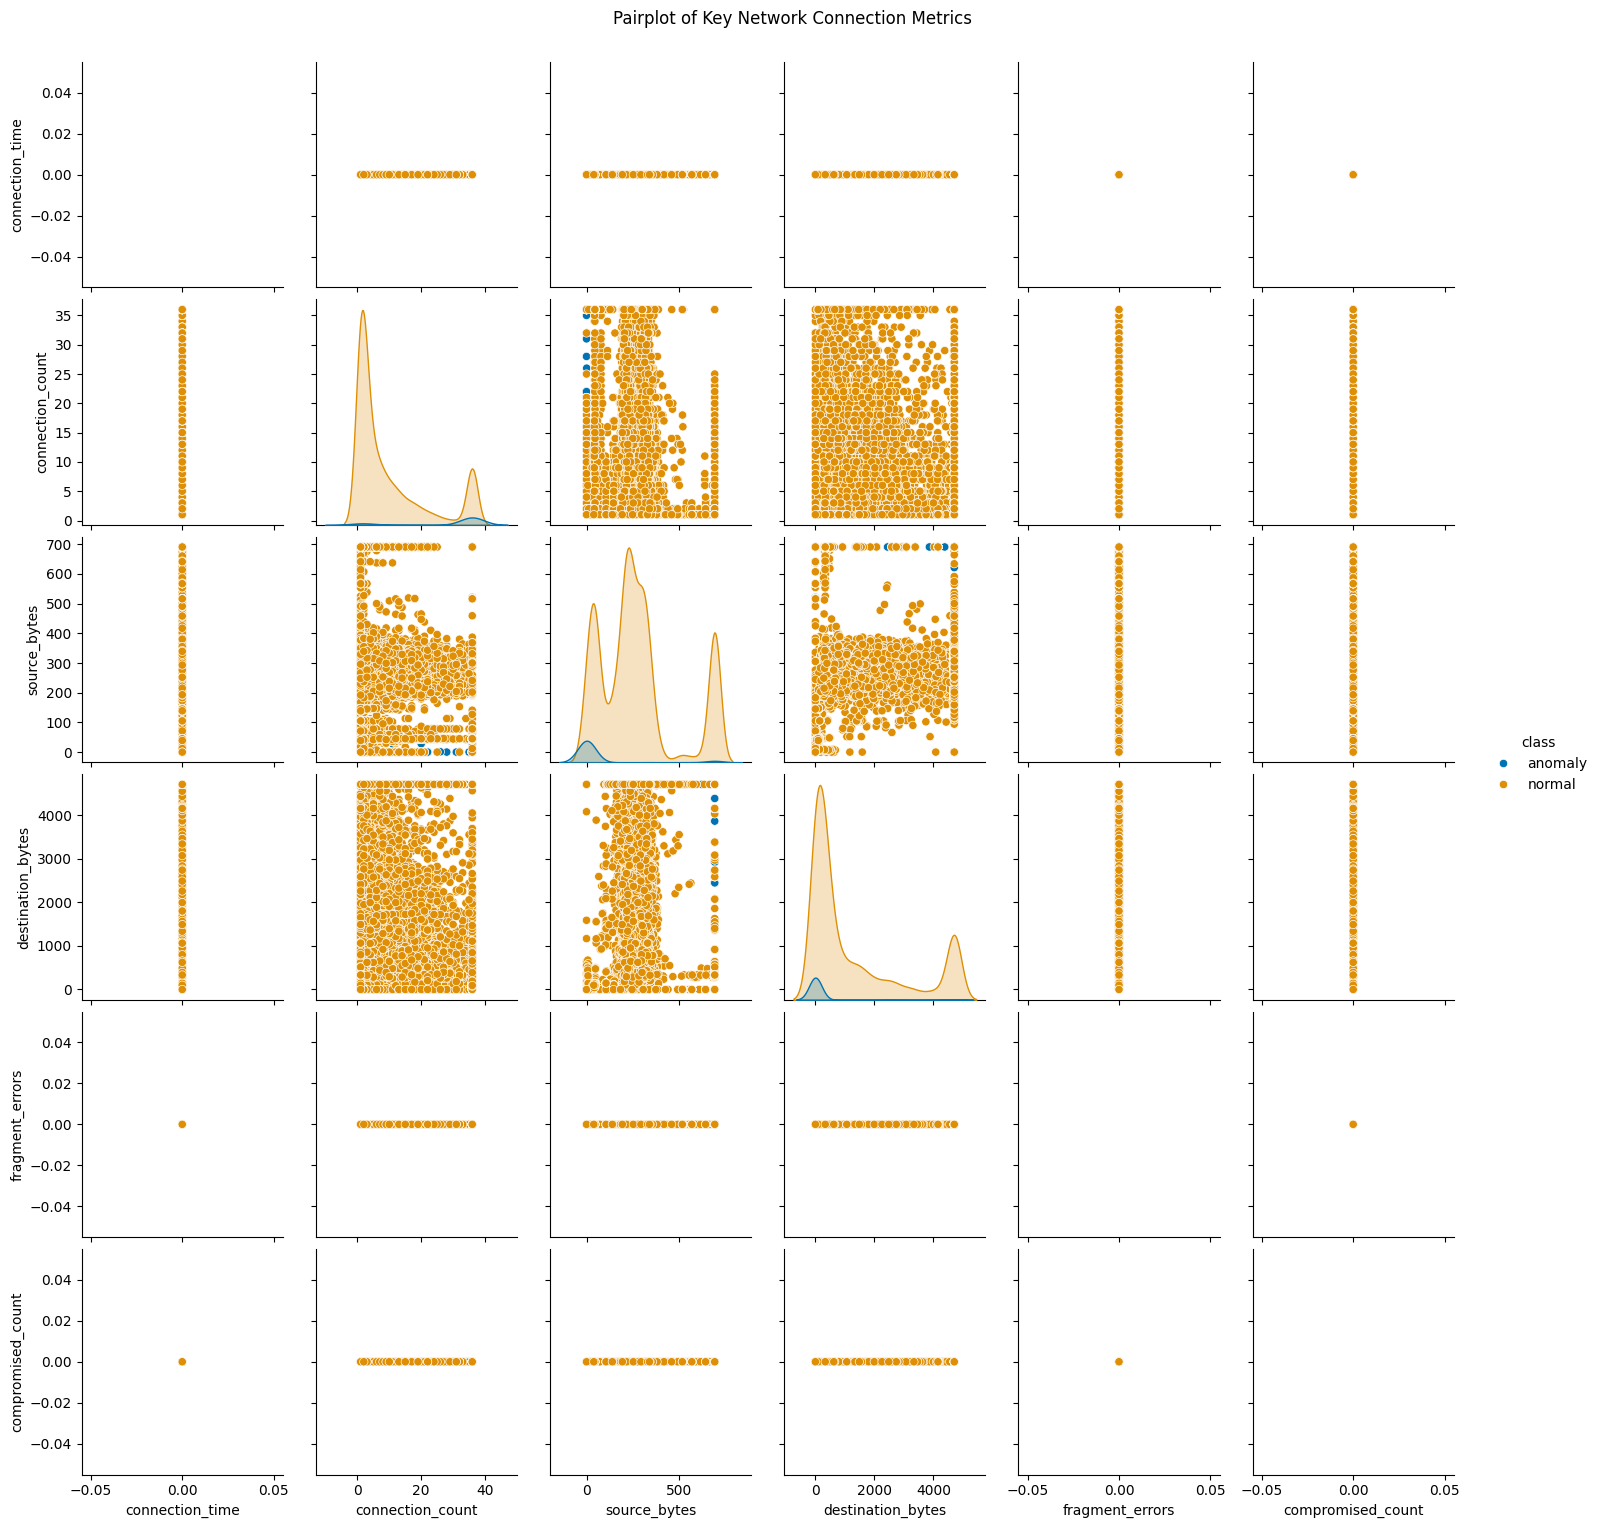

In [ ]:
#scatter/pair plots

selected_cols = [
    'connection_time',
    'connection_count',
    'source_bytes',
    'destination_bytes',
    'fragment_errors',
    'compromised_count',
    'class'
]

subset_df = data[selected_cols]

sns.pairplot(subset_df, hue='class', diag_kind='kde', palette='colorblind')
plt.suptitle("Pairplot of Key Network Connection Metrics", y=1.02)
plt.show()

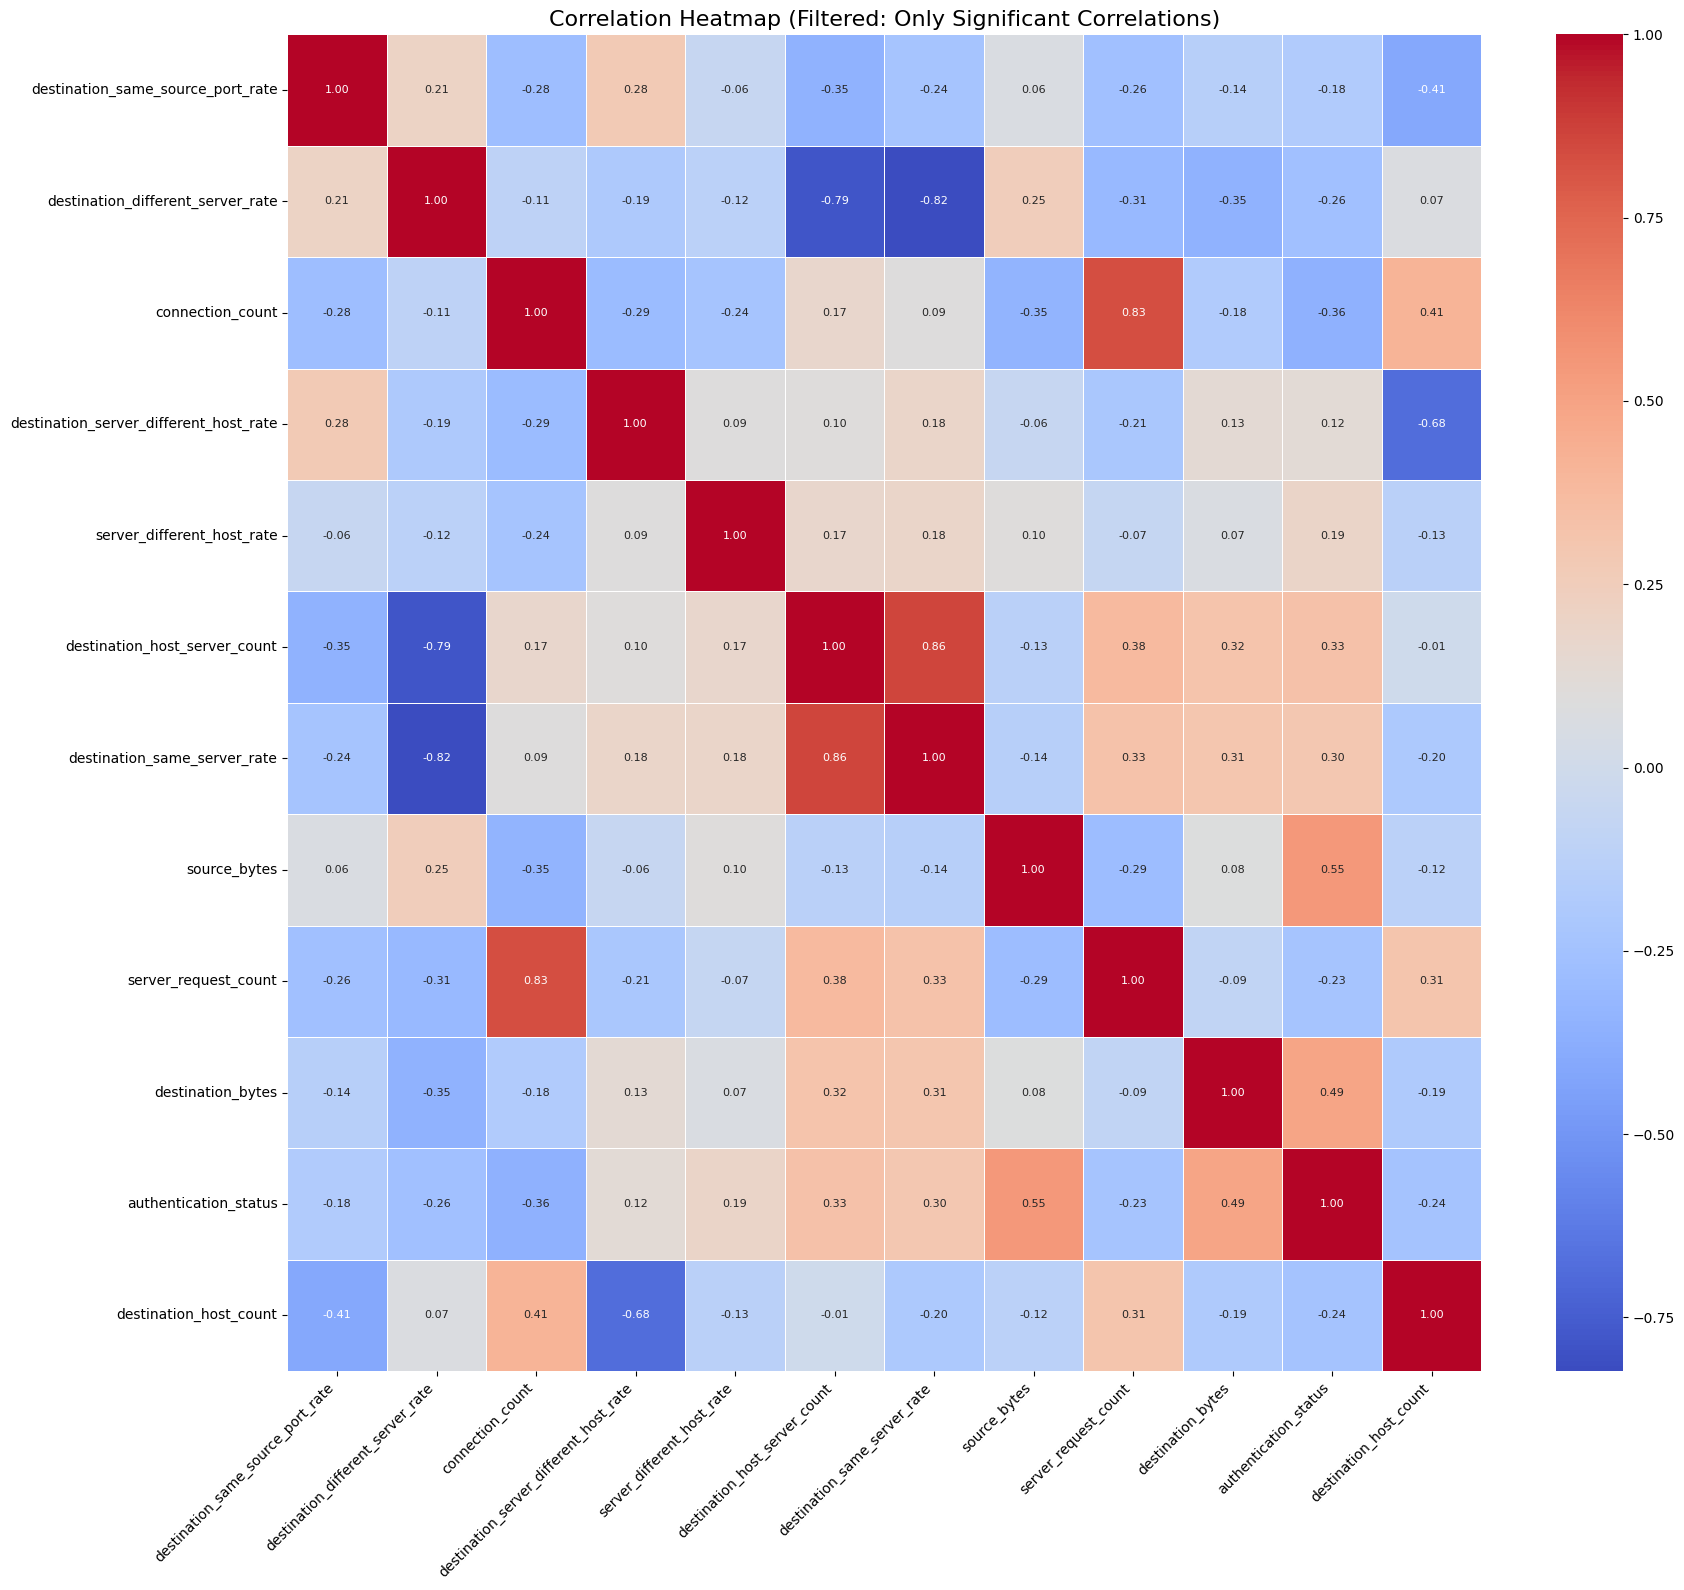

In [ ]:
#Correlation heatmap

import numpy as np

corr_matrix = data[num_cols].corr()
abs_corr = corr_matrix.abs().copy()
np.fill_diagonal(abs_corr.values, 0)
threshold = 0.1

# Identify columns that have at least one correlation
cols_to_keep = abs_corr.columns[(abs_corr.max() >= threshold)]

#filter matrix
filtered_corr_matrix = corr_matrix.loc[cols_to_keep, cols_to_keep]
plt.figure(figsize=(18, 16))
sns.heatmap(filtered_corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=True,
            linewidths=0.5,
            annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap (Filtered: Only Significant Correlations)", fontsize=16)
plt.tight_layout()
plt.show()

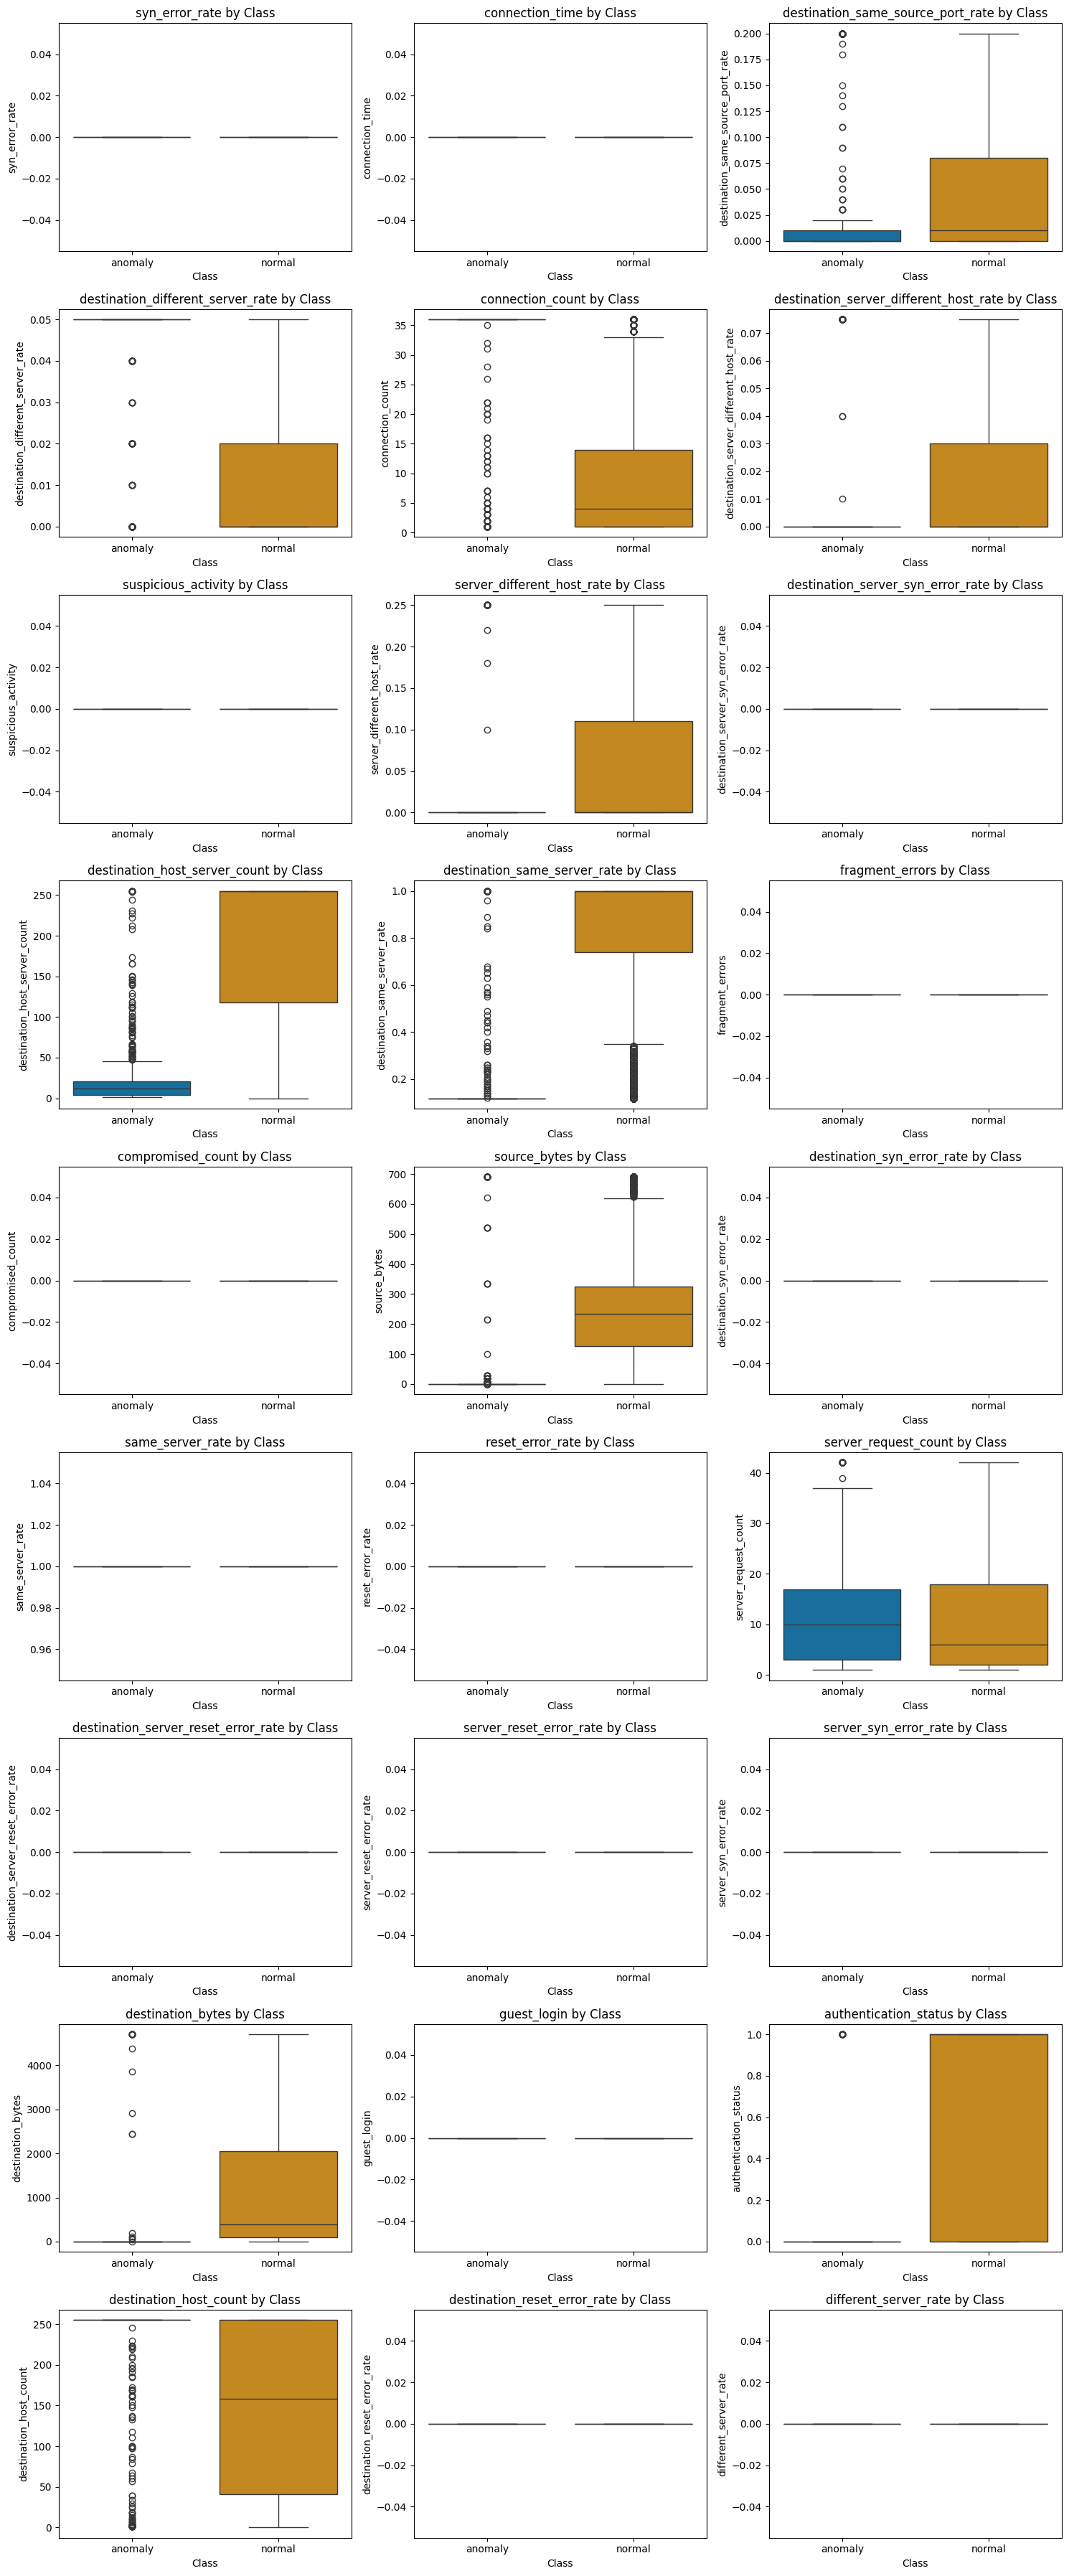

In [ ]:
#Exploring relationship between numerical features and the target variable ("class")
cols = 3
rows = (len(num_cols) // cols) + (len(num_cols) % cols > 0)

plt.figure(figsize=(cols * 5, rows * 4))
for idx, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x='class', y=col, data=data, hue='class', palette='colorblind', dodge=False)
    plt.title(f'{col} by Class')
    plt.xlabel("Class")
    plt.ylabel(col)
    plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

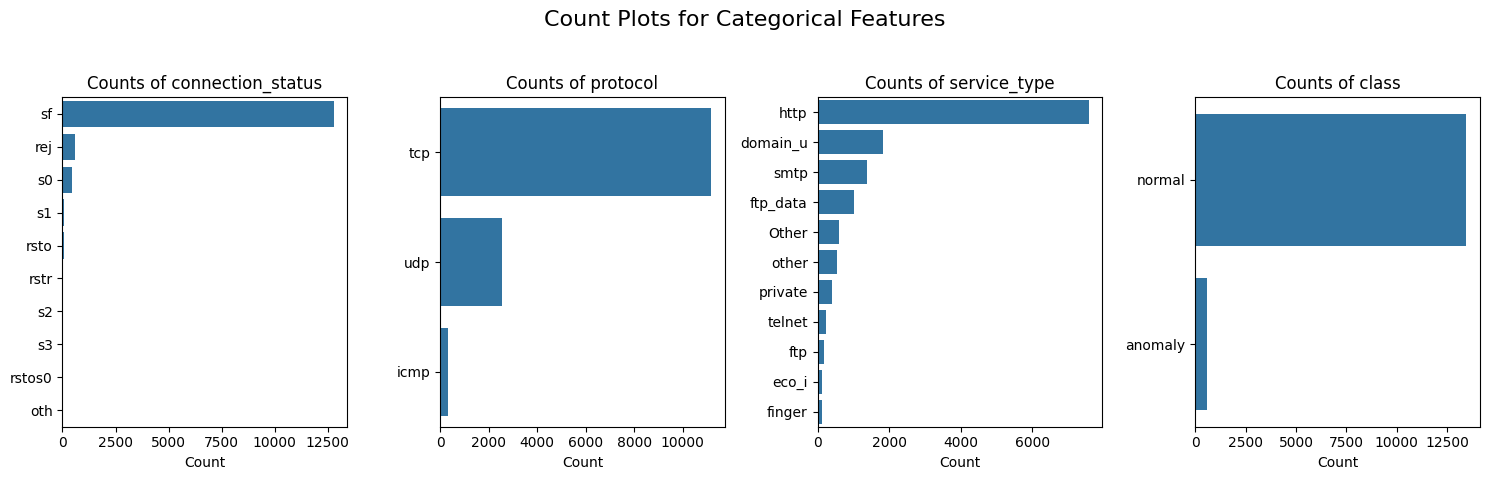

In [ ]:
#count plots

top_n = 10
top_categories = data['service_type'].value_counts().nlargest(top_n).index
data['service_type_grouped'] = np.where(data['service_type'].isin(top_categories),
                                        data['service_type'], 'Other')

plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    if col == 'service_type':
        plot_col = 'service_type_grouped'
    else:
        plot_col = col

    sns.countplot(y=plot_col, data=data, order=data[plot_col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xlabel("Count")
    plt.ylabel("")

plt.suptitle("Count Plots for Categorical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

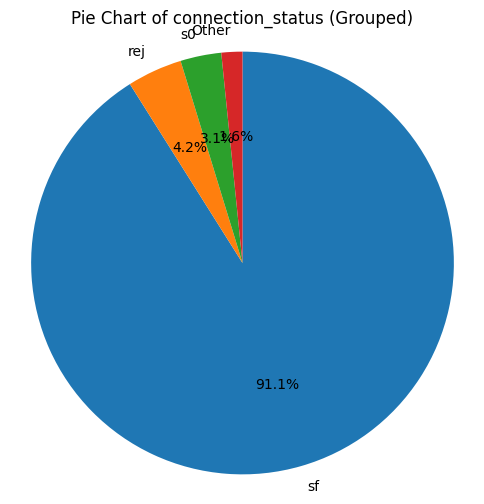

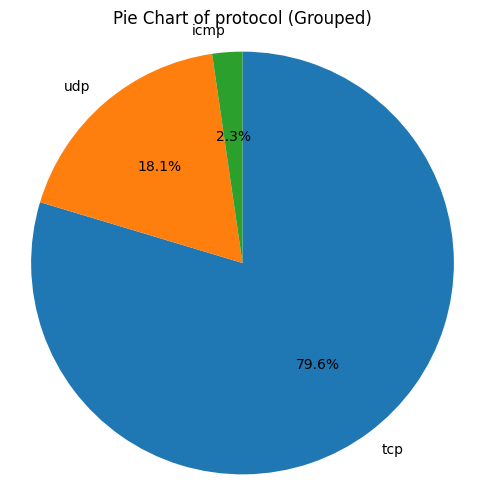

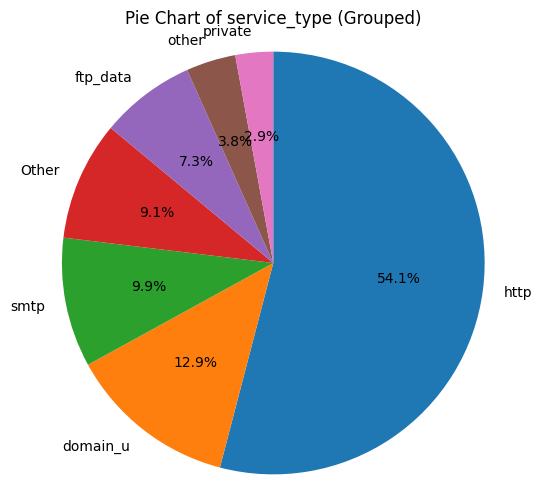

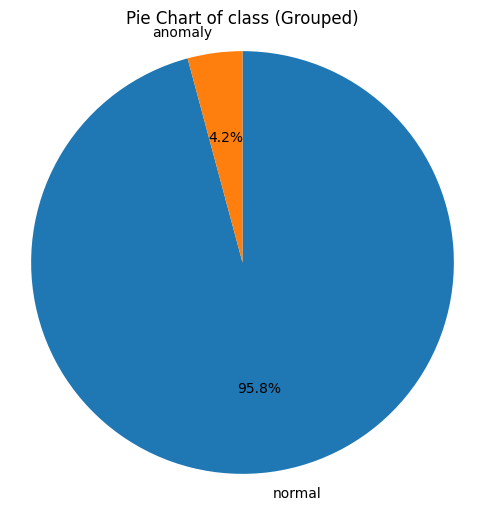

In [ ]:
#pie charts
for col in categorical_cols:

    counts = data[col].value_counts()
    total = len(data)
    threshold = 0.02 * total
    small_categories = counts[counts < threshold].index

    temp_col = data[col].apply(lambda x: 'Other' if x in small_categories else x)
    grouped_counts = temp_col.value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(grouped_counts, labels=grouped_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f"Pie Chart of {col} (Grouped)")
    plt.ylabel('')
    plt.axis('equal')
    plt.show()

In [ ]:
# Aggregated Error Rate:
data['aggregated_error_rate'] = data[['syn_error_rate',
                                  'destination_syn_error_rate',
                                  'reset_error_rate',
                                  'server_reset_error_rate']].mean(axis=1)

# Log Transformation:
data['log_source_bytes'] = np.log1p(data['source_bytes'])
data['log_destination_bytes'] = np.log1p(data['destination_bytes'])

# Connection Intensity:
data['connection_intensity'] = data['connection_count'] / (data['connection_time'] + 1)

**Aggregated Error Rate:**
This feature is calculated as the mean of four error-related columns, providing a consolidated metric for overall network error behavior.

**Log Transformations:**
The np.log1p function is used on source_bytes and destination_bytes to mitigate skewness and make these features more suitable for modeling.

**Connection Intensity:**
This derived feature captures the rate of connections relative to the connection time, potentially highlighting abnormal activity.

In [ ]:
data.drop("service_type_grouped", axis=1, inplace=True)

In [ ]:
data.shape

(14036, 35)

**Handle categorical variables using appropriate encoding techniques.**

**Splitting first to avoid data leakage**

In [ ]:
from sklearn.model_selection import train_test_split

categorical_features = ['connection_status', 'protocol', 'service_type']
target_column = 'class'

X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
data.columns

Index(['syn_error_rate', 'connection_time',
       'destination_same_source_port_rate',
       'destination_different_server_rate', 'connection_status',
       'connection_count', 'destination_server_different_host_rate',
       'suspicious_activity', 'protocol', 'server_different_host_rate',
       'destination_server_syn_error_rate', 'destination_host_server_count',
       'destination_same_server_rate', 'fragment_errors', 'compromised_count',
       'source_bytes', 'service_type', 'destination_syn_error_rate',
       'same_server_rate', 'reset_error_rate', 'server_request_count',
       'destination_server_reset_error_rate', 'server_reset_error_rate',
       'server_syn_error_rate', 'destination_bytes', 'guest_login',
       'authentication_status', 'destination_host_count',
       'destination_reset_error_rate', 'different_server_rate', 'class',
       'aggregated_error_rate', 'log_source_bytes', 'log_destination_bytes',
       'connection_intensity'],
      dtype='object')

In [ ]:
print(data.shape)

(14036, 35)


**Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif



#temp encode each categorical column as integers
X_temp = X_train[categorical_features].apply(LabelEncoder().fit_transform)

#find mutual information scores
mi_scores = mutual_info_classif(X_temp, y_train, discrete_features=True)

#create a series with names
mi_series = pd.Series(mi_scores, index=categorical_features)

#only keep features with non-zero mutual information
selected_features = mi_series[mi_series > 0].index.tolist()

categorical_features = selected_features

#one hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_features])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_features])

encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

#make sure x test and x train have same columns
missing_cols = set(X_train_encoded_df.columns) - set(X_test_encoded_df.columns)
for col in missing_cols:
    X_test_encoded_df[col] = 0  #add missing

#reorder columns
X_test_encoded_df = X_test_encoded_df[X_train_encoded_df.columns]

X_train = X_train.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

#label encoding for 'class' -> better than binary encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Added Mutual Information (MI) application on categorical columns (before encoding) to find whether they are useful or not

**Observation:** they were useful. thus, MI didn't remove them as they impact the target column (class)

**Remove redundant features using correlation matrix where if correlation > 0.95 then that column is useless**

In [ ]:
corr_matrix = pd.DataFrame(X_train).corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop, errors='ignore')
print("Removed redundant features:", to_drop)

Removed redundant features: ['connection_intensity']


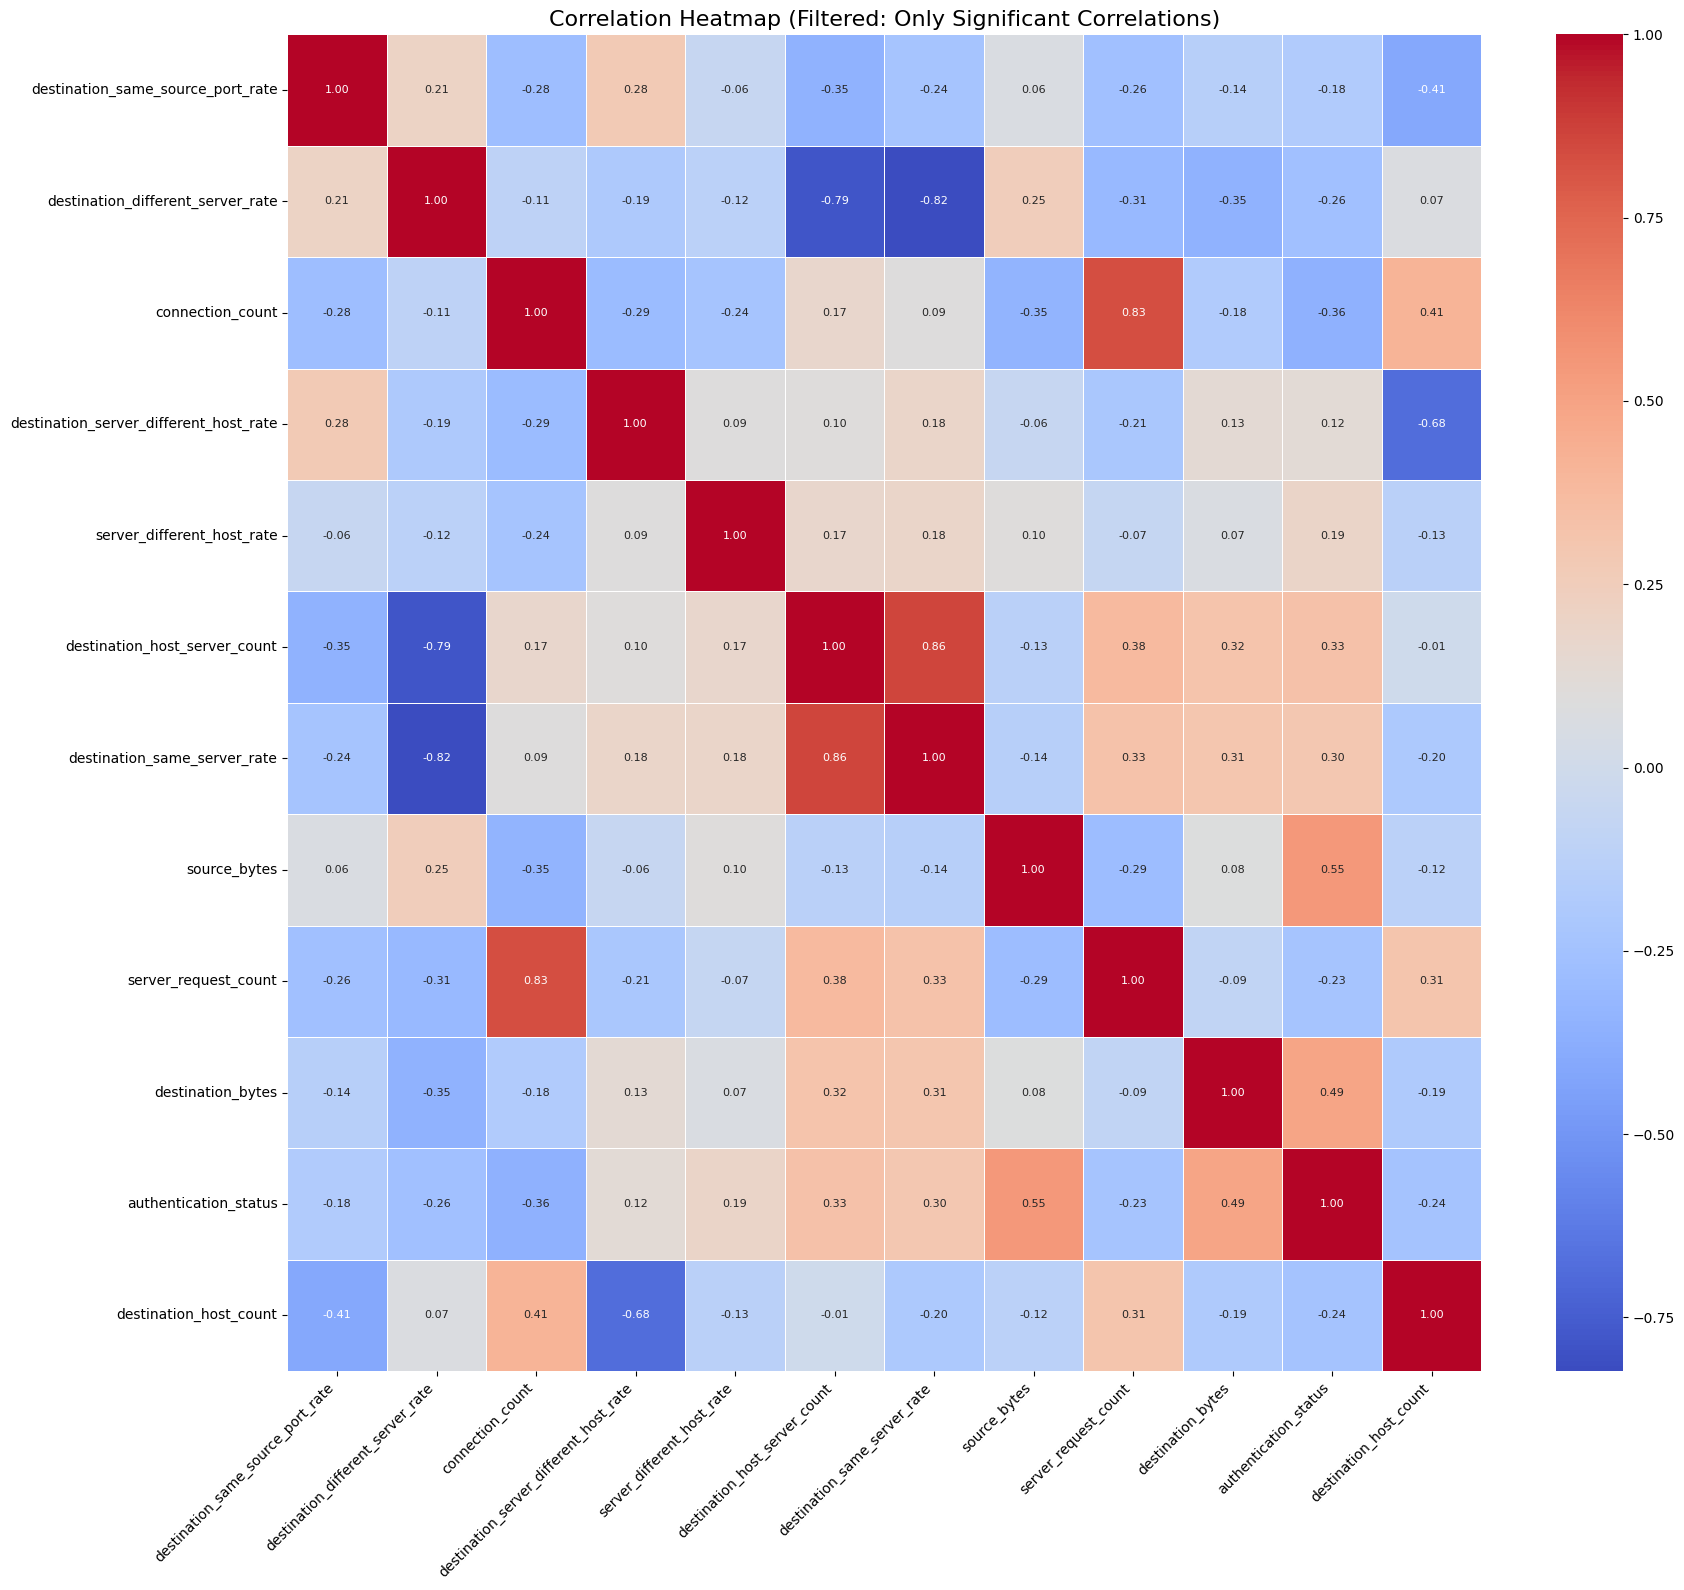

In [ ]:
#Correlation heatmap

corr_matrix = data[num_cols].corr()
abs_corr = corr_matrix.abs().copy()
np.fill_diagonal(abs_corr.values, 0)
threshold = 0.1

# Identify columns that have at least one correlation
cols_to_keep = abs_corr.columns[(abs_corr.max() >= threshold)]

#filter matrix
filtered_corr_matrix = corr_matrix.loc[cols_to_keep, cols_to_keep]
plt.figure(figsize=(18, 16))
sns.heatmap(filtered_corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=True,
            linewidths=0.5,
            annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap (Filtered: Only Significant Correlations)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11228 entries, 3910 to 10230
Data columns (total 100 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   syn_error_rate                          11228 non-null  float64
 1   connection_time                         11228 non-null  int64  
 2   destination_same_source_port_rate       11228 non-null  float64
 3   destination_different_server_rate       11228 non-null  float64
 4   connection_count                        11228 non-null  int64  
 5   destination_server_different_host_rate  11228 non-null  float64
 6   suspicious_activity                     11228 non-null  int64  
 7   server_different_host_rate              11228 non-null  float64
 8   destination_server_syn_error_rate       11228 non-null  float64
 9   destination_host_server_count           11228 non-null  int64  
 10  destination_same_server_rate            11228 non-null  flo

**Normalize data values (important for non tree-based models)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


**Handle class imbalance using SMOTE by upscaling anomalies to match the number of normals**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_df, y_train)

**Remove no-impact features where their variance on the class column is less than the threshold (0.01)**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)
X_train_selected = var_thresh.fit_transform(X_train_resampled)
X_test_selected = var_thresh.transform(X_test_scaled_df)
selected_feature_names = X_train_scaled_df.columns[var_thresh.get_support()]

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

X_test_selected_df = X_test_selected_df.reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

#final train and test datasets
data_train_final = pd.concat([X_train_selected_df, pd.Series(y_train_resampled, name='class')], axis=1)
data_test_final = pd.concat([X_test_selected_df, pd.Series(y_test, name='class')], axis=1)

#this checks for data leakage/improper processing
#will find NaN values if so
print(f"Any NaN values in data_train_final: {data_train_final.isna().sum().sum()}")
print(f"Any NaN values in data_test_final: {data_test_final.isna().sum().sum()}")
print("Selected features after variance thresholding:")
print(data_train_final.info)


Any NaN values in data_train_final: 0
Any NaN values in data_test_final: 0
Selected features after variance thresholding:
<bound method DataFrame.info of        destination_same_source_port_rate  destination_different_server_rate  \
0                              -0.699155                          -0.702499   
1                              -0.565393                          -0.702499   
2                              -0.565393                          -0.180311   
3                              -0.565393                          -0.702499   
4                              -0.565393                          -0.702499   
...                                  ...                                ...   
21511                          -0.699155                           1.908445   
21512                           1.842924                           0.653803   
21513                          -0.005515                          -0.702499   
21514                          -0.699155                

**Now that we have only 85 columns including the target, we can begin training the models**

**Now that post-encoding data processing is done, I will begin training 5 separate models to deduce which is best from their respective performance measures**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])

class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=data_train_final['class'])
weights = dict(zip([0,1], class_weights))

#train random forest
rf_model = RandomForestClassifier(class_weight=weights, random_state=42)
rf_model.fit(data_train_final.drop(columns='class'), data_train_final['class'])

#predict
y_pred_rf = rf_model.predict(data_test_final.drop(columns='class'))

#calculate
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_rf)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9978632478632479

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       1.00      0.97      0.99      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 111    6]
 [   0 2691]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(data_train_final.drop(columns='class'), data_train_final['class'])

#predict
y_pred_knn = knn_model.predict(data_test_final.drop(columns='class'))

#calculate
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_knn)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_knn))


KNN Model Performance:
Accuracy: 0.9953703703703703

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       0.96      0.98      0.97      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 113    4]
 [   9 2682]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#grid Search for Hyperparameters
param_grid = {
    'C': [0.1, 1, 5, 7, 10],               # try more values for finer tuning
    'gamma': ['scale', 0.01, 0.001],       # 'scale' is usually a good default
    'kernel': ['rbf', 'linear']            # try different kernel types
}

svm = SVC(random_state=42)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(data_train_final.drop(columns='class'), data_train_final['class'])
best_svm_model = grid_search.best_estimator_

#predict with best model
y_pred_svm = best_svm_model.predict(data_test_final.drop(columns='class'))

#evaluate
print("SVM Model Performance:")
print(f"Best Parameters based on Accuracy: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_svm)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_svm))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
SVM Model Performance:
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9964387464387464

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       0.97      0.99      0.98      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 114    3]
 [   7 2684]]


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

#train logistic regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(data_train_final.drop(columns='class'), data_train_final['class'])

#predict
y_pred_logreg = logreg_model.predict(data_test_final.drop(columns='class'))

#calculate
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_logreg)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_logreg))


Logistic Regression Model Performance:
Accuracy: 0.9804131054131054

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       117
           1       1.00      0.98      0.99      2691

    accuracy                           0.98      2808
   macro avg       0.85      0.96      0.89      2808
weighted avg       0.98      0.98      0.98      2808


Confusion Matrix:
[[ 109    8]
 [  47 2644]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#train decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(data_train_final.drop(columns='class'), data_train_final['class'])

#predict
y_pred_dt = dt_model.predict(data_test_final.drop(columns='class'))

#calculate
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_dt)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_dt))


Decision Tree Model Performance:
Accuracy: 0.9975071225071225

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       0.99      0.98      0.98      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 112    5]
 [   2 2689]]


**Conclusion:**

Random Forest model has the best accuracy, precision, recall, and F-1 scores out of the 5 models.
confusion matrix shows '0' (false negative) which is the least out of all the models. given the nature of our field, false negatives are intolerable which means we must pick the least false negatives out of the models.



---

**Now we will do an ensembling technique (stacking) which requires models to train the meta-model**
**Model selection based on performance measures:**
1. Random Forest (best overall)
2. Decision Tree (second best)
3. SVM (third best)

Meta-model will be random forest since it has the best performance measures

---



We will start by extracting most important features from the trained model (this only works for random forest models)

In [ ]:
#extract feature importances from the trained model
rf_importance = rf_model.feature_importances_

#create df to display feature importance
importance_df = pd.DataFrame({
    'Feature': data_train_final.drop(columns='class').columns,
    'Importance': rf_importance
})

#sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df)


Random Forest Feature Importances:
                         Feature  Importance
7                   source_bytes    0.154496
12              log_source_bytes    0.146283
13         log_destination_bytes    0.116210
9              destination_bytes    0.083485
6   destination_same_server_rate    0.056909
..                           ...         ...
58             service_type_nnsp    0.000000
66              service_type_rje    0.000000
65       service_type_remote_job    0.000000
62          service_type_printer    0.000000
81            service_type_whois    0.000000

[84 rows x 2 columns]


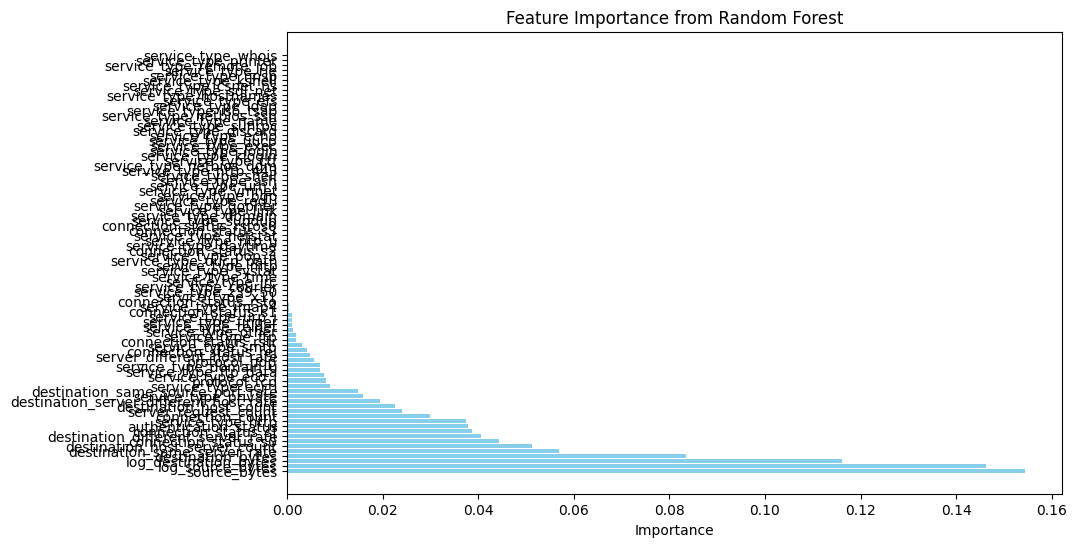

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

as we can see, many features can be unrelated to the model importance. Thus, we will drop them before training the random forest meta-model

In [ ]:
#filter and print features where importance is exactly 0
zero_importance_features = importance_df[importance_df['Importance'] == 0]

if not zero_importance_features.empty:
    print("\nFeatures with Importance = 0:")
    print(zero_importance_features[['Feature', 'Importance']])

    #drop features with Importance = 0
    features_to_drop = zero_importance_features['Feature']
    data_train_final = data_train_final.drop(columns=features_to_drop)
    data_test_final = data_test_final.drop(columns=features_to_drop)
else:
    print("\nNo features have an importance of 0.")


Features with Importance = 0:
                    Feature  Importance
27    service_type_csnet_ns         0.0
49      service_type_kshell         0.0
58        service_type_nnsp         0.0
66         service_type_rje         0.0
65  service_type_remote_job         0.0
62     service_type_printer         0.0
81       service_type_whois         0.0


In [ ]:
data_test_final.shape

(2808, 78)



---

**Training Random Forest after applying RFE**

---



In [ ]:
classes = np.array([0, 1])

class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=data_train_final['class'])
weights = dict(zip([0,1], class_weights))


#train random forest
rf_model = RandomForestClassifier(class_weight=weights, random_state=42)
rf_model.fit(data_train_final.drop(columns='class'), data_train_final['class'])

#predict
y_pred_rf = rf_model.predict(data_test_final.drop(columns='class'))

#calculate
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_rf)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9978632478632479

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       1.00      0.97      0.99      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 111    6]
 [   0 2691]]


**RFE turned out to be useless as performance measures before and after are the same**

Train a final XGBoost model

In [ ]:
import xgboost as xgb

classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=data_train_final['class'])
weights = dict(zip(classes, class_weights))

sample_weights = data_train_final['class'].map(weights)

#train
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(
    data_train_final.drop(columns='class'),
    data_train_final['class'],
    sample_weight=sample_weights
)

#predict
y_pred_xgb = xgb_model.predict(data_test_final.drop(columns='class'))

#calculate
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_xgb)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:59:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Performance:
Accuracy: 0.9982193732193733

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       0.99      0.98      0.99      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 113    4]
 [   1 2690]]


In [ ]:
from sklearn.ensemble import StackingClassifier

classes = np.array([0, 1])


class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=data_train_final['class'])
weights = dict(zip([0,1], class_weights))

#define base learners
base_learners = [
    ('rf', RandomForestClassifier(class_weight=weights, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(C=10, gamma=0.01, kernel='rbf', probability=True, random_state=42))  # probability=True is required for stacking
]

#cefine meta model
meta_model = RandomForestClassifier(random_state=42)

#create stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,  # 5 fold cross-validation
    passthrough=False,  #if true, then original features are used by meta model
    n_jobs=-1
)

#train
stack_model.fit(data_train_final.drop(columns='class'), data_train_final['class'])

#predict
y_pred_stack = stack_model.predict(data_test_final.drop(columns='class'))

print("Stacking Model Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_stack)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_stack))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_stack))


Stacking Model Performance:
Accuracy: 0.9978632478632479

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       1.00      0.97      0.99      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 111    6]
 [   0 2691]]


after applying RFE and stacking using Random forest, SVM, and Decision tree, with Random Forest as my meta-model, performance measures are still the same as using only Random forest without RFE or Stacking.

This shows that these 6 false positives are either **borderline** or **noisy** or **mislabeled** as class 1 instead of class 0

choosing to pursue 100% accuracy will either reduce real-world generalability or cause over-fitting which isn't worth it as all false negatives are 0 and all true positives are correctly classified given the nature of the dataset


---

i will now try my meta-model as xgboost instead of random forest to see the
difference in their performance

In [ ]:
from xgboost import XGBClassifier

#compute class weights
classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=data_train_final['class'])
weights = dict(zip(classes, class_weights))

#define base learners
base_learners = [
    ('rf', RandomForestClassifier(class_weight=weights, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

#define meta-model
meta_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

#create stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

#train
stack_model.fit(data_train_final.drop(columns='class'), data_train_final['class'])

#predict
y_pred_stack = stack_model.predict(data_test_final.drop(columns='class'))

print("Stacking Model with XGBoost Performance:")
print(f"Accuracy: {accuracy_score(data_test_final['class'], y_pred_stack)}")
print("\nClassification Report:")
print(classification_report(data_test_final['class'], y_pred_stack))
print("\nConfusion Matrix:")
print(confusion_matrix(data_test_final['class'], y_pred_stack))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Model with XGBoost Performance:
Accuracy: 0.9978632478632479

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       117
           1       1.00      1.00      1.00      2691

    accuracy                           1.00      2808
   macro avg       1.00      0.97      0.99      2808
weighted avg       1.00      1.00      1.00      2808


Confusion Matrix:
[[ 111    6]
 [   0 2691]]


the same performance measures are observed, this means that my hypothesis was correct. this is the best achievable model